In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [3]:
counts = train_data.melt(value_vars=train_data.columns[-6:])
counts

,variable,value
0,EC1,1
1,EC1,0
2,EC1,1
3,EC1,1
4,EC1,1
...,...,...
89023,EC6,0
89024,EC6,0
89025,EC6,0
89026,EC6,0


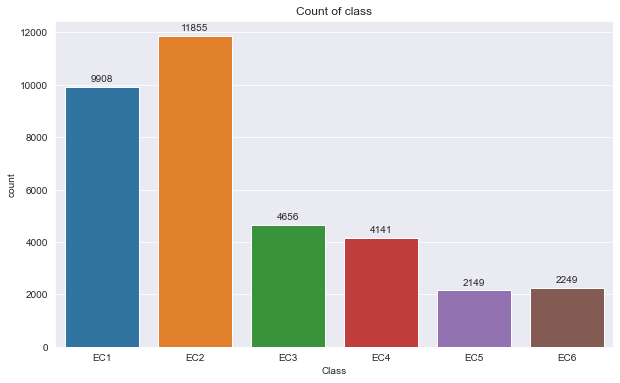

In [4]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(data=counts.loc[counts['value']!=0], x='variable')
ax.set(xlabel='Class', title='Count of class')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), 'd'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

# Data Cleaning

In [5]:
train_data.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [6]:
# check for duplicated values  without id
train_data.drop('id', axis=1).loc[train_data.drop('id', axis=1).duplicated()]

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6


In [7]:
train_data.dtypes

id                     int64
BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
EC3           

Looks like the features only consist of numerical features.

# Data Understanding

In [8]:
train_data.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
BertzCT,14838.0,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.0,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.0,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.0,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.0,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.0,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.0,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.0,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.0,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954
EState_VSA2,14838.0,10.435316,13.651843,0.000000,0.000000,6.420822,12.841643,99.936429


In [9]:
train_data.drop('id', axis=1).describe()[['EC1', 'EC2']].T['mean']

EC1    0.667745
EC2    0.798962
Name: mean, dtype: float64

67% of data is classified as EC1 while 80% of data is classified as EC2.

<AxesSubplot:>

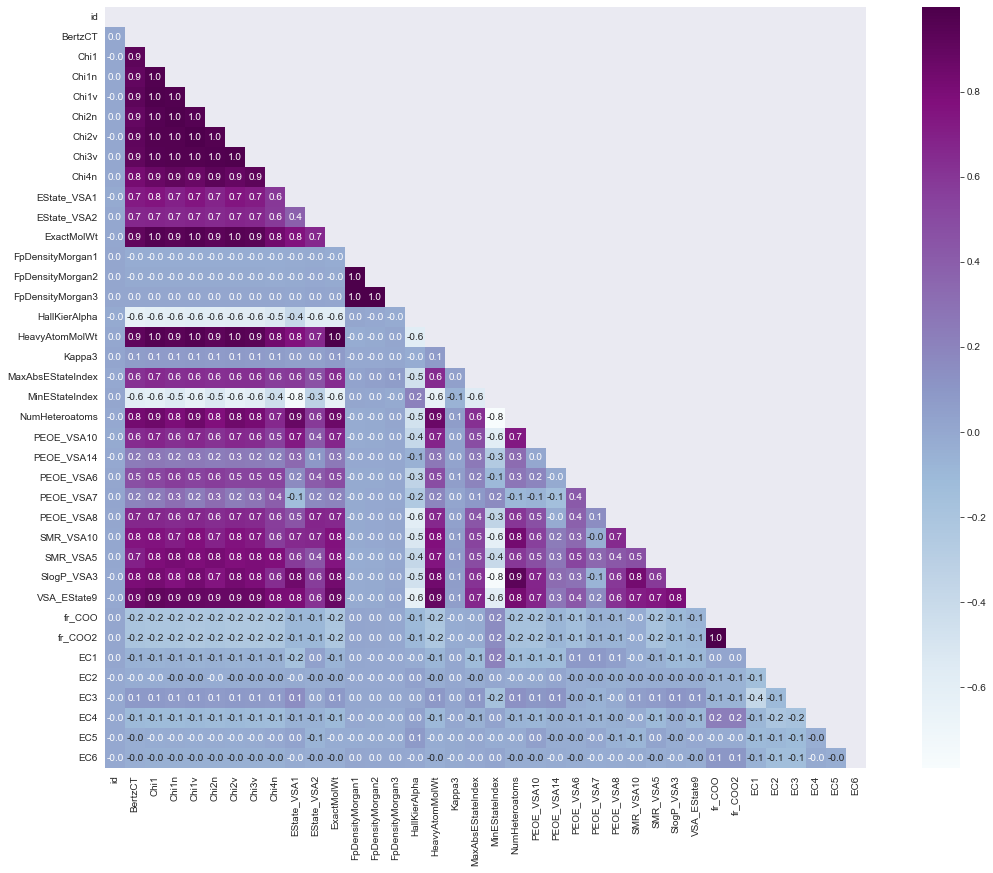

In [10]:
plt.figure(figsize=(20,14))
matrix = train_data.corr()
mask = np.triu(matrix)
sns.heatmap(matrix, cmap='BuPu', mask=mask, square=True, annot=True, fmt='.1f')

There are only one or two variables that correlate with EC1 1 and those are also weak correlations. Meanwhile with EC2, it does not have any correlation with any variables.

# Identifying and removing outliers

In [11]:
def identify_outliers_zscore(dataframe, threshold=3):
    # Compute the z-scores for each column
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())
    
    # Identify outliers based on the threshold
    outliers = (z_scores > threshold).any(axis=1)
    
    return outliers

In [12]:
outliers = identify_outliers_zscore(train_data)

outliers.sum()

2331

In [13]:
train_data[outliers].describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,7574.867868,1145.146890,17.500511,11.845585,14.055023,9.316464,11.418295,7.779913,4.194270,52.109650,...,26.364508,80.631501,0.311454,0.312312,0.670957,0.780781,0.345774,0.211497,0.121836,0.118404
std,4328.493865,755.940792,9.456922,6.449813,8.206592,5.146011,6.808545,4.587534,2.616224,46.280385,...,22.031831,42.857247,0.787751,0.787956,0.469967,0.413806,0.475722,0.408458,0.327167,0.323155
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3842.500000,569.405621,10.701907,7.561328,8.166523,5.579871,6.179601,4.211207,2.466346,0.000000,...,4.794537,49.527251,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7712.000000,1038.977885,16.188780,11.812020,12.980835,9.391115,11.008637,8.159163,4.286873,54.993754,...,22.701338,79.916667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11388.000000,1827.878106,25.369507,16.051044,21.144665,12.543074,17.591681,11.414423,5.698768,86.771356,...,50.697492,112.878292,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,14834.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
sliced_df = train_data[~outliers]
sliced_df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,14832,83.690584,3.560660,1.689533,1.689533,0.924069,0.924069,0.408248,0.000000,0.000000,...,4.794537,16.833333,0,0,1,1,0,0,0,0
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [108]:
sliced_df.drop('id',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
BertzCT,12507.0,397.738208,393.541823,0.000000,144.973737,268.039723,527.123303,2105.774488
Chi1,12507.0,7.576097,4.800521,0.000000,4.464102,5.947265,9.593172,29.555098
Chi1n,12507.0,4.737679,3.151553,0.000000,2.786883,3.675670,5.953693,19.601189
Chi1v,12507.0,5.374875,4.055215,0.000000,2.841578,3.876105,6.706705,24.182670
Chi2n,12507.0,3.522331,2.563022,0.000000,1.875634,2.719449,4.572206,15.671142
Chi2v,12507.0,4.104202,3.425789,0.000000,1.949719,2.834676,5.330448,19.746226
Chi3v,12507.0,2.605935,2.425186,0.000000,1.073604,1.749075,3.319399,12.991234
Chi4n,12507.0,1.322295,1.248762,0.000000,0.438129,0.921246,1.923139,7.361430
EState_VSA1,12507.0,24.933549,26.062710,0.000000,5.969305,15.645394,37.250649,123.355843
EState_VSA2,12507.0,8.115131,9.989613,0.000000,0.000000,5.917906,12.238684,51.366573


In [109]:
high_value_cols = ['BertzCT', 'ExactMolWt', 'HeavyAtomMolWt']

# Splitting features and target variable

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [40]:
X = train_data.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data[['EC1', 'EC2']].values

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)

In [42]:
X_train

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,254.583169,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,0.000000,5.749512,...,0.000000,0.000000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,170.977545,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,18.359432,11.949021,...,5.969305,0.000000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,236.164996,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,6.103966,12.356394,...,0.000000,12.152040,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,170.034424,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,24.401273,6.420822,...,12.062229,0.000000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,83.108030,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,18.359432,0.000000,...,5.969305,0.000000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,146.218849,5.163902,3.722225,3.722225,2.229188,2.229188,1.749075,0.933119,19.968504,13.016977,...,86.057216,0.000000,0.000000,0.000000,7.822697,25.235636,9.088795,35.166667,0,0
13896,104.605938,3.553418,2.189533,2.189533,1.477829,1.477829,0.711731,0.182919,5.969305,0.000000,...,5.969305,0.000000,12.132734,0.000000,5.969305,0.000000,0.000000,23.166667,1,1
6637,2.000000,1.732051,1.341641,1.341641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.495693,0.000000,0.000000,0.000000,0.000000,13.027704,0.000000,8.180556,0,0
2575,196.732729,3.931852,2.786883,2.786883,1.927161,1.927161,0.962617,0.350229,0.000000,11.499024,...,0.000000,18.199101,0.000000,0.000000,0.000000,0.000000,0.000000,23.333333,0,0


## Scaling Data

In [43]:
scaler = StandardScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

# X_train = pd.concat([X_train_num_f, X_train[X_train.columns[-4:]]], axis=1)
# X_val = pd.concat([X_val_num_f, X_val[X_val.columns[-4:]]], axis=1)

X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,254.583169,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,0.000000,5.749512,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,170.977545,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,18.359432,11.949021,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,236.164996,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,6.103966,12.356394,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,170.034424,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,24.401273,6.420822,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,83.108030,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,18.359432,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [20]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix

## Building Models with Optuna

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
def plot_cm(y_hat):
    matrix = multilabel_confusion_matrix(y_val, y_hat)
    num_labels = matrix.shape[0]

    fig, axes = plt.subplots(num_labels, figsize=(8, 4 * num_labels))

    for i in range(num_labels):
        ax = axes[i] if num_labels > 1 else axes
        ax.imshow(matrix[i], cmap='BuPu')

        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])

        ax.set_xticklabels(['Predicted False', 'Predicted True'])
        ax.set_yticklabels(['Actual False', 'Actual True'])

        ax.set_xlabel('Predicted values')
        ax.set_ylabel('Actual values')

        for j in range(2):
            for k in range(2):
                ax.text(k, j, matrix[i][j, k],
                        ha='center', va='center', color='black')

        ax.set_title(f'EC{i + 1} Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [23]:
def evaluate_model(clf):
    y_hat = clf.predict(X_val)
    train_hat = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_hat)
    acc = accuracy_score(y_val, y_hat)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    plot_cm(y_hat)

## Random Forest

In [44]:
def objective(trial):
    class_weight_1_0 = trial.suggest_float("class_weight_1_0", 1, 2)
    class_weight_2_0 = trial.suggest_float("class_weight_2_0", 1, 3)
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 400, step=100),
        'max_depth':trial.suggest_int('max_depth', 3, 10),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features':trial.suggest_int('max_features', 1, 31, step=2),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
    }
    class_weights = [{0: class_weight_1_0, 1:1}, {0:class_weight_2_0, 1:1}]

    model = RandomForestClassifier(**parameters, class_weight=class_weights, random_state=2)

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    score = accuracy_score(y_val, y_hat)

    return score

In [45]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 15:36:30,244] A new study created in memory with name: no-name-63b6cbae-d656-4306-82c9-3b16b0aeb8dd
[I 2023-07-05 15:37:18,594] Trial 0 finished with value: 0.477088948787062 and parameters: {'class_weight_1_0': 1.0523372301378335, 'class_weight_2_0': 2.893818291306569, 'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 25, 'bootstrap': False}. Best is trial 0 with value: 0.477088948787062.
[I 2023-07-05 15:37:42,516] Trial 1 finished with value: 0.4784366576819407 and parameters: {'class_weight_1_0': 1.8587836423844046, 'class_weight_2_0': 2.986006027362227, 'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 25, 'bootstrap': False}. Best is trial 1 with value: 0.4784366576819407.
[I 2023-07-05 15:37:57,443] Trial 2 finished with value: 0.5630053908355795 and parameters: {'class_weight_1_0': 1.4587939891232669, 'class_weight_2_0': 2.595882196883642, 'n_estimators': 400, 'max_

In [46]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'class_weight_1_0': 1.3309041289538777, 'class_weight_2_0': 1.7214434542142536, 'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 5, 'bootstrap': True}
The best score is:  0.569743935309973


Past params:
- the best parameters are:  {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 2, 'bootstrap': True}|The best score is:  0.5690700808625337

In [59]:
class_weight_1_0=1.3309041289538777
class_weight_2_0=1.7214434542142536
class_weights = [{0: class_weight_1_0, 1:1},{0: class_weight_2_0, 1:1}]
# del best_params['class_weight_1_0']
# del best_params['class_weight_2_0']

Train Accuracy score is: 0.5692502106149958
Test Accuracy score is: 0.569743935309973


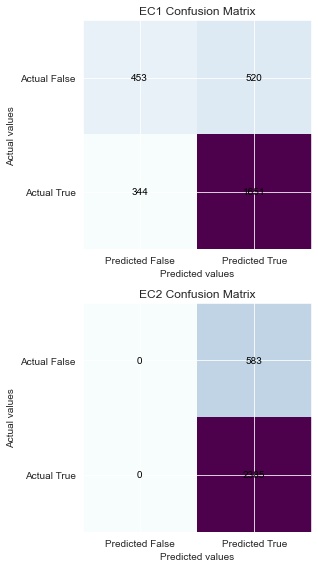

In [60]:
rfc = RandomForestClassifier(**best_params, class_weight=class_weights, random_state=2)
rfc.fit(X_train, y_train)

evaluate_model(rfc)

# Experimenting

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

In [91]:
def plot_cm(y_hat):
    matrix = confusion_matrix(y_val, y_hat)
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest')
    ax.set(ylabel='Predicted values', xlabel='Actual values')
    plt.show()

In [92]:
def plot_roc_curve(positive_probs):
    fpr, tpr, _ = roc_curve(y_val.astype('float'), positive_probs)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Algorithm')
    plt.plot(fpr, tpr, marker='.', label='With Algorithm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [93]:
def evaluate_model(clf):
    y_hat = clf.predict(X_val)
    train_hat = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_hat)
    acc = accuracy_score(y_val, y_hat)
    pos_probs = clf.predict_proba(X_val)[:,1]
    roc = roc_auc_score(y_val, pos_probs)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    print(f'ROCAUC score is: {roc}')
    print(classification_report(y_val, y_hat))
    plot_cm(y_hat)
    plot_roc_curve(pos_probs)

## Trying to predict EC1 class and EC2 class separately as a binary problem

In [94]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# EC1

In [113]:
X = train_data.drop(['id','EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC1']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)
cols_not = [i for i in X_train.columns if i not in high_value_cols]
scaler = StandardScaler()

train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)


X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


## Random Forest

In [114]:
def objective(trial):
    class_weight_0 = trial.suggest_float("class_weight_1_0", 1, 2)
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 400, step=100),
        'max_depth':trial.suggest_int('max_depth', 3, 10),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features':trial.suggest_int('max_features', 2, 31, step=2),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
#         'class_weight':trial.suggest_categorical('class_weight', [{0:1,1:1}, {0:2,1:1}]),
    }
    class_weights = {0:class_weight_0,1:1}
    
    model = RandomForestClassifier(**parameters, class_weight=class_weights, random_state=2)

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    pos_probs = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, pos_probs)

    return score

In [115]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:08:26,124] A new study created in memory with name: no-name-ff48a9ae-9c12-4bba-b923-48d44df6de07
[I 2023-07-05 16:08:36,419] Trial 0 finished with value: 0.7102033088888717 and parameters: {'class_weight_1_0': 1.8671478671483972, 'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 16, 'bootstrap': False}. Best is trial 0 with value: 0.7102033088888717.
[I 2023-07-05 16:08:41,093] Trial 1 finished with value: 0.7152944025016292 and parameters: {'class_weight_1_0': 1.8753492868647414, 'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 8, 'bootstrap': True}. Best is trial 1 with value: 0.7152944025016292.
[I 2023-07-05 16:09:05,048] Trial 2 finished with value: 0.6627792502839833 and parameters: {'class_weight_1_0': 1.6066407645627856, 'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 30, 'bootstrap': False}. Best is trial 1 w

In [116]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'class_weight_1_0': 1.025982733308613, 'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 4, 'bootstrap': False}
The best score is:  0.7169096945858995


Past params:
- the best parameters are:  {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 8, 'bootstrap': True, 'class_weight': {0: 2, 1: 1}}|The best score is:  0.709069436180379

In [120]:
best_params['class_weight']={0:best_params['class_weight_1_0'], 1:1}
del best_params['class_weight_1_0']

Train Accuracy score is: 0.7394271272114574
Test Accuracy score is: 0.7115902964959568
ROCAUC score is: 0.7169096945858995
              precision    recall  f1-score   support

           0       0.59      0.40      0.47       973
           1       0.75      0.86      0.80      1995

    accuracy                           0.71      2968
   macro avg       0.67      0.63      0.64      2968
weighted avg       0.69      0.71      0.69      2968



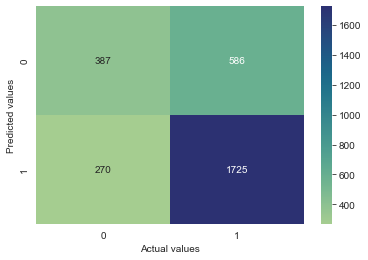

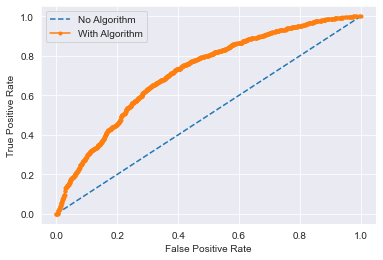

In [121]:
rfc = RandomForestClassifier(**best_params, random_state=2)
rfc.fit(X_train, y_train)

evaluate_model(rfc)

## LightGBM

In [122]:
def evaluate_lgbm(clf):
    y_hat = clf.predict(X_val)
    y_hat_binary = (y_hat >= 0.5).astype(int)
    train_hat = clf.predict(X_train)
    train_hat_binary = (train_hat >= 0.5).astype(int)
    train_acc = accuracy_score(y_train, train_hat_binary)
    acc = accuracy_score(y_val, y_hat_binary)
    roc = roc_auc_score(y_val, y_hat)
    print(f'Train Accuracy score is: {train_acc}')
    print(f'Test Accuracy score is: {acc}')
    print(f'ROCAUC score is: {roc}')
    print(classification_report(y_val, y_hat_binary))
    plot_cm(y_hat_binary)
    plot_roc_curve(y_hat)

In [126]:
def objective(trial):
    parameters = {
        'num_leaves':trial.suggest_int('num_leaves', 10, 70, step=5),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 1000, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.0,2.0),
    }
#     class_weights = trial.suggest_categorical('class_weights', [np.array([2,1.0]), np.array([1.5,1.0])])
#     train = lgb.Dataset(X_train, label=y_train, weight=class_weights[y_train])
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
#     model = LGBMClassifier(**parameters, random_state=2, objective='binary', metric='binary_logloss')
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

#     model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
#     pos_probs = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_hat)

    return score

In [127]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:17:16,654] A new study created in memory with name: no-name-82fb061e-b235-4f4b-a1a3-635d36737f93
[I 2023-07-05 16:17:16,822] Trial 0 finished with value: 0.7098385738240772 and parameters: {'num_leaves': 50, 'learning_rate': 0.0018870353603277616, 'max_depth': 4, 'min_data_in_leaf': 11, 'subsample': 0.7696950644984244, 'feature_fraction': 0.6508834694086827, 'lambda_l1': 5.0888794388238665, 'lambda_l2': 0.1539290239095949, 'n_estimators ': 200, 'bagging_fraction ': 0.9606153170490511, 'bagging_freq': 1, 'class_weight': 1.1530426095929767}. Best is trial 0 with value: 0.7098385738240772.


[LightGBM] [Warning] Unknown parameter: 5.0888794388238665
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9606153170490511
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7696950644984244 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.0888794388238665
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9606153170490511
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7696950644984244 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:16,990] Trial 1 finished with value: 0.7010643257681717 and parameters: {'num_leaves': 10, 'learning_rate': 0.0012762133020178474, 'max_depth': 10, 'min_data_in_leaf': 66, 'subsample': 0.9748811984563951, 'feature_fraction': 0.915476269758129, 'lambda_l1': 3.041125711757915e-07, 'lambda_l2': 0.000437348979550915, 'n_estimators ': 200, 'bagging_fraction ': 0.8248681941788604, 'bagging_freq': 4, 'class_weight': 1.2306795671478987}. Best is trial 0 with value: 0.7098385738240772.



[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8248681941788604
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9748811984563951 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6241
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 31
[LightGBM] [Warning] Unknown parameter: 3.041125711757915e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8248681941788604
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9748811984563951 will be ignored. C

[I 2023-07-05 16:17:17,307] Trial 2 finished with value: 0.7076805580240426 and parameters: {'num_leaves': 55, 'learning_rate': 0.001347199742850943, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.9305119874818102, 'feature_fraction': 0.8568089222122766, 'lambda_l1': 9.588791107857887e-05, 'lambda_l2': 1.2174160485245022e-07, 'n_estimators ': 100, 'bagging_fraction ': 0.8309188678880137, 'bagging_freq': 6, 'class_weight': 1.3699835385920145}. Best is trial 0 with value: 0.7098385738240772.
[I 2023-07-05 16:17:17,496] Trial 3 finished with value: 0.7043585325080429 and parameters: {'num_leaves': 15, 'learning_rate': 0.0013181731400743319, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.9273338214437341, 'feature_fraction': 0.9528823366539092, 'lambda_l1': 4.993965253029736e-05, 'lambda_l2': 0.00016418633122453706, 'n_estimators ': 400, 'bagging_fraction ': 0.929819980838798, 'bagging_freq': 7, 'class_weight': 1.6203146004501798}. Best is trial 0 with value: 0.709838573824

[LightGBM] [Warning] Unknown parameter: 4.993965253029736e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.929819980838798
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9273338214437341 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.993965253029736e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.929819980838798
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9273338214437341 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:17,709] Trial 4 finished with value: 0.7129125485862653 and parameters: {'num_leaves': 65, 'learning_rate': 0.0027246762736836813, 'max_depth': 5, 'min_data_in_leaf': 41, 'subsample': 0.7978277625522336, 'feature_fraction': 0.6545329373078393, 'lambda_l1': 0.0020341309504584406, 'lambda_l2': 0.07145835616426267, 'n_estimators ': 100, 'bagging_fraction ': 0.658075817923703, 'bagging_freq': 5, 'class_weight': 1.726195326620224}. Best is trial 4 with value: 0.7129125485862653.


[LightGBM] [Warning] Unknown parameter: 0.0020341309504584406
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.658075817923703
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7978277625522336 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0020341309504584406
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.658075817923703
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7978277625522336 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[LightGBM] [Warning] Unknown parameter: 1.698397826274092
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5724007588865242
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9752470089045386 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.698397826274092
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5724007588865242
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9752470089045386 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001

[I 2023-07-05 16:17:17,920] Trial 5 finished with value: 0.7139627073851124 and parameters: {'num_leaves': 25, 'learning_rate': 0.0014622766501973586, 'max_depth': 7, 'min_data_in_leaf': 86, 'subsample': 0.9752470089045386, 'feature_fraction': 0.6222824727204801, 'lambda_l1': 1.698397826274092, 'lambda_l2': 2.6344589136170686e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.5724007588865242, 'bagging_freq': 7, 'class_weight': 1.4662225047908843}. Best is trial 5 with value: 0.7139627073851124.
[I 2023-07-05 16:17:18,098] Trial 6 finished with value: 0.7132152065672919 and parameters: {'num_leaves': 15, 'learning_rate': 0.0040883563095445085, 'max_depth': 10, 'min_data_in_leaf': 76, 'subsample': 0.8656562385943094, 'feature_fraction': 0.5611720894306039, 'lambda_l1': 3.76724307733524e-05, 'lambda_l2': 0.7141003382097478, 'n_estimators ': 700, 'bagging_fraction ': 0.9637928952769743, 'bagging_freq': 5, 'class_weight': 1.6182799185561851}. Best is trial 5 with value: 0.7139627073851124.


[LightGBM] [Warning] Unknown parameter: 3.76724307733524e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9637928952769743
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8656562385943094 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.76724307733524e-05
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9637928952769743
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8656562385943094 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:18,430] Trial 7 finished with value: 0.7089357515062065 and parameters: {'num_leaves': 50, 'learning_rate': 0.0020845896379998404, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.8226369058393255, 'feature_fraction': 0.9776988368130994, 'lambda_l1': 0.01682537715070843, 'lambda_l2': 3.803501414650883e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.7973355937992403, 'bagging_freq': 5, 'class_weight': 1.640488993166785}. Best is trial 5 with value: 0.7139627073851124.
[I 2023-07-05 16:17:18,557] Trial 8 finished with value: 0.7117554935643321 and parameters: {'num_leaves': 15, 'learning_rate': 0.001533552570383694, 'max_depth': 4, 'min_data_in_leaf': 46, 'subsample': 0.9448499330554294, 'feature_fraction': 0.5263098052267847, 'lambda_l1': 3.207986648791043e-05, 'lambda_l2': 1.3336992911743771e-08, 'n_estimators ': 500, 'bagging_fraction ': 0.8246531028938913, 'bagging_freq': 8, 'class_weight': 1.9565665924896802}. Best is trial 5 with value: 0.713962707385112

[LightGBM] [Warning] Unknown parameter: 3.207986648791043e-05
[LightGBM] [Warning] Unknown parameter: 0.8246531028938913
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9448499330554294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.207986648791043e-05
[LightGBM] [Warning] Unknown parameter: 0.8246531028938913
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9448499330554294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:18,762] Trial 9 finished with value: 0.7112418765309987 and parameters: {'num_leaves': 45, 'learning_rate': 0.007342546959161461, 'max_depth': 5, 'min_data_in_leaf': 91, 'subsample': 0.5966551200624631, 'feature_fraction': 0.7314165925048234, 'lambda_l1': 2.3518330284706857e-08, 'lambda_l2': 0.1361505278521004, 'n_estimators ': 600, 'bagging_fraction ': 0.6800683737674726, 'bagging_freq': 8, 'class_weight': 1.1310807506460359}. Best is trial 5 with value: 0.7139627073851124.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:18,939] Trial 10 finished with value: 0.6948700116169149 and parameters: {'num_leaves': 30, 'learning_rate': 0.0011326652379311905, 'max_depth': 2, 'min_data_in_leaf': 66, 'subsample': 0.7013201134619593, 'feature_fraction': 0.7998190042578475, 'lambda_l1': 7.1932030436246, 'lambda_l2': 8.008509365626976e-07, 'n_estimators ': 1000, 'bagging_fraction ': 0.532294994723135, 'bagging_freq': 10, 'class_weight': 1.4023738175993594}. Best is trial 5 with value: 0.7139627073851124.


[LightGBM] [Warning] Unknown parameter: 7.1932030436246
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.532294994723135
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7013201134619593 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.1932030436246
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.532294994723135
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7013201134619593 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001284 

[I 2023-07-05 16:17:19,239] Trial 11 finished with value: 0.7141546054241461 and parameters: {'num_leaves': 30, 'learning_rate': 0.004187381418170811, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.8431613628929215, 'feature_fraction': 0.5360283157528055, 'lambda_l1': 0.05691929562638827, 'lambda_l2': 7.831113357940845, 'n_estimators ': 800, 'bagging_fraction ': 0.9994410783957643, 'bagging_freq': 3, 'class_weight': 1.5046147299878045}. Best is trial 11 with value: 0.7141546054241461.


[LightGBM] [Warning] Unknown parameter: 0.05691929562638827
[LightGBM] [Warning] Unknown parameter: 0.9994410783957643
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8431613628929215 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6241
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 31
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.05691929562638827
[LightGBM] [Warning] Unknown parameter: 0.9994410783957643
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warni

[I 2023-07-05 16:17:19,499] Trial 12 finished with value: 0.7155646052438392 and parameters: {'num_leaves': 30, 'learning_rate': 0.004091015480567871, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.8740028496273393, 'feature_fraction': 0.5024047280312942, 'lambda_l1': 0.1956781253270064, 'lambda_l2': 2.7012721275057507, 'n_estimators ': 800, 'bagging_fraction ': 0.5242328968596074, 'bagging_freq': 2, 'class_weight': 1.388281972987332}. Best is trial 12 with value: 0.7155646052438392.


[LightGBM] [Warning] Unknown parameter: 0.1956781253270064
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.5242328968596074
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8740028496273393 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.1956781253270064
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.5242328968596074
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8740028496273393 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:19,821] Trial 13 finished with value: 0.7152289768614755 and parameters: {'num_leaves': 35, 'learning_rate': 0.004309017810284394, 'max_depth': 8, 'min_data_in_leaf': 61, 'subsample': 0.8502021797134117, 'feature_fraction': 0.500813832024637, 'lambda_l1': 0.11562233150847577, 'lambda_l2': 7.187167046999487, 'n_estimators ': 900, 'bagging_fraction ': 0.5013066202128171, 'bagging_freq': 2, 'class_weight': 1.2322419002851261}. Best is trial 12 with value: 0.7155646052438392.


[LightGBM] [Warning] Unknown parameter: 0.18354071460338514
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.5073144707315813
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7250116067498846 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.18354071460338514
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.5073144707315813
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7250116067498846 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:20,111] Trial 14 finished with value: 0.7157763370399277 and parameters: {'num_leaves': 35, 'learning_rate': 0.00584739773566223, 'max_depth': 8, 'min_data_in_leaf': 61, 'subsample': 0.7250116067498846, 'feature_fraction': 0.5078002543905772, 'lambda_l1': 0.18354071460338514, 'lambda_l2': 8.955685726948005, 'n_estimators ': 1000, 'bagging_fraction ': 0.5073144707315813, 'bagging_freq': 1, 'class_weight': 1.0312676026775196}. Best is trial 14 with value: 0.7157763370399277.
[I 2023-07-05 16:17:20,380] Trial 15 finished with value: 0.714756830411074 and parameters: {'num_leaves': 40, 'learning_rate': 0.0075413850183645844, 'max_depth': 6, 'min_data_in_leaf': 31, 'subsample': 0.7098156688260963, 'feature_fraction': 0.5626903478794645, 'lambda_l1': 0.24813506194159732, 'lambda_l2': 0.0053036313476812315, 'n_estimators ': 1000, 'bagging_fraction ': 0.5843630228663899, 'bagging_freq': 1, 'class_weight': 1.0363047848731344}. Best is trial 14 with value: 0.7157763370399277.

[LightGBM] [Warning] Unknown parameter: 0.24813506194159732
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5843630228663899
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7098156688260963 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.24813506194159732
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5843630228663899
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7098156688260963 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:20,629] Trial 16 finished with value: 0.7150731401989041 and parameters: {'num_leaves': 25, 'learning_rate': 0.009974928400044809, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.6381255795251063, 'feature_fraction': 0.598857255436249, 'lambda_l1': 0.006096824962951625, 'lambda_l2': 7.721521715050305, 'n_estimators ': 800, 'bagging_fraction ': 0.505414679354313, 'bagging_freq': 3, 'class_weight': 1.0415627634058269}. Best is trial 14 with value: 0.7157763370399277.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.006096824962951625
[LightGBM] [Warning] Unknown parameter: 0.505414679354313
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6381255795251063 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.006096824962951625
[LightGBM] [Warning] Unknown parameter: 0.505414679354313
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6381255795251063 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2023-07-05 16:17:20,979] Trial 17 finished with value: 0.7179541865970167 and parameters: {'num_leaves': 65, 'learning_rate': 0.005677456672153208, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.5045236632574674, 'feature_fraction': 0.5035167330280681, 'lambda_l1': 0.5341622059301556, 'lambda_l2': 0.011425810780509953, 'n_estimators ': 900, 'bagging_fraction ': 0.6129786534381291, 'bagging_freq': 2, 'class_weight': 1.0095999664050688}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.8169

[I 2023-07-05 16:17:21,380] Trial 18 finished with value: 0.7146932078397432 and parameters: {'num_leaves': 70, 'learning_rate': 0.006197686875909023, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.5010228218564091, 'feature_fraction': 0.7033073170616184, 'lambda_l1': 0.8169950941241596, 'lambda_l2': 0.013733730431720116, 'n_estimators ': 1000, 'bagging_fraction ': 0.6307012061956343, 'bagging_freq': 1, 'class_weight': 1.131898239644561}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.0012410887515652694
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7134478186916122
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5194532778985428 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0012410887515652694
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7134478186916122
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5194532778985428 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:21,719] Trial 19 finished with value: 0.7158319745921844 and parameters: {'num_leaves': 60, 'learning_rate': 0.005835164526416641, 'max_depth': 8, 'min_data_in_leaf': 51, 'subsample': 0.5194532778985428, 'feature_fraction': 0.5803136724021298, 'lambda_l1': 0.0012410887515652694, 'lambda_l2': 0.7893369681601653, 'n_estimators ': 900, 'bagging_fraction ': 0.7134478186916122, 'bagging_freq': 3, 'class_weight': 1.0099143230998575}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.0016465476809922766
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.7154588227102563
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5121588688441703 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0016465476809922766
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.7154588227102563
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5121588688441703 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:22,020] Trial 20 finished with value: 0.7160668887017132 and parameters: {'num_leaves': 60, 'learning_rate': 0.003160238322572353, 'max_depth': 6, 'min_data_in_leaf': 51, 'subsample': 0.5121588688441703, 'feature_fraction': 0.5904511472716235, 'lambda_l1': 0.0016465476809922766, 'lambda_l2': 0.00616870370664486, 'n_estimators ': 700, 'bagging_fraction ': 0.7154588227102563, 'bagging_freq': 3, 'class_weight': 1.0070441865021664}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.7226191354929534
[LightGBM] [Warning] Unknown parameter: 0.0011638773856395967
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5103954638858798 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warnin

[I 2023-07-05 16:17:22,321] Trial 21 finished with value: 0.7158237319918501 and parameters: {'num_leaves': 60, 'learning_rate': 0.003106025207351727, 'max_depth': 6, 'min_data_in_leaf': 51, 'subsample': 0.5103954638858798, 'feature_fraction': 0.5804841873295518, 'lambda_l1': 0.0011638773856395967, 'lambda_l2': 0.006390304323771881, 'n_estimators ': 700, 'bagging_fraction ': 0.7226191354929534, 'bagging_freq': 3, 'class_weight': 1.0010640181295165}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:22,582] Trial 22 finished with value: 0.7133591944918823 and parameters: {'num_leaves': 70, 'learning_rate': 0.005456883872980919, 'max_depth': 5, 'min_data_in_leaf': 26, 'subsample': 0.5503743000710763, 'feature_fraction': 0.6020971842971232, 'lambda_l1': 0.0007549452202495906, 'lambda_l2': 0.851911273543866, 'n_estimators ': 900, 'bagging_fraction ': 0.7190290161466967, 'bagging_freq': 4, 'class_weight': 1.2411412451119073}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.0007549452202495906
[LightGBM] [Warning] Unknown parameter: 0.7190290161466967
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5503743000710763 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.0007549452202495906
[LightGBM] [Warning] Unknown parameter: 0.7190290161466967
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5503743000710763 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[LightGBM] [Warning] Unknown parameter: 0.007746995300265876
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6279677359232972
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5520309264651738 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.007746995300265876
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6279677359232972
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5520309264651738 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:22,962] Trial 23 finished with value: 0.7158945668384733 and parameters: {'num_leaves': 60, 'learning_rate': 0.00333976495823659, 'max_depth': 8, 'min_data_in_leaf': 46, 'subsample': 0.5520309264651738, 'feature_fraction': 0.5469788031485701, 'lambda_l1': 0.007746995300265876, 'lambda_l2': 0.03356975543361047, 'n_estimators ': 700, 'bagging_fraction ': 0.6279677359232972, 'bagging_freq': 2, 'class_weight': 1.0023301624060463}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.013752100073482746
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6199511459883125
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5560799130732541 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.013752100073482746
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6199511459883125
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5560799130732541 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:23,295] Trial 24 finished with value: 0.7161624513493394 and parameters: {'num_leaves': 60, 'learning_rate': 0.0027970281057220748, 'max_depth': 6, 'min_data_in_leaf': 41, 'subsample': 0.5560799130732541, 'feature_fraction': 0.5539963997766465, 'lambda_l1': 0.013752100073482746, 'lambda_l2': 0.0018335834048971626, 'n_estimators ': 600, 'bagging_fraction ': 0.6199511459883125, 'bagging_freq': 2, 'class_weight': 1.1128810916743705}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:23,506] Trial 25 finished with value: 0.7113634548859301 and parameters: {'num_leaves': 65, 'learning_rate': 0.0025979919544535457, 'max_depth': 4, 'min_data_in_leaf': 21, 'subsample': 0.6045439013251135, 'feature_fraction': 0.6274898179501545, 'lambda_l1': 0.02416303952056167, 'lambda_l2': 0.0024526081878031313, 'n_estimators ': 600, 'bagging_fraction ': 0.5993299591534624, 'bagging_freq': 2, 'class_weight': 1.1087622998577964}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-05 16:17:23,843] Trial 26 finished with value: 0.7118618746248973 and parameters: {'num_leaves': 55, 'learning_rate': 0.002301899103346207, 'max_depth': 6, 'min_data_in_leaf': 1, 'subsample': 0.5541262955121257, 'feature_fraction': 0.6776069989508176, 'lambda_l1': 0.03451090908398424, 'lambda_l2': 0.001383110093160054, 'n_estimators ': 500, 'bagging_fraction ': 0.666869839147729, 'bagging_freq': 4, 'class_weight': 1.1904451473549431}. Best is trial 17 with value: 0.7179541865970167.
[I 2023-07-05 16:17:24,009] Trial 27 finished with value: 0.7012585420385496 and parameters: {'num_leaves': 65, 'learning_rate': 0.0032306007340454045, 'max_depth': 2, 'min_data_in_leaf': 71, 'subsample': 0.6517943916895808, 'feature_fraction': 0.5566506395733284, 'lambda_l1': 1.146437820085138, 'lambda_l2': 0.022920410364747214, 'n_estimators ': 600, 'bagging_fraction ': 0.6324019935994056, 'bagging_freq': 2, 'class_weight': 1.1082615377735072}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 1.146437820085138
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6324019935994056
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6517943916895808 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.146437820085138
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.6324019935994056
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6517943916895808 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001

[I 2023-07-05 16:17:24,195] Trial 28 finished with value: 0.7069626790511736 and parameters: {'num_leaves': 50, 'learning_rate': 0.0018834538489634913, 'max_depth': 3, 'min_data_in_leaf': 36, 'subsample': 0.5003880591127738, 'feature_fraction': 0.6101820252221157, 'lambda_l1': 0.0062130066389217975, 'lambda_l2': 0.0008620260652410293, 'n_estimators ': 400, 'bagging_fraction ': 0.7659160929257045, 'bagging_freq': 4, 'class_weight': 1.2939467005364174}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7659160929257045
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5003880591127738 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6241
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 31
[LightGBM] [Warning] Unknown parameter: 0.0062130066389217975
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7659160929257045
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5003880591127738 will be ignored. C

[I 2023-07-05 16:17:24,454] Trial 29 finished with value: 0.7120089535246132 and parameters: {'num_leaves': 55, 'learning_rate': 0.0017202738300169586, 'max_depth': 5, 'min_data_in_leaf': 11, 'subsample': 0.5813148972383172, 'feature_fraction': 0.6532143571114593, 'lambda_l1': 5.671378386018402, 'lambda_l2': 0.009744865079246504, 'n_estimators ': 700, 'bagging_fraction ': 0.5636824093087913, 'bagging_freq': 1, 'class_weight': 1.0928090849483847}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.5636824093087913
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5813148972383172 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6241
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 31
[LightGBM] [Warning] Unknown parameter: 5.671378386018402
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.5636824093087913
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5813148972383172 will be ignored. Curren

[I 2023-07-05 16:17:24,769] Trial 30 finished with value: 0.7155239074046886 and parameters: {'num_leaves': 45, 'learning_rate': 0.0022369574808204055, 'max_depth': 6, 'min_data_in_leaf': 56, 'subsample': 0.5372872376089778, 'feature_fraction': 0.5447847144536251, 'lambda_l1': 0.7782531502541234, 'lambda_l2': 0.00012559738936663333, 'n_estimators ': 800, 'bagging_fraction ': 0.6853407946445964, 'bagging_freq': 3, 'class_weight': 1.17631027743295}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.004051689861695146
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.619755182215964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5633530433622281 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning]

[I 2023-07-05 16:17:25,214] Trial 31 finished with value: 0.716288666166959 and parameters: {'num_leaves': 60, 'learning_rate': 0.0032544198518815056, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.5633530433622281, 'feature_fraction': 0.5396413099338131, 'lambda_l1': 0.004051689861695146, 'lambda_l2': 0.028185834928337688, 'n_estimators ': 700, 'bagging_fraction ': 0.619755182215964, 'bagging_freq': 2, 'class_weight': 1.0929450072434352}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.004205088555474396
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6025719510808414
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5722216245946711 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.004205088555474396
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6025719510808414
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5722216245946711 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [W

[I 2023-07-05 16:17:25,670] Trial 32 finished with value: 0.7168924366414494 and parameters: {'num_leaves': 70, 'learning_rate': 0.003651444371479, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.5722216245946711, 'feature_fraction': 0.5338158391355534, 'lambda_l1': 0.004205088555474396, 'lambda_l2': 0.1206395259340072, 'n_estimators ': 500, 'bagging_fraction ': 0.6025719510808414, 'bagging_freq': 2, 'class_weight': 1.0743407551607722}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:26,091] Trial 33 finished with value: 0.7169503924250502 and parameters: {'num_leaves': 70, 'learning_rate': 0.003664116357328942, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.5709876127410054, 'feature_fraction': 0.5281009982800364, 'lambda_l1': 0.04065317779277999, 'lambda_l2': 0.06746019265259363, 'n_estimators ': 500, 'bagging_fraction ': 0.5994703213783275, 'bagging_freq': 2, 'class_weight': 1.0818010608134723}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:26,472] Trial 34 finished with value: 0.7159970841801317 and parameters: {'num_leaves': 70, 'learning_rate': 0.0047473167149894736, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.6217660169582336, 'feature_fraction': 0.5263286754501137, 'lambda_l1': 0.0001998377306639751, 'lambda_l2': 0.1670631099476521, 'n_estimators ': 300, 'bagging_fraction ': 0.5532608428873937, 'bagging_freq': 1, 'class_weight': 1.1980736807711743}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:26,831] Trial 35 finished with value: 0.7169287555991727 and parameters: {'num_leaves': 70, 'learning_rate': 0.0036818858345467292, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.6630023998343781, 'feature_fraction': 0.5004113675441291, 'lambda_l1': 0.06222093201247039, 'lambda_l2': 0.050030571693433966, 'n_estimators ': 500, 'bagging_fraction ': 0.6044053694321085, 'bagging_freq': 2, 'class_weight': 1.2942915989014006}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.07218373110498146
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.5921439902081278
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fract

[I 2023-07-05 16:17:27,474] Trial 36 finished with value: 0.7162652262722583 and parameters: {'num_leaves': 70, 'learning_rate': 0.0036228979468318737, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.6687873583065844, 'feature_fraction': 0.5023633044995663, 'lambda_l1': 0.07218373110498146, 'lambda_l2': 0.0881171870124469, 'n_estimators ': 500, 'bagging_fraction ': 0.5921439902081278, 'bagging_freq': 6, 'class_weight': 1.304778054233911}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.43346277545292056
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.5556339554094807
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5844859771892433 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.43346277545292056
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.5556339554094807
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5844859771892433 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2023-07-05 16:17:27,876] Trial 37 finished with value: 0.715598863551479 and parameters: {'num_leaves': 65, 'learning_rate': 0.004864586681330396, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.5844859771892433, 'feature_fraction': 0.6348377737585984, 'lambda_l1': 0.43346277545292056, 'lambda_l2': 0.24682835211100052, 'n_estimators ': 300, 'bagging_fraction ': 0.5556339554094807, 'bagging_freq': 4, 'class_weight': 1.1623898238935628}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 1.9080473475397677
[LightGBM] [Warning] Unknown parameter: 0.6573382368703227
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6197988930811102 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.9080473475397677
[LightGBM] [Warning] Unknown parameter: 0.6573382368703227
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6197988930811102 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:28,258] Trial 38 finished with value: 0.7168094954755853 and parameters: {'num_leaves': 70, 'learning_rate': 0.0036583981981379806, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.6197988930811102, 'feature_fraction': 0.5712018568876587, 'lambda_l1': 1.9080473475397677, 'lambda_l2': 0.055220838580655615, 'n_estimators ': 400, 'bagging_fraction ': 0.6573382368703227, 'bagging_freq': 1, 'class_weight': 1.0713499975920246}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.07517067994683453
[LightGBM] [Warning] Unknown parameter: 0.5924580629701154
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5781926870283695 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.07517067994683453
[LightGBM] [Warning] Unknown parameter: 0.5924580629701154
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5781926870283695 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2023-07-05 16:17:28,596] Trial 39 finished with value: 0.7156988050805327 and parameters: {'num_leaves': 65, 'learning_rate': 0.003714659347846093, 'max_depth': 7, 'min_data_in_leaf': 21, 'subsample': 0.5781926870283695, 'feature_fraction': 0.5217957140136882, 'lambda_l1': 0.07517067994683453, 'lambda_l2': 0.2108495231373663, 'n_estimators ': 300, 'bagging_fraction ': 0.5924580629701154, 'bagging_freq': 10, 'class_weight': 1.0633130412904124}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.032628989293905716
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.5439183838274202
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5342312003732546 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.032628989293905716
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.5439183838274202
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5342312003732546 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:28,962] Trial 40 finished with value: 0.7157678368583329 and parameters: {'num_leaves': 70, 'learning_rate': 0.004835394483706728, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.5342312003732546, 'feature_fraction': 0.5269821305673253, 'lambda_l1': 0.032628989293905716, 'lambda_l2': 0.04686100881351783, 'n_estimators ': 500, 'bagging_fraction ': 0.5439183838274202, 'bagging_freq': 6, 'class_weight': 1.157400774436557}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-05 16:17:29,400] Trial 41 finished with value: 0.7167244936596373 and parameters: {'num_leaves': 70, 'learning_rate': 0.0038282594099603873, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.6011851718947236, 'feature_fraction': 0.5716423997269696, 'lambda_l1': 2.0876052783786543, 'lambda_l2': 0.056547005297885825, 'n_estimators ': 400, 'bagging_fraction ': 0.6577556649040929, 'bagging_freq': 1, 'class_weight': 1.066157837222906}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 2.8639299364954875
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5657111543609448
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6217096072152642 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.8639299364954875
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5657111543609448
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6217096072152642 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:29,784] Trial 42 finished with value: 0.7160980560342274 and parameters: {'num_leaves': 65, 'learning_rate': 0.0035466907098238654, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.6217096072152642, 'feature_fraction': 0.5762115223595059, 'lambda_l1': 2.8639299364954875, 'lambda_l2': 0.015304272487154527, 'n_estimators ': 400, 'bagging_fraction ': 0.5657111543609448, 'bagging_freq': 1, 'class_weight': 1.070367214151438}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.4513063483295722
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.603560266748336
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6753034212537502 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.4513063483295722
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.603560266748336
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6753034212537502 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001

[I 2023-07-05 16:17:30,140] Trial 43 finished with value: 0.7168568904275077 and parameters: {'num_leaves': 65, 'learning_rate': 0.004456983458774513, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.6753034212537502, 'feature_fraction': 0.5207479663257317, 'lambda_l1': 0.4513063483295722, 'lambda_l2': 0.46109361087036355, 'n_estimators ': 500, 'bagging_fraction ': 0.603560266748336, 'bagging_freq': 2, 'class_weight': 1.1527432240490554}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.45800985033608926
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6040947669575663
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6715681631875584 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.45800985033608926
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6040947669575663
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6715681631875584 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [War

[I 2023-07-05 16:17:30,465] Trial 44 finished with value: 0.717639422296749 and parameters: {'num_leaves': 55, 'learning_rate': 0.004443886769348388, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.6715681631875584, 'feature_fraction': 0.5226969346372794, 'lambda_l1': 0.45800985033608926, 'lambda_l2': 0.38204740445188384, 'n_estimators ': 500, 'bagging_fraction ': 0.6040947669575663, 'bagging_freq': 2, 'class_weight': 1.1476547919190083}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:30,846] Trial 45 finished with value: 0.717503161809972 and parameters: {'num_leaves': 55, 'learning_rate': 0.0040386971522944955, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.7822617125481544, 'feature_fraction': 0.5368139720189604, 'lambda_l1': 0.10446357347353269, 'lambda_l2': 1.4644819480389246, 'n_estimators ': 500, 'bagging_fraction ': 0.5770507983578421, 'bagging_freq': 3, 'class_weight': 1.226645009208849}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:31,203] Trial 46 finished with value: 0.7160558127075138 and parameters: {'num_leaves': 50, 'learning_rate': 0.004179705555890208, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.7799440781499469, 'feature_fraction': 0.6148135670825914, 'lambda_l1': 0.12970089412367622, 'lambda_l2': 2.0556769229619354, 'n_estimators ': 600, 'bagging_fraction ': 0.5352281470970298, 'bagging_freq': 3, 'class_weight': 1.2643856489195087}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:31,566] Trial 47 finished with value: 0.7163808802581995 and parameters: {'num_leaves': 55, 'learning_rate': 0.005181780129759929, 'max_depth': 6, 'min_data_in_leaf': 86, 'subsample': 0.7439670150275884, 'feature_fraction': 0.5043111281601808, 'lambda_l1': 0.3075498557654505, 'lambda_l2': 0.36246204746678584, 'n_estimators ': 400, 'bagging_fraction ': 0.5864465081851652, 'bagging_freq': 5, 'class_weight': 1.209125160271403}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:31,962] Trial 48 finished with value: 0.7161567845616096 and parameters: {'num_leaves': 45, 'learning_rate': 0.004431913446658575, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.752773008824542, 'feature_fraction': 0.5460945524241666, 'lambda_l1': 6.794535945273589, 'lambda_l2': 1.6381883998954878, 'n_estimators ': 200, 'bagging_fraction ': 0.5609340313313764, 'bagging_freq': 4, 'class_weight': 1.332549827885743}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: 0.0570687323684706
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5251964325816112
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6860711923931115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0570687323684706
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5251964325816112
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6860711923931115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:32,255] Trial 49 finished with value: 0.7136502613161887 and parameters: {'num_leaves': 55, 'learning_rate': 0.00395035148245252, 'max_depth': 5, 'min_data_in_leaf': 91, 'subsample': 0.6860711923931115, 'feature_fraction': 0.5967055793019449, 'lambda_l1': 0.0570687323684706, 'lambda_l2': 0.6500825990348419, 'n_estimators ': 100, 'bagging_fraction ': 0.5251964325816112, 'bagging_freq': 3, 'class_weight': 1.2325758222475085}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.16282891165564758
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.5751521486923417
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7307062959103391 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.16282891165564758
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.5751521486923417
[LightG

[I 2023-07-05 16:17:32,666] Trial 50 finished with value: 0.7167332514224924 and parameters: {'num_leaves': 50, 'learning_rate': 0.002865212711010797, 'max_depth': 7, 'min_data_in_leaf': 81, 'subsample': 0.7307062959103391, 'feature_fraction': 0.5598265836647669, 'lambda_l1': 0.16282891165564758, 'lambda_l2': 0.26171623846698183, 'n_estimators ': 600, 'bagging_fraction ': 0.5751521486923417, 'bagging_freq': 2, 'class_weight': 1.2658411951430786}. Best is trial 17 with value: 0.7179541865970167.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.012259136352947127
[LightGBM] [Warning] Unknown parameter: 0.6069966038057727
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6443922019590702 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.012259136352947127
[LightGBM] [Warning] Unknown parameter: 0.6069966038057727
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6443922019590702 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:33,105] Trial 51 finished with value: 0.7176492103846461 and parameters: {'num_leaves': 65, 'learning_rate': 0.00384083611483747, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.6443922019590702, 'feature_fraction': 0.5247254650035814, 'lambda_l1': 0.012259136352947127, 'lambda_l2': 0.10667464722073351, 'n_estimators ': 500, 'bagging_fraction ': 0.6069966038057727, 'bagging_freq': 2, 'class_weight': 1.138628354805237}. Best is trial 17 with value: 0.7179541865970167.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:33,490] Trial 52 finished with value: 0.7181834339188156 and parameters: {'num_leaves': 65, 'learning_rate': 0.0040760042099819566, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.6522482429562402, 'feature_fraction': 0.5032349354332954, 'lambda_l1': 0.022935869911630262, 'lambda_l2': 0.0855341785528155, 'n_estimators ': 500, 'bagging_fraction ': 0.644572413808908, 'bagging_freq': 3, 'class_weight': 1.1421447353258156}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:33,704] Trial 53 finished with value: 0.7111576474588321 and parameters: {'num_leaves': 10, 'learning_rate': 0.004490843083047735, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.6891622748356007, 'feature_fraction': 0.521126576527131, 'lambda_l1': 0.017007857873231905, 'lambda_l2': 0.13470452714528572, 'n_estimators ': 300, 'bagging_fraction ': 0.6444347672147361, 'bagging_freq': 3, 'class_weight': 1.1508325434978344}. Best is trial 52 with value: 0.7181834339188156.



[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6444347672147361
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6891622748356007 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.017007857873231905
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6444347672147361
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6891622748356007 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_col_wise=true` to remo

[I 2023-07-05 16:17:34,097] Trial 54 finished with value: 0.7180742194643854 and parameters: {'num_leaves': 65, 'learning_rate': 0.004178916704499568, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.6465989377806954, 'feature_fraction': 0.5183770330232336, 'lambda_l1': 0.33240977481618816, 'lambda_l2': 1.3112714028623922, 'n_estimators ': 500, 'bagging_fraction ': 0.5738242395377642, 'bagging_freq': 3, 'class_weight': 1.2069400510479014}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.9082025488643861
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5732213906269107
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7106886418522869 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9082025488643861
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5732213906269107
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7106886418522869 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:34,452] Trial 55 finished with value: 0.716790434462312 and parameters: {'num_leaves': 55, 'learning_rate': 0.004125893810161553, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.7106886418522869, 'feature_fraction': 0.5592091038487277, 'lambda_l1': 0.9082025488643861, 'lambda_l2': 2.483084226756567, 'n_estimators ': 400, 'bagging_fraction ': 0.5732213906269107, 'bagging_freq': 5, 'class_weight': 1.2104691009658604}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.4127504397806259
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.6421219157046115
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6382911291125383 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.4127504397806259
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.6421219157046115
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6382911291125383 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:34,930] Trial 56 finished with value: 0.7164460483170929 and parameters: {'num_leaves': 60, 'learning_rate': 0.00510634915978754, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.6382911291125383, 'feature_fraction': 0.5878608180948047, 'lambda_l1': 0.4127504397806259, 'lambda_l2': 1.3428846111381572, 'n_estimators ': 600, 'bagging_fraction ': 0.6421219157046115, 'bagging_freq': 4, 'class_weight': 1.1388805741911165}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.1443510015256756
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6183266825370364
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7027259676393344 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.1443510015256756
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.6183266825370364
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7027259676393344 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:35,253] Trial 57 finished with value: 0.7165678842532848 and parameters: {'num_leaves': 40, 'learning_rate': 0.005322975539021993, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7027259676393344, 'feature_fraction': 0.5151413294965561, 'lambda_l1': 0.1443510015256756, 'lambda_l2': 4.016604373998004, 'n_estimators ': 500, 'bagging_fraction ': 0.6183266825370364, 'bagging_freq': 3, 'class_weight': 1.1295706468190598}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 3.3293850232815254
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.5482000893559239
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6497170144543388 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.3293850232815254
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.5482000893559239
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6497170144543388 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:35,675] Trial 58 finished with value: 0.7161572997241304 and parameters: {'num_leaves': 60, 'learning_rate': 0.004572341911542646, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.6497170144543388, 'feature_fraction': 0.5451016268442845, 'lambda_l1': 3.3293850232815254, 'lambda_l2': 0.47387551425119656, 'n_estimators ': 600, 'bagging_fraction ': 0.5482000893559239, 'bagging_freq': 3, 'class_weight': 1.0457691298202205}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.01685486916366137
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5780772853853399
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7995253181779902 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.01685486916366137
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5780772853853399
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7995253181779902 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2023-07-05 16:17:36,063] Trial 59 finished with value: 0.7178593966931718 and parameters: {'num_leaves': 65, 'learning_rate': 0.004038974774069679, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.7995253181779902, 'feature_fraction': 0.5000964369275385, 'lambda_l1': 0.01685486916366137, 'lambda_l2': 1.0615834812376017, 'n_estimators ': 400, 'bagging_fraction ': 0.5780772853853399, 'bagging_freq': 7, 'class_weight': 1.1858881525167688}. Best is trial 52 with value: 0.7181834339188156.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.012184939210667586
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6145282433566672
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8021791862182164 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.012184939210667586
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6145282433566672
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8021791862182164 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [

[I 2023-07-05 16:17:36,440] Trial 60 finished with value: 0.7179289436334928 and parameters: {'num_leaves': 65, 'learning_rate': 0.006214025871568748, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.8021791862182164, 'feature_fraction': 0.5095203953221061, 'lambda_l1': 0.012184939210667586, 'lambda_l2': 0.5659105144399548, 'n_estimators ': 400, 'bagging_fraction ': 0.6145282433566672, 'bagging_freq': 8, 'class_weight': 1.1827591127750636}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.012435374039053053
[LightGBM] [Warning] Unknown parameter: 0.6170489638612001
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7692447536188399 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.012435374039053053
[LightGBM] [Warning] Unknown parameter: 0.6170489638612001
[LightGBM] [Warning] Unknown parameter: 400
[Ligh

[I 2023-07-05 16:17:36,908] Trial 61 finished with value: 0.7178166382039373 and parameters: {'num_leaves': 65, 'learning_rate': 0.00630179698427855, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.7692447536188399, 'feature_fraction': 0.5133675075642355, 'lambda_l1': 0.012435374039053053, 'lambda_l2': 0.567939355067338, 'n_estimators ': 400, 'bagging_fraction ': 0.6170489638612001, 'bagging_freq': 8, 'class_weight': 1.196296857004389}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6181498653168578
[LightGBM] [Warning] Unknown parameter: 0.011201914964185409
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] 

[I 2023-07-05 16:17:37,387] Trial 62 finished with value: 0.716551399052616 and parameters: {'num_leaves': 65, 'learning_rate': 0.006510411285315947, 'max_depth': 9, 'min_data_in_leaf': 71, 'subsample': 0.8271484364965632, 'feature_fraction': 0.5017534393006586, 'lambda_l1': 0.011201914964185409, 'lambda_l2': 3.880269356484574, 'n_estimators ': 300, 'bagging_fraction ': 0.6181498653168578, 'bagging_freq': 8, 'class_weight': 1.1784271735425254}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.0030190118437091957
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6445435555298319
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7608616878603847 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0030190118437091957
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6445435555298319
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7608616878603847 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:37,942] Trial 63 finished with value: 0.7178233353167089 and parameters: {'num_leaves': 65, 'learning_rate': 0.005656488042829986, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.7608616878603847, 'feature_fraction': 0.5183687553242118, 'lambda_l1': 0.0030190118437091957, 'lambda_l2': 1.1147129887941432, 'n_estimators ': 400, 'bagging_fraction ': 0.6445435555298319, 'bagging_freq': 7, 'class_weight': 1.193774604644985}. Best is trial 52 with value: 0.7181834339188156.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0029404127094712507
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6416176436484895
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8006883742169477 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0029404127094712507
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6416176436484895
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8006883742169477 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, 

[I 2023-07-05 16:17:38,443] Trial 64 finished with value: 0.7158917334446084 and parameters: {'num_leaves': 65, 'learning_rate': 0.00573073978050354, 'max_depth': 9, 'min_data_in_leaf': 76, 'subsample': 0.8006883742169477, 'feature_fraction': 0.5643259088882605, 'lambda_l1': 0.0029404127094712507, 'lambda_l2': 1.0662430093275355, 'n_estimators ': 400, 'bagging_fraction ': 0.6416176436484895, 'bagging_freq': 7, 'class_weight': 1.1976280103134123}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.021937281798806423
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6652294232499453
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8045159455274733 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.021937281798806423
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6652294232499453
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8045159455274733 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:39,051] Trial 65 finished with value: 0.7170608947857826 and parameters: {'num_leaves': 60, 'learning_rate': 0.006441542534544874, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.8045159455274733, 'feature_fraction': 0.5124734691705007, 'lambda_l1': 0.021937281798806423, 'lambda_l2': 0.698068661760931, 'n_estimators ': 400, 'bagging_fraction ': 0.6652294232499453, 'bagging_freq': 9, 'class_weight': 1.2530785751751454}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0026950965965290177
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6844824869197876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7666859393559977 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0026950965965290177
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6844824869197876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7666859393559977 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] 

[I 2023-07-05 16:17:39,470] Trial 66 finished with value: 0.717863002830818 and parameters: {'num_leaves': 65, 'learning_rate': 0.00706056686745677, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.7666859393559977, 'feature_fraction': 0.5439227476373708, 'lambda_l1': 0.0026950965965290177, 'lambda_l2': 5.833580734471931, 'n_estimators ': 300, 'bagging_fraction ': 0.6844824869197876, 'bagging_freq': 7, 'class_weight': 1.3687543810217269}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.0008699237408949125
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6773347854498522
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7577986606412489 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0008699237408949125
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6773347854498522
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7577986606412489 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:40,016] Trial 67 finished with value: 0.7162149979264708 and parameters: {'num_leaves': 60, 'learning_rate': 0.006957562574870845, 'max_depth': 9, 'min_data_in_leaf': 66, 'subsample': 0.7577986606412489, 'feature_fraction': 0.5508399745238707, 'lambda_l1': 0.0008699237408949125, 'lambda_l2': 5.74706370289263, 'n_estimators ': 300, 'bagging_fraction ': 0.6773347854498522, 'bagging_freq': 7, 'class_weight': 1.346090557702542}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.0020092759190983582
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.697532953339215
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7293387681577571 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0020092759190983582
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.697532953339215
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7293387681577571 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:40,457] Trial 68 finished with value: 0.7173210518588353 and parameters: {'num_leaves': 65, 'learning_rate': 0.008073391527660807, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7293387681577571, 'feature_fraction': 0.5401447076481204, 'lambda_l1': 0.0020092759190983582, 'lambda_l2': 8.482772185128518, 'n_estimators ': 200, 'bagging_fraction ': 0.697532953339215, 'bagging_freq': 7, 'class_weight': 1.3893596089240545}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:40,843] Trial 69 finished with value: 0.716512761863549 and parameters: {'num_leaves': 60, 'learning_rate': 0.005088015939374037, 'max_depth': 8, 'min_data_in_leaf': 66, 'subsample': 0.7414083639706124, 'feature_fraction': 0.5010866544866059, 'lambda_l1': 0.0005739486137782869, 'lambda_l2': 3.3467043551949516, 'n_estimators ': 200, 'bagging_fraction ': 0.63898086136972, 'bagging_freq': 6, 'class_weight': 1.111045340295693}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0030095729971906567
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6520308478668586
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7712122399400864 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0030095729971906567
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6520308478668586
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7712122399400864 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-05 16:17:41,358] Trial 70 finished with value: 0.7164589273801153 and parameters: {'num_leaves': 65, 'learning_rate': 0.005602482084267638, 'max_depth': 9, 'min_data_in_leaf': 76, 'subsample': 0.7712122399400864, 'feature_fraction': 0.578767016227129, 'lambda_l1': 0.0030095729971906567, 'lambda_l2': 1.2433277131265408, 'n_estimators ': 300, 'bagging_fraction ': 0.6520308478668586, 'bagging_freq': 9, 'class_weight': 1.4243328276960197}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.007105325878629964
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6202767572098553
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7903868837693433 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.007105325878629964
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6202767572098553
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7903868837693433 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

[I 2023-07-05 16:17:41,835] Trial 71 finished with value: 0.7171072594126633 and parameters: {'num_leaves': 60, 'learning_rate': 0.006094608217060041, 'max_depth': 8, 'min_data_in_leaf': 76, 'subsample': 0.7903868837693433, 'feature_fraction': 0.514387458581153, 'lambda_l1': 0.007105325878629964, 'lambda_l2': 2.584161462019048, 'n_estimators ': 400, 'bagging_fraction ': 0.6202767572098553, 'bagging_freq': 8, 'class_weight': 1.1859713696766463}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.028307900552012707
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6353935116077791
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7656815587196362 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.028307900552012707
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6353935116077791
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] baggin

[I 2023-07-05 16:17:42,233] Trial 72 finished with value: 0.7140366332068608 and parameters: {'num_leaves': 20, 'learning_rate': 0.0055723571626352985, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.7656815587196362, 'feature_fraction': 0.5419149577012823, 'lambda_l1': 0.028307900552012707, 'lambda_l2': 0.8704406530408697, 'n_estimators ': 400, 'bagging_fraction ': 0.6353935116077791, 'bagging_freq': 9, 'class_weight': 1.2720188180456573}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.007941253273605741
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.675799778504964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8147454418847653 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.007941253273605741
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.675799778504964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8147454418847653 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0

[I 2023-07-05 16:17:42,724] Trial 73 finished with value: 0.717227292280032 and parameters: {'num_leaves': 65, 'learning_rate': 0.006255727273380513, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.8147454418847653, 'feature_fraction': 0.5160691901677869, 'lambda_l1': 0.007941253273605741, 'lambda_l2': 0.28682894459108643, 'n_estimators ': 300, 'bagging_fraction ': 0.675799778504964, 'bagging_freq': 8, 'class_weight': 1.2198474862494104}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.013388018164247839
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5868395231735609
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7736886947930376 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.013388018164247839
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5868395231735609
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7736886947930376 will be ignored. Current v

[I 2023-07-05 16:17:43,281] Trial 74 finished with value: 0.7179753082603735 and parameters: {'num_leaves': 70, 'learning_rate': 0.0068428362309126975, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7736886947930376, 'feature_fraction': 0.5306022497171571, 'lambda_l1': 0.013388018164247839, 'lambda_l2': 4.6628750543899, 'n_estimators ': 400, 'bagging_fraction ': 0.5868395231735609, 'bagging_freq': 7, 'class_weight': 1.0297192809726683}. Best is trial 52 with value: 0.7181834339188156.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0016215736932686151
[LightGBM] [Warning] Unknown paramete

[I 2023-07-05 16:17:43,736] Trial 75 finished with value: 0.7178671241309853 and parameters: {'num_leaves': 70, 'learning_rate': 0.007094135838084797, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.7936341822471615, 'feature_fraction': 0.5329535051111726, 'lambda_l1': 0.0016215736932686151, 'lambda_l2': 2.02913492711808, 'n_estimators ': 400, 'bagging_fraction ': 0.58003705993252, 'bagging_freq': 7, 'class_weight': 1.0355254772336053}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:44,137] Trial 76 finished with value: 0.7174374785885578 and parameters: {'num_leaves': 70, 'learning_rate': 0.0076597863497738896, 'max_depth': 9, 'min_data_in_leaf': 81, 'subsample': 0.789844796570028, 'feature_fraction': 0.5594626551275171, 'lambda_l1': 0.0014084222101831282, 'lambda_l2': 4.674936395836755, 'n_estimators ': 300, 'bagging_fraction ': 0.5799484637275588, 'bagging_freq': 7, 'class_weight': 1.0341937654352908}. Best is trial 52 with value: 0.7181834339188156.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.019993862541176338
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5825727598781262
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8361817418101062 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.019993862541176338
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5825727598781262
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8361817418101062 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [

[I 2023-07-05 16:17:44,591] Trial 77 finished with value: 0.7164602152864175 and parameters: {'num_leaves': 70, 'learning_rate': 0.006969033337770715, 'max_depth': 10, 'min_data_in_leaf': 61, 'subsample': 0.8361817418101062, 'feature_fraction': 0.5373230968551043, 'lambda_l1': 0.019993862541176338, 'lambda_l2': 8.175178342853474, 'n_estimators ': 900, 'bagging_fraction ': 0.5825727598781262, 'bagging_freq': 6, 'class_weight': 1.0229855493313653}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] Unknown parameter: 0.0415480036872909
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5449521676740657
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8143251829459912 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0415480036872909
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.5449521676740657
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8143251829459912 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[I 2023-07-05 16:17:45,161] Trial 78 finished with value: 0.7171286386572804 and parameters: {'num_leaves': 70, 'learning_rate': 0.00801160752343952, 'max_depth': 8, 'min_data_in_leaf': 81, 'subsample': 0.8143251829459912, 'feature_fraction': 0.5914200390924054, 'lambda_l1': 0.0415480036872909, 'lambda_l2': 2.3594919014605256, 'n_estimators ': 400, 'bagging_fraction ': 0.5449521676740657, 'bagging_freq': 8, 'class_weight': 1.0400036318714199}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:45,663] Trial 79 finished with value: 0.7173684468107576 and parameters: {'num_leaves': 70, 'learning_rate': 0.006799469717761405, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.8541079216627369, 'feature_fraction': 0.532346781136069, 'lambda_l1': 0.00043221034117181377, 'lambda_l2': 5.05813697242226, 'n_estimators ': 500, 'bagging_fraction ': 0.5889520236958582, 'bagging_freq': 7, 'class_weight': 1.0195269293810916}. Best is trial 52 with value: 0.7181834339188156.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-05 16:17:46,207] Trial 80 finished with value: 0.71843895452918 and parameters: {'num_leaves': 70, 'learning_rate': 0.008636780107651473, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.8039452108008357, 'feature_fraction': 0.5534083307989579, 'lambda_l1': 0.007097185239045006, 'lambda_l2': 0.20703559973927083, 'n_estimators ': 300, 'bagging_fraction ': 0.5647207467795637, 'bagging_freq': 6, 'class_weight': 1.1161681207566259}. Best is trial 80 with value: 0.71843895452918.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00493154237753977
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.560345506754653
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7779134020967294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00493154237753977
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.560345506754653
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fr

[I 2023-07-05 16:17:46,681] Trial 81 finished with value: 0.7177081964932888 and parameters: {'num_leaves': 70, 'learning_rate': 0.007284374623258941, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.7779134020967294, 'feature_fraction': 0.5711679118441338, 'lambda_l1': 0.00493154237753977, 'lambda_l2': 0.1899187711365537, 'n_estimators ': 300, 'bagging_fraction ': 0.560345506754653, 'bagging_freq': 6, 'class_weight': 1.0947143711655312}. Best is trial 80 with value: 0.71843895452918.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:47,045] Trial 82 finished with value: 0.717560087268531 and parameters: {'num_leaves': 70, 'learning_rate': 0.00793543741630766, 'max_depth': 8, 'min_data_in_leaf': 91, 'subsample': 0.7962904201913613, 'feature_fraction': 0.5532553540953118, 'lambda_l1': 0.007251879967646439, 'lambda_l2': 1.8114299358843278, 'n_estimators ': 300, 'bagging_fraction ': 0.5674760835548077, 'bagging_freq': 7, 'class_weight': 1.1219754736667726}. Best is trial 80 with value: 0.71843895452918.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:47,448] Trial 83 finished with value: 0.7178933974195509 and parameters: {'num_leaves': 65, 'learning_rate': 0.008727509398621979, 'max_depth': 8, 'min_data_in_leaf': 86, 'subsample': 0.7472534314041241, 'feature_fraction': 0.5375528954056827, 'lambda_l1': 0.001793930082480175, 'lambda_l2': 0.4128581487839267, 'n_estimators ': 200, 'bagging_fraction ': 0.5199962753631318, 'bagging_freq': 7, 'class_weight': 1.0584377214909915}. Best is trial 80 with value: 0.71843895452918.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unk

[I 2023-07-05 16:17:47,847] Trial 84 finished with value: 0.7186378072622461 and parameters: {'num_leaves': 70, 'learning_rate': 0.0088025731000058, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.7484172920857854, 'feature_fraction': 0.530817739386896, 'lambda_l1': 0.0012938573832304925, 'lambda_l2': 9.702987789291358, 'n_estimators ': 100, 'bagging_fraction ': 0.5082024011599016, 'bagging_freq': 5, 'class_weight': 1.0067124590078884}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

[I 2023-07-05 16:17:48,234] Trial 85 finished with value: 0.7178290021044389 and parameters: {'num_leaves': 70, 'learning_rate': 0.008610057420080067, 'max_depth': 9, 'min_data_in_leaf': 81, 'subsample': 0.7174125809714226, 'feature_fraction': 0.5328646042899945, 'lambda_l1': 0.000962993490225769, 'lambda_l2': 0.1025656056661806, 'n_estimators ': 100, 'bagging_fraction ': 0.5173357642555323, 'bagging_freq': 5, 'class_weight': 1.0046972213360652}. Best is trial 84 with value: 0.7186378072622461.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.5087111226875902
[LightGBM] [Warning] Unknown parameter: 0.00025475414657904425
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7519162631173515 will be ignored. Current valu

[I 2023-07-05 16:17:48,631] Trial 86 finished with value: 0.7186303374056932 and parameters: {'num_leaves': 70, 'learning_rate': 0.008963453345066312, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.7519162631173515, 'feature_fraction': 0.5295219277693795, 'lambda_l1': 0.00025475414657904425, 'lambda_l2': 0.45544692726629743, 'n_estimators ': 100, 'bagging_fraction ': 0.5087111226875902, 'bagging_freq': 6, 'class_weight': 1.0535773963965867}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:49,036] Trial 87 finished with value: 0.7170503339541041 and parameters: {'num_leaves': 70, 'learning_rate': 0.009356435028228353, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.7430859839108317, 'feature_fraction': 0.5668152317011869, 'lambda_l1': 0.00011904052410004904, 'lambda_l2': 0.3622534302060433, 'n_estimators ': 100, 'bagging_fraction ': 0.5001318627044582, 'bagging_freq': 6, 'class_weight': 1.0569741088617657}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0002800686046274497
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.516857737001524
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7314520755852767 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0002800686046274497
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.516857737001524
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7314520755852767 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [W

[I 2023-07-05 16:17:49,463] Trial 88 finished with value: 0.7182684357347634 and parameters: {'num_leaves': 65, 'learning_rate': 0.00852620986112823, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.7314520755852767, 'feature_fraction': 0.5102655888613894, 'lambda_l1': 0.0002800686046274497, 'lambda_l2': 0.18108208725682434, 'n_estimators ': 100, 'bagging_fraction ': 0.516857737001524, 'bagging_freq': 6, 'class_weight': 1.083697376296676}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0002386133523694716
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5352548601158972
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6943744646127791 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0002386133523694716
[LightGBM] [Warning] Unknown pa

[I 2023-07-05 16:17:49,957] Trial 89 finished with value: 0.7176932567801828 and parameters: {'num_leaves': 70, 'learning_rate': 0.009666584102188935, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.6943744646127791, 'feature_fraction': 0.5100089627609269, 'lambda_l1': 0.0002386133523694716, 'lambda_l2': 0.16632921934029174, 'n_estimators ': 100, 'bagging_fraction ': 0.5352548601158972, 'bagging_freq': 5, 'class_weight': 1.084930735751751}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:50,344] Trial 90 finished with value: 0.7168190259822218 and parameters: {'num_leaves': 65, 'learning_rate': 0.007562234231002823, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.7359556240581935, 'feature_fraction': 0.5525731373716285, 'lambda_l1': 0.0004823990071731023, 'lambda_l2': 0.027392159991122215, 'n_estimators ': 100, 'bagging_fraction ': 0.5118424785202974, 'bagging_freq': 6, 'class_weight': 1.1011143502255023}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] Unknown parameter: 5.725114675493951e-05
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5195359291177492
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7207305621087313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.725114675493951e-05
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5195359291177492
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7207305621087313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing w

[I 2023-07-05 16:17:50,800] Trial 91 finished with value: 0.7183307703997918 and parameters: {'num_leaves': 65, 'learning_rate': 0.0090624506989461, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.7207305621087313, 'feature_fraction': 0.5288066075346674, 'lambda_l1': 5.725114675493951e-05, 'lambda_l2': 0.07759651278403105, 'n_estimators ': 200, 'bagging_fraction ': 0.5195359291177492, 'bagging_freq': 6, 'class_weight': 1.0575141494953033}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.5362177317867413
[LightGBM] [Warning] Unknown parameter: 6.191319859933216e-05
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7238323162900867 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estima

[I 2023-07-05 16:17:51,316] Trial 92 finished with value: 0.7177233937876553 and parameters: {'num_leaves': 60, 'learning_rate': 0.009096291176550267, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.7238323162900867, 'feature_fraction': 0.525809876852276, 'lambda_l1': 6.191319859933216e-05, 'lambda_l2': 0.08127061487335847, 'n_estimators ': 200, 'bagging_fraction ': 0.5362177317867413, 'bagging_freq': 6, 'class_weight': 1.0759115941736928}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 2.5400853225809383e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5090268614342277
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7151524608106111 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.5400853225809383e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5090268614342277
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7151524608106111 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM

[I 2023-07-05 16:17:51,745] Trial 93 finished with value: 0.7179356407462645 and parameters: {'num_leaves': 65, 'learning_rate': 0.008475762861813618, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.7151524608106111, 'feature_fraction': 0.516677377824838, 'lambda_l1': 2.5400853225809383e-05, 'lambda_l2': 0.22976681719482836, 'n_estimators ': 100, 'bagging_fraction ': 0.5090268614342277, 'bagging_freq': 5, 'class_weight': 1.0072186198466877}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 1.3059069189791678e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5073619671260041
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7171050755365013 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.3059069189791678e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5073619671260041
[

[I 2023-07-05 16:17:52,154] Trial 94 finished with value: 0.7184680612116107 and parameters: {'num_leaves': 70, 'learning_rate': 0.009888898392766908, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.7171050755365013, 'feature_fraction': 0.5282344485307041, 'lambda_l1': 1.3059069189791678e-05, 'lambda_l2': 0.03238063792780419, 'n_estimators ': 100, 'bagging_fraction ': 0.5073619671260041, 'bagging_freq': 5, 'class_weight': 1.0001574725932598}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:17:52,714] Trial 95 finished with value: 0.7161925883568119 and parameters: {'num_leaves': 70, 'learning_rate': 0.009964911777788679, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.7509359685112221, 'feature_fraction': 0.5816946483500767, 'lambda_l1': 2.0255436051176553e-05, 'lambda_l2': 0.03882228253797663, 'n_estimators ': 100, 'bagging_fraction ': 0.5248596629964725, 'bagging_freq': 5, 'class_weight': 1.0450398219113808}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.2302084616037964
[LightGBM] [Warning] Unknown parameter: 0.5270123745985323
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6971845557340939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.2302084616037964
[LightGBM] [Warning] Unknown parameter: 0.5270123745985323
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6971845557340939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estim

[I 2023-07-05 16:17:53,108] Trial 96 finished with value: 0.7178985490447599 and parameters: {'num_leaves': 70, 'learning_rate': 0.009178369936602926, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.6971845557340939, 'feature_fraction': 0.5276290073895247, 'lambda_l1': 0.2302084616037964, 'lambda_l2': 0.013939308840682155, 'n_estimators ': 200, 'bagging_fraction ': 0.5270123745985323, 'bagging_freq': 6, 'class_weight': 1.0004462103219942}. Best is trial 84 with value: 0.7186378072622461.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-07-05 16:17:53,546] Trial 97 finished with value: 0.7176829535297647 and parameters: {'num_leaves': 70, 'learning_rate': 0.008812795892948854, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.6804329443913716, 'feature_fraction': 0.5520111594414294, 'lambda_l1': 1.188450933259874e-05, 'lambda_l2': 0.05666713895162779, 'n_estimators ': 100, 'bagging_fraction ': 0.510498293665129, 'bagging_freq': 4, 'class_weight': 1.0306777541395578}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.00022187759996866908
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5530058523827018
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.704239246691654 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00022187759996866908
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5530058523827018
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.704239246691654 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n

[I 2023-07-05 16:17:53,973] Trial 98 finished with value: 0.7165532021214394 and parameters: {'num_leaves': 70, 'learning_rate': 0.008333710949881754, 'max_depth': 9, 'min_data_in_leaf': 91, 'subsample': 0.704239246691654, 'feature_fraction': 0.6011987321623941, 'lambda_l1': 0.00022187759996866908, 'lambda_l2': 0.018159830759592505, 'n_estimators ': 200, 'bagging_fraction ': 0.5530058523827018, 'bagging_freq': 5, 'class_weight': 1.0884854442857193}. Best is trial 84 with value: 0.7186378072622461.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0880322378941527
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.502052297745264
[LightGBM] [Wa

[I 2023-07-05 16:17:54,284] Trial 99 finished with value: 0.7164483665484369 and parameters: {'num_leaves': 35, 'learning_rate': 0.009444239186294962, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.7170839750689082, 'feature_fraction': 0.5675811842541245, 'lambda_l1': 0.0880322378941527, 'lambda_l2': 0.0357238481158322, 'n_estimators ': 100, 'bagging_fraction ': 0.502052297745264, 'bagging_freq': 6, 'class_weight': 1.1230889315659236}. Best is trial 84 with value: 0.7186378072622461.


In [128]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'num_leaves': 70, 'learning_rate': 0.0088025731000058, 'max_depth': 9, 'min_data_in_leaf': 86, 'subsample': 0.7484172920857854, 'feature_fraction': 0.530817739386896, 'lambda_l1': 0.0012938573832304925, 'lambda_l2': 9.702987789291358, 'n_estimators ': 100, 'bagging_fraction ': 0.5082024011599016, 'bagging_freq': 5, 'class_weight': 1.0067124590078884}
The best score is:  0.7186378072622461


Past params:  
- the best parameters are:  {'num_leaves': 45, 'learning_rate': 0.03300619602041917, 'max_depth': 7, 'min_data_in_leaf': 96, 'subsample': 0.6621885034162259, 'feature_fraction': 0.5141782866984629, 'lambda_l1': 4.598980413991733e-06, 'lambda_l2': 1.5185449619617765e-07, 'n_estimators ': 1000, 'bagging_fraction ': 0.948850128847817, 'bagging_freq': 1, 'class_weight': 1.9943692388353824}|The best score is:  0.717371022623362

[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5082024011599016
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7484172920857854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5082024011599016
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7484172920857854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6241
[LightGBM] 

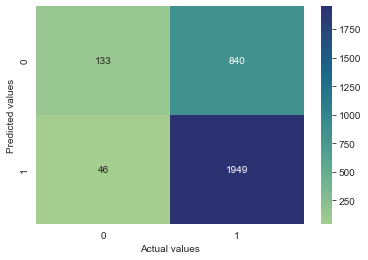

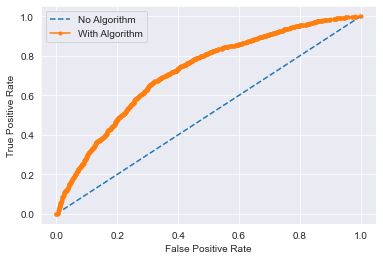

In [129]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
model1 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)
# lgbm = LGBMClassifier(**best_params, random_state=2, objective='binary')
# lgbm.fit(X_train, y_train)

evaluate_lgbm(model1)

# EC2

In [151]:
X = train_data.drop(['id', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC2']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)
cols_not = [i for i in X_train.columns if i not in high_value_cols]
scaler = StandardScaler()

train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


## LightGBM

In [152]:
def objective(trial):
    parameters = {
        'objective':'binary',
        'num_leaves':trial.suggest_int('num_leaves', 10, 75),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 500, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.0,3.0),
    }
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

    y_hat = model.predict(X_val)
#     y_hat_bin = (y_hat>=0.5).astype(int)
    score = roc_auc_score(y_val, y_hat)

    return score

In [153]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:25:14,512] A new study created in memory with name: no-name-112801d9-fb8c-4403-a37e-8136b9e6cb2b
[I 2023-07-05 16:25:14,655] Trial 0 finished with value: 0.5826251119237947 and parameters: {'num_leaves': 60, 'learning_rate': 0.0018826223451531197, 'max_depth': 3, 'min_data_in_leaf': 46, 'subsample': 0.9191522200447335, 'feature_fraction': 0.615136308100511, 'lambda_l1': 0.0011615554654893724, 'lambda_l2': 1.0398441959759751e-08, 'n_estimators ': 200, 'bagging_fraction ': 0.9381085995001767, 'bagging_freq': 3, 'class_weight': 1.775099129366766}. Best is trial 0 with value: 0.5826251119237947.


[LightGBM] [Warning] Unknown parameter: 0.0011615554654893724
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9381085995001767
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9191522200447335 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0011615554654893724
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.9381085995001767
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9191522200447335 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:14,948] Trial 1 finished with value: 0.5816520491493791 and parameters: {'num_leaves': 59, 'learning_rate': 0.009349769419424397, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.8198299543097539, 'feature_fraction': 0.872410999111833, 'lambda_l1': 0.0035973653930648883, 'lambda_l2': 3.084748649774647e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.5600902306015607, 'bagging_freq': 6, 'class_weight': 1.0294815305149319}. Best is trial 0 with value: 0.5826251119237947.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.601572587407202
[LightGBM] [Warning] Unknown parameter: 0.002741412084536542
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9576918422106929 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.601572587407202
[LightGBM] [Warning] Unknown paramete

[I 2023-07-05 16:25:15,165] Trial 2 finished with value: 0.5894268422926309 and parameters: {'num_leaves': 20, 'learning_rate': 0.005300637177824105, 'max_depth': 8, 'min_data_in_leaf': 51, 'subsample': 0.9576918422106929, 'feature_fraction': 0.9614615323427617, 'lambda_l1': 0.002741412084536542, 'lambda_l2': 9.258678632515555e-05, 'n_estimators ': 400, 'bagging_fraction ': 0.601572587407202, 'bagging_freq': 1, 'class_weight': 2.683329455877766}. Best is trial 2 with value: 0.5894268422926309.
[I 2023-07-05 16:25:15,356] Trial 3 finished with value: 0.5884206968222632 and parameters: {'num_leaves': 49, 'learning_rate': 0.006740658762416032, 'max_depth': 5, 'min_data_in_leaf': 81, 'subsample': 0.603930404305484, 'feature_fraction': 0.9189881967651294, 'lambda_l1': 0.00015756913582465372, 'lambda_l2': 1.7612243430409804e-08, 'n_estimators ': 200, 'bagging_fraction ': 0.7696701964246266, 'bagging_freq': 10, 'class_weight': 1.6615155732579765}. Best is trial 2 with value: 0.589426842292630

[LightGBM] [Warning] Unknown parameter: 0.7696701964246266
[LightGBM] [Warning] Unknown parameter: 0.00015756913582465372
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.603930404305484 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7696701964246266
[LightGBM] [Warning] Unknown parameter: 0.00015756913582465372
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.603930404305484 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: 0.885803073192399
[LightGBM] [Warning] Unknown parameter: 6.722802108489905e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8629547055579971 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.885803073192399
[LightGBM] [Warning] Unknown parameter: 6.722802108489905e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8629547055579971 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:15,623] Trial 4 finished with value: 0.5882703863123941 and parameters: {'num_leaves': 27, 'learning_rate': 0.0074702649205746815, 'max_depth': 5, 'min_data_in_leaf': 46, 'subsample': 0.8629547055579971, 'feature_fraction': 0.9238725736164045, 'lambda_l1': 6.722802108489905e-06, 'lambda_l2': 2.1597588293011736, 'n_estimators ': 300, 'bagging_fraction ': 0.885803073192399, 'bagging_freq': 9, 'class_weight': 1.2944766525529978}. Best is trial 2 with value: 0.5894268422926309.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 9.047033611822928e-06
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.5755096051331379
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8012091386158997 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estim

[I 2023-07-05 16:25:15,876] Trial 5 finished with value: 0.5891959826100089 and parameters: {'num_leaves': 36, 'learning_rate': 0.0017512394365156046, 'max_depth': 4, 'min_data_in_leaf': 66, 'subsample': 0.8012091386158997, 'feature_fraction': 0.8455050399321689, 'lambda_l1': 9.047033611822928e-06, 'lambda_l2': 4.711285373663615e-06, 'n_estimators ': 300, 'bagging_fraction ': 0.5755096051331379, 'bagging_freq': 8, 'class_weight': 2.139873036798947}. Best is trial 2 with value: 0.5894268422926309.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:25:16,053] Trial 6 finished with value: 0.5906678029853537 and parameters: {'num_leaves': 19, 'learning_rate': 0.0012422162913457795, 'max_depth': 4, 'min_data_in_leaf': 86, 'subsample': 0.6060915717398636, 'feature_fraction': 0.8156801723580974, 'lambda_l1': 3.445025978468208e-08, 'lambda_l2': 0.0004651575678640811, 'n_estimators ': 500, 'bagging_fraction ': 0.5573632739636667, 'bagging_freq': 3, 'class_weight': 1.7488527215542315}. Best is trial 6 with value: 0.5906678029853537.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:25:16,260] Trial 7 finished with value: 0.5882362248328785 and parameters: {'num_leaves': 18, 'learning_rate': 0.003744833391570508, 'max_depth': 6, 'min_data_in_leaf': 81, 'subsample': 0.7156234492944531, 'feature_fraction': 0.9882356228879343, 'lambda_l1': 6.635109467019452e-08, 'lambda_l2': 0.023386263004904023, 'n_estimators ': 400, 'bagging_fraction ': 0.9220943199956287, 'bagging_freq': 9, 'class_weight': 2.2960270975047075}. Best is trial 6 with value: 0.5906678029853537.
[I 2023-07-05 16:25:16,455] Trial 8 finished with value: 0.591518244028034 and parameters: {'num_leaves': 63, 'learning_rate': 0.007747685697952172, 'max_depth': 5, 'min_data_in_leaf': 31, 'subsample': 0.6730230355401112, 'feature_fraction': 0.8403986054100614, 'lambda_l1': 1.203427346449579e-05, 'lambda_l2': 0.9633923675118913, 'n_estimators ': 300, 'bagging_fraction ': 0.6169455562392985, 'bagging_freq': 1, 'class_weight': 2.13556828156836}. Best is trial 8 with value: 0.591518244028034.


[LightGBM] [Warning] Unknown parameter: 0.6169455562392985
[LightGBM] [Warning] Unknown parameter: 1.203427346449579e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6730230355401112 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6169455562392985
[LightGBM] [Warning] Unknown parameter: 1.203427346449579e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6730230355401112 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: 1.1907275152104792e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6216861480926821
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6150706349591906 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.1907275152104792e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6216861480926821
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6150706349591906 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:25:16,681] Trial 9 finished with value: 0.5927645986385751 and parameters: {'num_leaves': 32, 'learning_rate': 0.007488828686679601, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.6150706349591906, 'feature_fraction': 0.8406574706979022, 'lambda_l1': 1.1907275152104792e-07, 'lambda_l2': 0.00038630522088465034, 'n_estimators ': 100, 'bagging_fraction ': 0.6216861480926821, 'bagging_freq': 5, 'class_weight': 2.1307293947739394}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 1.0284840236391513
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7632667272053952
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5275490097943556 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0284840236391513
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7632667272053952
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5275490097943556 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:25:17,198] Trial 10 finished with value: 0.5925276258490926 and parameters: {'num_leaves': 74, 'learning_rate': 0.004169901299477461, 'max_depth': 10, 'min_data_in_leaf': 6, 'subsample': 0.5275490097943556, 'feature_fraction': 0.7192013509133253, 'lambda_l1': 1.0284840236391513, 'lambda_l2': 0.0047679666238652, 'n_estimators ': 100, 'bagging_fraction ': 0.7632667272053952, 'bagging_freq': 6, 'class_weight': 2.8988890803231424}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 4.017892906035241
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6884152285566301
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5212700855177165 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.017892906035241
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6884152285566301
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5212700855177165 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto

[I 2023-07-05 16:25:17,830] Trial 11 finished with value: 0.5915516863185073 and parameters: {'num_leaves': 75, 'learning_rate': 0.004541877449009686, 'max_depth': 10, 'min_data_in_leaf': 1, 'subsample': 0.5212700855177165, 'feature_fraction': 0.7267307807046302, 'lambda_l1': 4.017892906035241, 'lambda_l2': 0.004262660900944991, 'n_estimators ': 100, 'bagging_fraction ': 0.6884152285566301, 'bagging_freq': 6, 'class_weight': 2.89737746089668}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 0.834658289550829
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7485844535547371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5053498738889919 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.834658289550829
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7485844535547371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5053498738889919 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto

[I 2023-07-05 16:25:18,324] Trial 12 finished with value: 0.5870736557457811 and parameters: {'num_leaves': 40, 'learning_rate': 0.0028995711701303543, 'max_depth': 10, 'min_data_in_leaf': 6, 'subsample': 0.5053498738889919, 'feature_fraction': 0.7334920746430347, 'lambda_l1': 0.834658289550829, 'lambda_l2': 0.028307725762285095, 'n_estimators ': 100, 'bagging_fraction ': 0.7485844535547371, 'bagging_freq': 4, 'class_weight': 2.5118405552278564}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 0.19624951422293913
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5061701646456029
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5924054877356424 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.19624951422293913
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5061701646456029
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5924054877356424 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:25:18,610] Trial 13 finished with value: 0.5907476329690641 and parameters: {'num_leaves': 32, 'learning_rate': 0.005679048641983188, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.5924054877356424, 'feature_fraction': 0.6646873647179579, 'lambda_l1': 0.19624951422293913, 'lambda_l2': 8.011946696956336e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.5061701646456029, 'bagging_freq': 7, 'class_weight': 2.9279449909848934}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 0.09950926640295592
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6961311078484091
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6678945615436545 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.09950926640295592
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6961311078484091
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6678945615436545 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:25:19,029] Trial 14 finished with value: 0.5873440708257369 and parameters: {'num_leaves': 51, 'learning_rate': 0.00929176693711664, 'max_depth': 8, 'min_data_in_leaf': 21, 'subsample': 0.6678945615436545, 'feature_fraction': 0.5146859852246628, 'lambda_l1': 0.09950926640295592, 'lambda_l2': 0.0018937985888918144, 'n_estimators ': 200, 'bagging_fraction ': 0.6961311078484091, 'bagging_freq': 5, 'class_weight': 2.444235715440344}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: 0.04658782793322772
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8076152147886141
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5700474884086147 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.04658782793322772
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8076152147886141
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5700474884086147 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:25:19,575] Trial 15 finished with value: 0.5894124585117821 and parameters: {'num_leaves': 74, 'learning_rate': 0.0038428072650902698, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.5700474884086147, 'feature_fraction': 0.7825374781251269, 'lambda_l1': 0.04658782793322772, 'lambda_l2': 1.1664490807228032e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.8076152147886141, 'bagging_freq': 5, 'class_weight': 2.6926521491648248}. Best is trial 9 with value: 0.5927645986385751.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 3.3438173325030363
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6523924631183077
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5054562392438865 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 3.3438173325030363
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6523924631183077
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5054562392438865 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:25:20,014] Trial 16 finished with value: 0.593642368864868 and parameters: {'num_leaves': 47, 'learning_rate': 0.005393544784208034, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.5054562392438865, 'feature_fraction': 0.7676413290316153, 'lambda_l1': 3.3438173325030363, 'lambda_l2': 0.08478918378647908, 'n_estimators ': 200, 'bagging_fraction ': 0.6523924631183077, 'bagging_freq': 7, 'class_weight': 2.962648600589888}. Best is trial 16 with value: 0.593642368864868.
[I 2023-07-05 16:25:20,227] Trial 17 finished with value: 0.5939555756928487 and parameters: {'num_leaves': 11, 'learning_rate': 0.005934264165199988, 'max_depth': 8, 'min_data_in_leaf': 31, 'subsample': 0.6590753872731892, 'feature_fraction': 0.7811822617934353, 'lambda_l1': 3.218639422912176e-07, 'lambda_l2': 0.14509593258908607, 'n_estimators ': 200, 'bagging_fraction ': 0.66260182098784, 'bagging_freq': 7, 'class_weight': 1.9827416379486862}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 3.218639422912176e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.66260182098784
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6590753872731892 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.218639422912176e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.66260182098784
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6590753872731892 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:25:20,477] Trial 18 finished with value: 0.5903236710285482 and parameters: {'num_leaves': 10, 'learning_rate': 0.005857406704232283, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.7531120248696315, 'feature_fraction': 0.7805428028821502, 'lambda_l1': 0.028881212473132026, 'lambda_l2': 9.47135959792918, 'n_estimators ': 200, 'bagging_fraction ': 0.6718054583578354, 'bagging_freq': 8, 'class_weight': 1.956813461765983}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.028881212473132026
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6718054583578354
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7531120248696315 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.028881212473132026
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6718054583578354
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7531120248696315 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:20,810] Trial 19 finished with value: 0.5887982710695421 and parameters: {'num_leaves': 47, 'learning_rate': 0.0030851443011974964, 'max_depth': 7, 'min_data_in_leaf': 61, 'subsample': 0.6683187134707022, 'feature_fraction': 0.6763673057922447, 'lambda_l1': 8.13508677684788, 'lambda_l2': 0.15588926910264939, 'n_estimators ': 200, 'bagging_fraction ': 0.6629459801827123, 'bagging_freq': 7, 'class_weight': 2.415698912457968}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 5.364712557512859e-07
[LightGBM] [Warning] Unknown parameter: 0.9954069826953904
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5459229957290186 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.364712557512859e-07
[LightGBM] [Warning] Unknown pa

[I 2023-07-05 16:25:21,233] Trial 20 finished with value: 0.589366070818545 and parameters: {'num_leaves': 55, 'learning_rate': 0.004939936494637522, 'max_depth': 9, 'min_data_in_leaf': 96, 'subsample': 0.5459229957290186, 'feature_fraction': 0.7998803868923013, 'lambda_l1': 5.364712557512859e-07, 'lambda_l2': 0.19347708736467617, 'n_estimators ': 300, 'bagging_fraction ': 0.9954069826953904, 'bagging_freq': 7, 'class_weight': 2.6204003289719533}. Best is trial 17 with value: 0.5939555756928487.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.7425507065579013e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6267040122171144
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6243767489736773 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_esti

[I 2023-07-05 16:25:21,572] Trial 21 finished with value: 0.5930026502116214 and parameters: {'num_leaves': 29, 'learning_rate': 0.007356830347000482, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.6243767489736773, 'feature_fraction': 0.874039617969272, 'lambda_l1': 1.7425507065579013e-08, 'lambda_l2': 0.0504742049508284, 'n_estimators ': 200, 'bagging_fraction ': 0.6267040122171144, 'bagging_freq': 4, 'class_weight': 2.231385255617941}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:21,786] Trial 22 finished with value: 0.5919195515137131 and parameters: {'num_leaves': 10, 'learning_rate': 0.006307237932291357, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.569145847464115, 'feature_fraction': 0.8868211075293304, 'lambda_l1': 1.366542612269931e-08, 'lambda_l2': 0.06648542094562489, 'n_estimators ': 200, 'bagging_fraction ': 0.6383053939862138, 'bagging_freq': 4, 'class_weight': 2.3546951280123793}. Best is trial 17 with value: 0.5939555756928487

[LightGBM] [Warning] Unknown parameter: 1.366542612269931e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6383053939862138
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.569145847464115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.366542612269931e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6383053939862138
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.569145847464115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:22,153] Trial 23 finished with value: 0.5891956230154878 and parameters: {'num_leaves': 42, 'learning_rate': 0.00523626671151919, 'max_depth': 7, 'min_data_in_leaf': 16, 'subsample': 0.6456805273857484, 'feature_fraction': 0.7594209536937062, 'lambda_l1': 5.491020622717279e-07, 'lambda_l2': 0.5814302107169098, 'n_estimators ': 200, 'bagging_fraction ': 0.7127629006404274, 'bagging_freq': 3, 'class_weight': 1.9457195351687935}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 8.743366827373136e-05
[LightGBM] [Warning] Unknown parameter: 0.6488781114258201
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5493309317912674 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.743366827373136e-05
[LightGBM] [Warning] Unknown parameter: 0.6488781114258201
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5493309317912674 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:22,439] Trial 24 finished with value: 0.5920831670208673 and parameters: {'num_leaves': 25, 'learning_rate': 0.009614903567713924, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.5493309317912674, 'feature_fraction': 0.8073756277803136, 'lambda_l1': 8.743366827373136e-05, 'lambda_l2': 0.021421314074643684, 'n_estimators ': 200, 'bagging_fraction ': 0.6488781114258201, 'bagging_freq': 8, 'class_weight': 2.7647124462200816}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:22,697] Trial 25 finished with value: 0.5935700903661032 and parameters: {'num_leaves': 15, 'learning_rate': 0.006467928960494477, 'max_depth': 9, 'min_data_in_leaf': 41, 'subsample': 0.5016830249259995, 'feature_fraction': 0.8812995904975249, 'lambda_l1': 5.732472423249548e-07, 'lambda_l2': 0.20032764276834122, 'n_estimators ': 300, 'bagging_fraction ': 0.7235680349361697, 'bagging_freq': 4, 'class_weight': 2.5599446514037174}. Best is trial 17 with value: 0.5939555756928

[LightGBM] [Warning] Unknown parameter: 5.732472423249548e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7235680349361697
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5016830249259995 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.732472423249548e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7235680349361697
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5016830249259995 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:22,929] Trial 26 finished with value: 0.5901111506665084 and parameters: {'num_leaves': 15, 'learning_rate': 0.006292362256162445, 'max_depth': 9, 'min_data_in_leaf': 56, 'subsample': 0.5057999528640734, 'feature_fraction': 0.7563013822523956, 'lambda_l1': 4.1837939620527665e-05, 'lambda_l2': 5.560858753402187, 'n_estimators ': 300, 'bagging_fraction ': 0.721326258250017, 'bagging_freq': 2, 'class_weight': 2.9929689191663877}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.721326258250017
[LightGBM] [Warning] Unknown parameter: 4.1837939620527665e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5057999528640734 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.721326258250017
[LightGBM] [Warning] Unknown parameter: 4.1837939620527665e-05
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5057999528640734 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:23,213] Trial 27 finished with value: 0.5925186359860621 and parameters: {'num_leaves': 24, 'learning_rate': 0.004573779941923955, 'max_depth': 7, 'min_data_in_leaf': 41, 'subsample': 0.5661773047129031, 'feature_fraction': 0.908930990592854, 'lambda_l1': 1.45583187197266e-06, 'lambda_l2': 0.3702467993985253, 'n_estimators ': 400, 'bagging_fraction ': 0.6771123010283764, 'bagging_freq': 7, 'class_weight': 2.5638279745225505}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 1.45583187197266e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6771123010283764
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5661773047129031 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.45583187197266e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6771123010283764
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5661773047129031 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:23,466] Trial 28 finished with value: 0.5909576361694553 and parameters: {'num_leaves': 14, 'learning_rate': 0.003632826341339762, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.5395375194349245, 'feature_fraction': 0.8264412073008246, 'lambda_l1': 0.0007229871501455455, 'lambda_l2': 1.497958383079478, 'n_estimators ': 500, 'bagging_fraction ': 0.8094630589413525, 'bagging_freq': 9, 'class_weight': 2.568741765757939}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.0007229871501455455
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8094630589413525
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5395375194349245 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0007229871501455455
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8094630589413525
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5395375194349245 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:23,654] Trial 29 finished with value: 0.5776734953666246 and parameters: {'num_leaves': 37, 'learning_rate': 0.005290101853162196, 'max_depth': 2, 'min_data_in_leaf': 51, 'subsample': 0.5075704778016797, 'feature_fraction': 0.7803966277972004, 'lambda_l1': 0.0004426448570383209, 'lambda_l2': 0.2121161369646941, 'n_estimators ': 300, 'bagging_fraction ': 0.7226682380085659, 'bagging_freq': 6, 'class_weight': 2.4413818476004456}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.0004426448570383209
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7226682380085659
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5075704778016797 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0004426448570383209
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7226682380085659
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5075704778016797 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:24,073] Trial 30 finished with value: 0.5883103013042493 and parameters: {'num_leaves': 65, 'learning_rate': 0.002723109255821557, 'max_depth': 6, 'min_data_in_leaf': 66, 'subsample': 0.5818220721069816, 'feature_fraction': 0.7070708298484553, 'lambda_l1': 2.060632517247032e-07, 'lambda_l2': 2.6119002694833595, 'n_estimators ': 300, 'bagging_fraction ': 0.6650816289454557, 'bagging_freq': 2, 'class_weight': 2.791496430825017}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:25:24,426] Trial 31 finished with value: 0.5933658406780514 and parameters: {'num_leaves': 31, 'learning_rate': 0.008043901585166843, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.6439887938266213, 'feature_fraction': 0.8695011517013345, 'lambda_l1': 1.285913362432602e-08, 'lambda_l2': 0.06954749461563886, 'n_estimators ': 200, 'bagging_fraction ': 0.6363122330872386, 'bagging_freq': 4, 'class_weight': 2.262062391964812}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 5.763755854669987e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.592975175704298
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7115693831452921 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.763755854669987e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.592975175704298
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7115693831452921 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:24,836] Trial 32 finished with value: 0.5928214145729276 and parameters: {'num_leaves': 22, 'learning_rate': 0.008540367110935228, 'max_depth': 9, 'min_data_in_leaf': 41, 'subsample': 0.7115693831452921, 'feature_fraction': 0.8649393294063632, 'lambda_l1': 5.763755854669987e-08, 'lambda_l2': 0.645850034807836, 'n_estimators ': 200, 'bagging_fraction ': 0.592975175704298, 'bagging_freq': 4, 'class_weight': 2.2737026463869734}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 2.3927494353641706e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6471915174174693
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6311678400128529 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3927494353641706e-06
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6471915174174693
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6311678400128529 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:25:25,613] Trial 33 finished with value: 0.59217845956899 and parameters: {'num_leaves': 46, 'learning_rate': 0.008400972100115048, 'max_depth': 10, 'min_data_in_leaf': 26, 'subsample': 0.6311678400128529, 'feature_fraction': 0.9377061828038774, 'lambda_l1': 2.3927494353641706e-06, 'lambda_l2': 0.0962681325068494, 'n_estimators ': 400, 'bagging_fraction ': 0.6471915174174693, 'bagging_freq': 5, 'class_weight': 2.80715599591142}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:25,881] Trial 34 finished with value: 0.5906314839387108 and parameters: {'num_leaves': 15, 'learning_rate': 0.006558038877738676, 'max_depth': 9, 'min_data_in_leaf': 51, 'subsample': 0.5496180308177133, 'feature_fraction': 0.9553808813139747, 'lambda_l1': 1.3797095196122437e-08, 'lambda_l2': 0.015716704411869942, 'n_estimators ': 200, 'bagging_fraction ': 0.6979269715651024, 'bagging_freq': 3, 'class_weight': 2.6331303831873227}. Best is trial 17 with value: 0.593955575692848

[LightGBM] [Warning] Unknown parameter: 0.6979269715651024
[LightGBM] [Warning] Unknown parameter: 1.3797095196122437e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5496180308177133 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6979269715651024
[LightGBM] [Warning] Unknown parameter: 1.3797095196122437e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5496180308177133 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:25:26,476] Trial 35 finished with value: 0.587443318913593 and parameters: {'num_leaves': 53, 'learning_rate': 0.006959439437283954, 'max_depth': 10, 'min_data_in_leaf': 16, 'subsample': 0.5861885244533606, 'feature_fraction': 0.8636512221760165, 'lambda_l1': 0.007999138419617862, 'lambda_l2': 0.36548384504213105, 'n_estimators ': 200, 'bagging_fraction ': 0.6043651773806988, 'bagging_freq': 6, 'class_weight': 2.9995456963467326}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 1.9608290405738962e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6503155586620849
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5007515213913336 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 1.9608290405738962e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6503155586620849
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5007515213913336 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will 

[I 2023-07-05 16:25:26,861] Trial 36 finished with value: 0.5924290969502789 and parameters: {'num_leaves': 31, 'learning_rate': 0.009847876212630759, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.5007515213913336, 'feature_fraction': 0.895590150489662, 'lambda_l1': 1.9608290405738962e-07, 'lambda_l2': 0.10348582944735342, 'n_estimators ': 300, 'bagging_fraction ': 0.6503155586620849, 'bagging_freq': 10, 'class_weight': 1.866040134214499}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.00022246310683143283
[LightGBM] [Warning] Unknown parameter: 0.5770132702654345
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.606084847658942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.00022246310683143283
[LightGBM] [Warning] Unknown parameter: 0.5770132702654345
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.606084847658942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:27,229] Trial 37 finished with value: 0.5909015394241454 and parameters: {'num_leaves': 36, 'learning_rate': 0.005774799314851234, 'max_depth': 9, 'min_data_in_leaf': 46, 'subsample': 0.606084847658942, 'feature_fraction': 0.9024987359202097, 'lambda_l1': 0.00022246310683143283, 'lambda_l2': 2.1921421662025558, 'n_estimators ': 300, 'bagging_fraction ': 0.5770132702654345, 'bagging_freq': 2, 'class_weight': 2.0990438584856377}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 4.230399144284714e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7391065368942341
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6395765970504194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.230399144284714e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7391065368942341
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6395765970504194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:27,621] Trial 38 finished with value: 0.591274079348127 and parameters: {'num_leaves': 19, 'learning_rate': 0.008294784325264752, 'max_depth': 7, 'min_data_in_leaf': 26, 'subsample': 0.6395765970504194, 'feature_fraction': 0.8134673315594804, 'lambda_l1': 4.230399144284714e-08, 'lambda_l2': 0.014123337855363398, 'n_estimators ': 200, 'bagging_fraction ': 0.7391065368942341, 'bagging_freq': 4, 'class_weight': 2.698906135274777}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:27,875] Trial 39 finished with value: 0.5906174597523832 and parameters: {'num_leaves': 15, 'learning_rate': 0.006817758754821204, 'max_depth': 10, 'min_data_in_leaf': 56, 'subsample': 0.531846750462942, 'feature_fraction': 0.8498373002646173, 'lambda_l1': 2.107800160055011e-05, 'lambda_l2': 0.0548377664296889, 'n_estimators ': 400, 'bagging_fraction ': 0.6924191259741174, 'bagging_freq': 8, 'class_weight': 1.650650751145227}. Best is trial 17 with value: 0.5939555756928487.

[LightGBM] [Warning] Unknown parameter: 2.107800160055011e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6924191259741174
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.531846750462942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.107800160055011e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6924191259741174
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.531846750462942 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:28,390] Trial 40 finished with value: 0.5854249148659971 and parameters: {'num_leaves': 44, 'learning_rate': 0.0061285855494647105, 'max_depth': 8, 'min_data_in_leaf': 11, 'subsample': 0.5988537100736466, 'feature_fraction': 0.9391869836863279, 'lambda_l1': 0.003277700786128712, 'lambda_l2': 1.159775238409006, 'n_estimators ': 200, 'bagging_fraction ': 0.6263569765571394, 'bagging_freq': 3, 'class_weight': 2.348647319964064}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:28,684] Trial 41 finished with value: 0.5933162166341234 and parameters: {'num_leaves': 27, 'learning_rate': 0.007455269886198375, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.6301187587375265, 'feature_fraction': 0.8742187271707075, 'lambda_l1': 1.0562615838503676e-08, 'lambda_l2': 0.054119655735630955, 'n_estimators ': 200, 'bagging_fraction ': 0.6304317755289245, 'bagging_freq': 4, 'class_weight': 2.165800813323613}. Best is trial 17 with value: 0.593955575692848

[LightGBM] [Warning] Unknown parameter: 1.0562615838503676e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6304317755289245
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6301187587375265 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0562615838503676e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.6304317755289245
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6301187587375265 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:25:29,061] Trial 42 finished with value: 0.5931299466721325 and parameters: {'num_leaves': 28, 'learning_rate': 0.0076400652642817845, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.7010630656035378, 'feature_fraction': 0.8319684990644527, 'lambda_l1': 1.172080731192739e-08, 'lambda_l2': 0.1711468953678426, 'n_estimators ': 200, 'bagging_fraction ': 0.6110527500927825, 'bagging_freq': 5, 'class_weight': 2.2295375328831177}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 9.103020940925136e-08
[LightGBM] [Warning] Unknown parameter: 0.6697659036581038
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6168938998696334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 9.103020940925136e-08
[LightGBM] [Warning] Unknown parameter: 0.6697659036581038
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6168938998696334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:29,395] Trial 43 finished with value: 0.5908012125527256 and parameters: {'num_leaves': 21, 'learning_rate': 0.006960635647209789, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.6168938998696334, 'feature_fraction': 0.8864067506509774, 'lambda_l1': 9.103020940925136e-08, 'lambda_l2': 0.008180430405785198, 'n_estimators ': 100, 'bagging_fraction ': 0.6697659036581038, 'bagging_freq': 4, 'class_weight': 2.053351090863133}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 3.50459702296456e-08
[LightGBM] [Warning] Unknown parameter: 0.5491573682088174
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6529965363200355 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.50459702296456e-08
[LightGBM] [Warning] Unknown parameter: 0.5491573682088174
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6529965363200355 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:25:29,713] Trial 44 finished with value: 0.5924895088298434 and parameters: {'num_leaves': 35, 'learning_rate': 0.008469872084842756, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.6529965363200355, 'feature_fraction': 0.9217159842137481, 'lambda_l1': 3.50459702296456e-08, 'lambda_l2': 0.0019026769476001514, 'n_estimators ': 300, 'bagging_fraction ': 0.5491573682088174, 'bagging_freq': 7, 'class_weight': 2.205502122449414}. Best is trial 17 with value: 0.5939555756928487.
[I 2023-07-05 16:25:29,954] Trial 45 finished with value: 0.5909461291447764 and parameters: {'num_leaves': 12, 'learning_rate': 0.005587025334971266, 'max_depth': 10, 'min_data_in_leaf': 21, 'subsample': 0.6941286062141837, 'feature_fraction': 0.9904075025497413, 'lambda_l1': 6.507156587843963e-06, 'lambda_l2': 0.05012556294164219, 'n_estimators ': 100, 'bagging_fraction ': 0.6350799591780466, 'bagging_freq': 6, 'class_weight': 2.0218950452575233}. Best is trial 17 with value: 0.5939555756928

[LightGBM] [Warning] Unknown parameter: 6.507156587843963e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6350799591780466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6941286062141837 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.507156587843963e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.6350799591780466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6941286062141837 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:30,214] Trial 46 finished with value: 0.5917224937160858 and parameters: {'num_leaves': 18, 'learning_rate': 0.004949829272628191, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.734678054878832, 'feature_fraction': 0.847994878122052, 'lambda_l1': 1.0636964401135074e-07, 'lambda_l2': 0.5291801749471483, 'n_estimators ': 300, 'bagging_fraction ': 0.59902412741404, 'bagging_freq': 5, 'class_weight': 2.1620518666539907}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 1.0636964401135074e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.59902412741404
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.734678054878832 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0636964401135074e-07
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.59902412741404
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.734678054878832 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:25:30,481] Trial 47 finished with value: 0.5905358317960667 and parameters: {'num_leaves': 25, 'learning_rate': 0.007097611660159479, 'max_depth': 6, 'min_data_in_leaf': 41, 'subsample': 0.6827381698961514, 'feature_fraction': 0.8695735050708275, 'lambda_l1': 0.0015848188368457374, 'lambda_l2': 0.008914142750405026, 'n_estimators ': 100, 'bagging_fraction ': 0.5802898209642825, 'bagging_freq': 9, 'class_weight': 2.517048167928179}. Best is trial 17 with value: 0.5939555756928487.


[LightGBM] [Warning] Unknown parameter: 0.0015848188368457374
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5802898209642825
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6827381698961514 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0015848188368457374
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5802898209642825
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6827381698961514 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:25:30,835] Trial 48 finished with value: 0.5954198445832479 and parameters: {'num_leaves': 39, 'learning_rate': 0.006227028830888428, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.655755991860866, 'feature_fraction': 0.8216872417725498, 'lambda_l1': 2.862529316733801e-08, 'lambda_l2': 0.030603706906218907, 'n_estimators ': 200, 'bagging_fraction ': 0.680877149288875, 'bagging_freq': 4, 'class_weight': 2.097265819752266}. Best is trial 48 with value: 0.5954198445832479.
[I 2023-07-05 16:25:31,073] Trial 49 finished with value: 0.591097518438209 and parameters: {'num_leaves': 39, 'learning_rate': 0.006195398609195893, 'max_depth': 4, 'min_data_in_leaf': 21, 'subsample': 0.6651076247967264, 'feature_fraction': 0.8203607224151932, 'lambda_l1': 3.785395713256073e-07, 'lambda_l2': 0.025850890817774766, 'n_estimators ': 200, 'bagging_fraction ': 0.7090198704827819, 'bagging_freq': 3, 'class_weight': 2.0829482589281416}. Best is trial 48 with value: 0.595419844583247

[LightGBM] [Warning] Unknown parameter: 3.785395713256073e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7090198704827819
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6651076247967264 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.785395713256073e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7090198704827819
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6651076247967264 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

In [154]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'num_leaves': 39, 'learning_rate': 0.006227028830888428, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.655755991860866, 'feature_fraction': 0.8216872417725498, 'lambda_l1': 2.862529316733801e-08, 'lambda_l2': 0.030603706906218907, 'n_estimators ': 200, 'bagging_fraction ': 0.680877149288875, 'bagging_freq': 4, 'class_weight': 2.097265819752266}
The best score is:  0.5954198445832479


Past parameters:
- the best parameters are:  {'num_leaves': 30, 'learning_rate': 0.09786548967700766, 'max_depth': 4, 'min_data_in_leaf': 1, 'subsample': 0.5124095803194548, 'feature_fraction': 0.853953700500865, 'lambda_l1': 4.214458221798507e-08, 'lambda_l2': 7.479331373474433e-08, 'n_estimators ': 300, 'bagging_fraction ': 0.7924084423072477, 'bagging_freq': 7, 'class_weight': 2.4216495124985684}|The best score is:  0.5959822504144328

[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.680877149288875
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.655755991860866 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.680877149288875
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.655755991860866 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6241
[LightGBM] [Inf

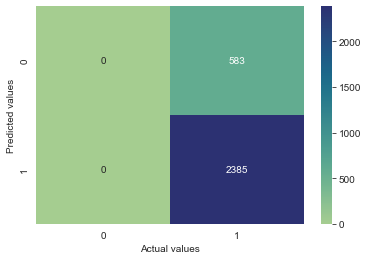

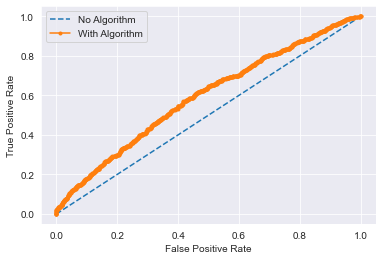

In [155]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
model2 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

evaluate_lgbm(model2)

## XGBoost

In [160]:
import xgboost as xgb

In [171]:
def objective(trial):
    # Define the search space for XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 2.5),  
    }

    # Train and evaluate the XGBoost model
    model = xgb.XGBClassifier(**params, random_state=5)
    model.fit(X_train, y_train)
    pos_probs = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, pos_probs)

    return score

In [172]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=75)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:35:50,830] A new study created in memory with name: no-name-b1089ca6-f328-49b9-a669-be0eedf2e289
[I 2023-07-05 16:35:52,650] Trial 0 finished with value: 0.5833421433991031 and parameters: {'max_depth': 10, 'learning_rate': 0.002022453786040902, 'subsample': 0.5732845882099673, 'colsample_bytree': 0.8497160019574542, 'lambda': 5.501099894234255e-05, 'alpha': 0.00023019814194361198, 'scale_pos_weight': 2.3193029604316706}. Best is trial 0 with value: 0.5833421433991031.
[I 2023-07-05 16:35:53,877] Trial 1 finished with value: 0.5898691435537288 and parameters: {'max_depth': 9, 'learning_rate': 0.0016524910826948456, 'subsample': 0.7939441472367768, 'colsample_bytree': 0.5560028493441742, 'lambda': 0.0002793818974188376, 'alpha': 0.0012216403275692733, 'scale_pos_weight': 1.122340727754433}. Best is trial 1 with value: 0.5898691435537288.
[I 2023-07-05 16:35:54,495] Trial 2 finished with value: 0.5832508063907138 and parameters: {'max_depth': 4, 'learning_rate': 0.003207

[I 2023-07-05 16:36:15,332] Trial 22 finished with value: 0.5988392288855088 and parameters: {'max_depth': 9, 'learning_rate': 0.001011958075939031, 'subsample': 0.5851516701668487, 'colsample_bytree': 0.6314593218425315, 'lambda': 1.5694634001169536e-05, 'alpha': 1.1234862322248062e-07, 'scale_pos_weight': 2.0632639671902515}. Best is trial 22 with value: 0.5988392288855088.
[I 2023-07-05 16:36:16,681] Trial 23 finished with value: 0.5948358630807902 and parameters: {'max_depth': 9, 'learning_rate': 0.001009323522176334, 'subsample': 0.5816683609859139, 'colsample_bytree': 0.609680245305213, 'lambda': 1.005980454812338e-08, 'alpha': 4.767146989076207e-08, 'scale_pos_weight': 1.789618879053206}. Best is trial 22 with value: 0.5988392288855088.
[I 2023-07-05 16:36:18,251] Trial 24 finished with value: 0.5969305011668843 and parameters: {'max_depth': 9, 'learning_rate': 0.0010753055910071732, 'subsample': 0.594271476462312, 'colsample_bytree': 0.5999486713288357, 'lambda': 2.063660199130

[I 2023-07-05 16:36:45,856] Trial 44 finished with value: 0.5929526665731721 and parameters: {'max_depth': 10, 'learning_rate': 0.0013129795095316976, 'subsample': 0.5699234179506002, 'colsample_bytree': 0.6260109349747881, 'lambda': 2.1349188806511416e-08, 'alpha': 3.1919759037156414e-08, 'scale_pos_weight': 2.4781808497990134}. Best is trial 29 with value: 0.5995325271224168.
[I 2023-07-05 16:36:47,140] Trial 45 finished with value: 0.5866975198765871 and parameters: {'max_depth': 8, 'learning_rate': 0.001559539623563403, 'subsample': 0.6375385849753298, 'colsample_bytree': 0.7141378848194221, 'lambda': 9.86023738943164e-07, 'alpha': 1.1274276464212386e-07, 'scale_pos_weight': 2.0105845872253094}. Best is trial 29 with value: 0.5995325271224168.
[I 2023-07-05 16:36:48,476] Trial 46 finished with value: 0.5903517194012031 and parameters: {'max_depth': 9, 'learning_rate': 0.0019450015581645042, 'subsample': 0.5350252974894072, 'colsample_bytree': 0.5878334802018523, 'lambda': 8.1075950

[I 2023-07-05 16:37:13,763] Trial 66 finished with value: 0.6011007188294479 and parameters: {'max_depth': 10, 'learning_rate': 0.0015589162302276926, 'subsample': 0.6066375539465089, 'colsample_bytree': 0.5020255163188336, 'lambda': 1.209523902639541e-07, 'alpha': 5.556837029687459e-08, 'scale_pos_weight': 2.222780751193342}. Best is trial 65 with value: 0.6025193192156524.
[I 2023-07-05 16:37:15,322] Trial 67 finished with value: 0.5926624737945493 and parameters: {'max_depth': 10, 'learning_rate': 0.0018080077266133632, 'subsample': 0.5527323169734398, 'colsample_bytree': 0.5015393954022987, 'lambda': 7.457236952332408e-07, 'alpha': 3.623351327785535e-08, 'scale_pos_weight': 2.1330494157269744}. Best is trial 65 with value: 0.6025193192156524.
[I 2023-07-05 16:37:16,809] Trial 68 finished with value: 0.5953180793337433 and parameters: {'max_depth': 10, 'learning_rate': 0.0015926284903189324, 'subsample': 0.6050130511913016, 'colsample_bytree': 0.5356188149111363, 'lambda': 1.3127537

In [173]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'max_depth': 10, 'learning_rate': 0.001519335187028576, 'subsample': 0.6066911369160539, 'colsample_bytree': 0.5027994488907361, 'lambda': 5.6621538761724025e-08, 'alpha': 7.92155619322075e-08, 'scale_pos_weight': 2.228380485572755}
The best score is:  0.6025193192156524


Past parameters:
- the best parameters are:  {'max_depth': 10, 'learning_rate': 0.001519335187028576, 'subsample': 0.6066911369160539, 'colsample_bytree': 0.5027994488907361, 'lambda': 5.6621538761724025e-08, 'alpha': 7.92155619322075e-08, 'scale_pos_weight': 2.228380485572755}|The best score is:  0.6025193192156524

Train Accuracy score is: 0.7988205560235889
Test Accuracy score is: 0.8035714285714286
ROCAUC score is: 0.6025193192156524
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       583
           1       0.80      1.00      0.89      2385

    accuracy                           0.80      2968
   macro avg       0.40      0.50      0.45      2968
weighted avg       0.65      0.80      0.72      2968



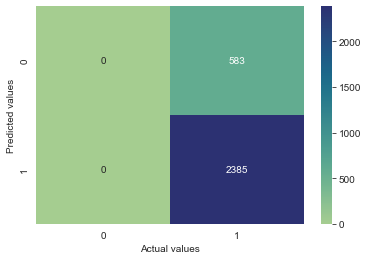

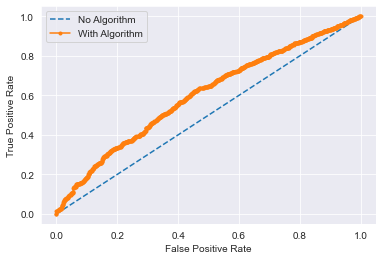

In [174]:
xgb_clf = xgb.XGBClassifier(**best_params, random_state=5)
xgb_clf.fit(X_train, y_train)

evaluate_model(xgb_clf)

In [175]:
y_hat_ec1 = (model1.predict(X_val)>=0.5).astype(int)
y_hat_ec2 = (model2.predict(X_val)>=0.5).astype(int)

y_hat = pd.DataFrame(zip(y_hat_ec1, y_hat_ec2)).values

y_true = np.array(train_data.iloc[y_val.index,:][['EC1', 'EC2']])

accuracy_score(y_true, y_hat)

0.5481805929919138

# Using EC1 to predict EC2

Based on my previous lgbm2 model, the model failed to predict any 0 (false) value class (0%). So, I am going to try using EC1 to also contribute to predicting EC2.

In [176]:
X = train_data.drop(['id','EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC2']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)
cols_not = [i for i in X_train.columns if i not in high_value_cols]
scaler = StandardScaler()

train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)

X_train

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,0.000000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,12.152040,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0,1
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,0.000000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,0.000000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,-0.679346,-0.552008,-0.539291,5.163902,3.722225,3.722225,2.229188,2.229188,1.749075,0.933119,...,0.000000,0.000000,0.000000,7.822697,25.235636,9.088795,35.166667,0,0,0
13896,-0.756094,-0.777881,-0.793221,3.553418,2.189533,2.189533,1.477829,1.477829,0.711731,0.182919,...,0.000000,12.132734,0.000000,5.969305,0.000000,0.000000,23.166667,1,1,1
6637,-0.945332,-1.035367,-1.023724,1.732051,1.341641,1.341641,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.027704,0.000000,8.180556,0,0,1
2575,-0.586183,-0.777975,-0.774255,3.931852,2.786883,2.786883,1.927161,1.927161,0.962617,0.350229,...,18.199101,0.000000,0.000000,0.000000,0.000000,0.000000,23.333333,0,0,1


## LightGBM

In [177]:
def objective(trial):
    parameters = {
        'objective':'binary',
        'num_leaves':trial.suggest_int('num_leaves', 10, 70),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'max_depth':trial.suggest_int('max_depth', 2, 10),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100, step=5),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'feature_fraction':trial.suggest_uniform('feature_fraction', 0.5, 1),
        'lambda_l1 ':trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'n_estimators ':trial.suggest_int('n_estimators ', 100, 1000, step=100),
        'bagging_fraction ':trial.suggest_uniform('bagging_fraction ', 0.5,1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'class_weight': trial.suggest_uniform('class_weight', 1.0,2.5),
    }
    train = lgb.Dataset(X_train, label=y_train)
    val = lgb.Dataset(X_val, label=y_val)
    
    model = lgb.train(parameters, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

    y_hat = model.predict(X_val)
#     y_hat_bin = (y_hat>=0.5).astype(int)
    score = roc_auc_score(y_val, y_hat)

    return score

In [178]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:39:03,582] A new study created in memory with name: no-name-8b902793-6c22-452e-bb6a-17d0d0891359


[LightGBM] [Warning] Unknown parameter: 5.761762731094583e-06
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5100112215201874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6360042556414442 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.761762731094583e-06
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5100112215201874
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6360042556414442 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:03,808] Trial 0 finished with value: 0.627133564193016 and parameters: {'num_leaves': 67, 'learning_rate': 0.0036527737868794056, 'max_depth': 5, 'min_data_in_leaf': 26, 'subsample': 0.6360042556414442, 'feature_fraction': 0.645737345256419, 'lambda_l1': 5.761762731094583e-06, 'lambda_l2': 3.5014081902353772e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.5100112215201874, 'bagging_freq': 9, 'class_weight': 2.3712229905218347}. Best is trial 0 with value: 0.627133564193016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.5098400346305876
[LightGBM] [Warning] Unknown parameter: 0.028587411156779777
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8253181971494234 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.5098400346305876
[LightGBM] [Warning] Unknown parameter: 0.028587411156779777
[LightGBM] [Warning] Unknown parameter: 600
[Ligh

[I 2023-07-05 16:39:04,060] Trial 1 finished with value: 0.6274474902100391 and parameters: {'num_leaves': 43, 'learning_rate': 0.00744488655449367, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.8253181971494234, 'feature_fraction': 0.6649956714406746, 'lambda_l1': 0.028587411156779777, 'lambda_l2': 1.0874127383566291e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.5098400346305876, 'bagging_freq': 9, 'class_weight': 1.3077362845439349}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 0.31085311654271747
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5560906342043437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6824561331753762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.31085311654271747
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.5560906342043437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6824561331753762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:04,413] Trial 2 finished with value: 0.6272874706480972 and parameters: {'num_leaves': 29, 'learning_rate': 0.0018193350499283634, 'max_depth': 8, 'min_data_in_leaf': 66, 'subsample': 0.6824561331753762, 'feature_fraction': 0.8120008176705604, 'lambda_l1': 0.31085311654271747, 'lambda_l2': 1.881374656054195e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.5560906342043437, 'bagging_freq': 2, 'class_weight': 1.068613244079016}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 2.705161804265538e-06
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7610108722456137
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8394777553677664 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.705161804265538e-06
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.7610108722456137
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8394777553677664 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:04,724] Trial 3 finished with value: 0.6243848236728265 and parameters: {'num_leaves': 47, 'learning_rate': 0.0011613915854217006, 'max_depth': 8, 'min_data_in_leaf': 96, 'subsample': 0.8394777553677664, 'feature_fraction': 0.830324307603854, 'lambda_l1': 2.705161804265538e-06, 'lambda_l2': 0.00015209296244552618, 'n_estimators ': 800, 'bagging_fraction ': 0.7610108722456137, 'bagging_freq': 8, 'class_weight': 2.198469801453742}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00012993022991611745
[LightGBM] [Warning] Unknown parameter: 0.9029551715581596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5973839173559379 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.00012993022991611745
[LightGBM] [Warning] Unknown parameter: 0.9029551715581596
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.5973839173559379 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100,

[I 2023-07-05 16:39:05,008] Trial 4 finished with value: 0.6270695563682391 and parameters: {'num_leaves': 45, 'learning_rate': 0.0027349380742270157, 'max_depth': 8, 'min_data_in_leaf': 56, 'subsample': 0.5973839173559379, 'feature_fraction': 0.6995934582875972, 'lambda_l1': 0.00012993022991611745, 'lambda_l2': 0.010812262599668493, 'n_estimators ': 800, 'bagging_fraction ': 0.9029551715581596, 'bagging_freq': 9, 'class_weight': 1.6901390179919222}. Best is trial 1 with value: 0.6274474902100391.
[I 2023-07-05 16:39:05,168] Trial 5 finished with value: 0.6233434379393796 and parameters: {'num_leaves': 62, 'learning_rate': 0.006885541075851593, 'max_depth': 4, 'min_data_in_leaf': 36, 'subsample': 0.8212135848453175, 'feature_fraction': 0.9811524226611772, 'lambda_l1': 0.013473205105126168, 'lambda_l2': 6.014145456838767e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.888783320321042, 'bagging_freq': 9, 'class_weight': 1.5776297229089722}. Best is trial 1 with value: 0.627447490210039

[LightGBM] [Warning] Unknown parameter: 0.888783320321042
[LightGBM] [Warning] Unknown parameter: 0.013473205105126168
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8212135848453175 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.888783320321042
[LightGBM] [Warning] Unknown parameter: 0.013473205105126168
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8212135848453175 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:05,318] Trial 6 finished with value: 0.6158606355473568 and parameters: {'num_leaves': 26, 'learning_rate': 0.003061909793509351, 'max_depth': 2, 'min_data_in_leaf': 26, 'subsample': 0.959212610839339, 'feature_fraction': 0.612116211905954, 'lambda_l1': 3.4989431823025066, 'lambda_l2': 0.14434769388515306, 'n_estimators ': 600, 'bagging_fraction ': 0.8326382933072528, 'bagging_freq': 2, 'class_weight': 2.387889310065106}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 3.4989431823025066
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.8326382933072528
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.959212610839339 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6243
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 3.4989431823025066
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning

[I 2023-07-05 16:39:05,466] Trial 7 finished with value: 0.6252870463265621 and parameters: {'num_leaves': 12, 'learning_rate': 0.00322027962477268, 'max_depth': 4, 'min_data_in_leaf': 61, 'subsample': 0.8805263951150097, 'feature_fraction': 0.8028144124723013, 'lambda_l1': 6.821124473916414e-07, 'lambda_l2': 0.0018564295469757513, 'n_estimators ': 500, 'bagging_fraction ': 0.9494142741811509, 'bagging_freq': 8, 'class_weight': 1.4378600490137727}. Best is trial 1 with value: 0.6274474902100391.
[I 2023-07-05 16:39:05,644] Trial 8 finished with value: 0.6237846604169139 and parameters: {'num_leaves': 18, 'learning_rate': 0.005005825654591341, 'max_depth': 9, 'min_data_in_leaf': 61, 'subsample': 0.7485001724896883, 'feature_fraction': 0.6297651679613523, 'lambda_l1': 3.06513562245248e-05, 'lambda_l2': 0.0010242484463847549, 'n_estimators ': 100, 'bagging_fraction ': 0.9578853085778231, 'bagging_freq': 1, 'class_weight': 2.3253169385358436}. Best is trial 1 with value: 0.6274474902100391

[LightGBM] [Warning] Unknown parameter: 3.06513562245248e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9578853085778231
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7485001724896883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.06513562245248e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.9578853085778231
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7485001724896883 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:05,787] Trial 9 finished with value: 0.6155168631850725 and parameters: {'num_leaves': 30, 'learning_rate': 0.0018192722498594192, 'max_depth': 3, 'min_data_in_leaf': 11, 'subsample': 0.7447798595872899, 'feature_fraction': 0.6777741815994743, 'lambda_l1': 0.007722005318112481, 'lambda_l2': 1.0807274904189092e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.5809751939921883, 'bagging_freq': 2, 'class_weight': 1.430210527215352}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5809751939921883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7447798595872899 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6243
[LightGBM] [Info] Number of data points in the train set: 11870, number of used features: 32
[LightGBM] [Warning] Unknown parameter: 0.007722005318112481
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.5809751939921883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] baggin

[I 2023-07-05 16:39:06,183] Trial 10 finished with value: 0.623070146103254 and parameters: {'num_leaves': 57, 'learning_rate': 0.00900911473037337, 'max_depth': 10, 'min_data_in_leaf': 91, 'subsample': 0.5380990816955453, 'feature_fraction': 0.5061858092735848, 'lambda_l1': 8.830998240287995e-08, 'lambda_l2': 1.722379493613729e-08, 'n_estimators ': 500, 'bagging_fraction ': 0.6332087914853473, 'bagging_freq': 5, 'class_weight': 1.0180291004957274}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.6599356729483437
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5008678758821318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6917809504383756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6599356729483437
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.5008678758821318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6917809504383756 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Inf

[I 2023-07-05 16:39:06,752] Trial 11 finished with value: 0.6254463466994618 and parameters: {'num_leaves': 33, 'learning_rate': 0.009787669401194946, 'max_depth': 7, 'min_data_in_leaf': 76, 'subsample': 0.6917809504383756, 'feature_fraction': 0.7702741092915903, 'lambda_l1': 0.6599356729483437, 'lambda_l2': 2.7819909223083972e-08, 'n_estimators ': 1000, 'bagging_fraction ': 0.5008678758821318, 'bagging_freq': 5, 'class_weight': 1.045657465119113}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0744214458040927
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6327466852745405
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.6952962419344687 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0744214458040927
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.6327466852745405
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fr

[I 2023-07-05 16:39:07,271] Trial 12 finished with value: 0.6242992401767767 and parameters: {'num_leaves': 39, 'learning_rate': 0.0054672797400449015, 'max_depth': 6, 'min_data_in_leaf': 76, 'subsample': 0.6952962419344687, 'feature_fraction': 0.8477358034962719, 'lambda_l1': 0.0744214458040927, 'lambda_l2': 4.342920846937023e-07, 'n_estimators ': 700, 'bagging_fraction ': 0.6327466852745405, 'bagging_freq': 4, 'class_weight': 1.2052107038774438}. Best is trial 1 with value: 0.6274474902100391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: 0.0017849554976649363
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.586913608703466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7951519861058781 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0017849554976649363
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.586913608703466
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7951519861058781 will be ignored. Current v

[I 2023-07-05 16:39:07,813] Trial 13 finished with value: 0.628269163691022 and parameters: {'num_leaves': 52, 'learning_rate': 0.0018262268415589241, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.7951519861058781, 'feature_fraction': 0.8887214635607243, 'lambda_l1': 0.0017849554976649363, 'lambda_l2': 3.707504073165085e-07, 'n_estimators ': 400, 'bagging_fraction ': 0.586913608703466, 'bagging_freq': 7, 'class_weight': 1.2484125625965041}. Best is trial 13 with value: 0.628269163691022.


[LightGBM] [Warning] Unknown parameter: 0.001006992743792125
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6774258603595443
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7882035540020981 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.001006992743792125
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6774258603595443
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.7882035540020981 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:08,236] Trial 14 finished with value: 0.6281878953292267 and parameters: {'num_leaves': 52, 'learning_rate': 0.006728642312796103, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.7882035540020981, 'feature_fraction': 0.9108871647575871, 'lambda_l1': 0.001006992743792125, 'lambda_l2': 1.5825144329893897e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.6774258603595443, 'bagging_freq': 7, 'class_weight': 1.3489428781197332}. Best is trial 13 with value: 0.628269163691022.


[LightGBM] [Warning] Unknown parameter: 0.0008676771277592927
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6845433134550305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9997822120045396 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0008676771277592927
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.6845433134550305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9997822120045396 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:08,608] Trial 15 finished with value: 0.6284910335106135 and parameters: {'num_leaves': 51, 'learning_rate': 0.004472706003066478, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9997822120045396, 'feature_fraction': 0.9368746996857462, 'lambda_l1': 0.0008676771277592927, 'lambda_l2': 2.9106374239086364e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.6845433134550305, 'bagging_freq': 7, 'class_weight': 1.866226427697262}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 0.0007985465042664815
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7031201993387249
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944575816342115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0007985465042664815
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7031201993387249
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944575816342115 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:09,092] Trial 16 finished with value: 0.628048013060473 and parameters: {'num_leaves': 55, 'learning_rate': 0.004033087587283102, 'max_depth': 10, 'min_data_in_leaf': 1, 'subsample': 0.9944575816342115, 'feature_fraction': 0.9971410619678709, 'lambda_l1': 0.0007985465042664815, 'lambda_l2': 2.8149798269827313e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.7031201993387249, 'bagging_freq': 7, 'class_weight': 1.926091377735657}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 0.0014683620499799572
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7759256450772167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090434887014119 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.0014683620499799572
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7759256450772167
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090434887014119 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:09,497] Trial 17 finished with value: 0.6266714852332509 and parameters: {'num_leaves': 68, 'learning_rate': 0.0021840147188477133, 'max_depth': 9, 'min_data_in_leaf': 41, 'subsample': 0.9090434887014119, 'feature_fraction': 0.9028335554961032, 'lambda_l1': 0.0014683620499799572, 'lambda_l2': 2.100095426377389e-06, 'n_estimators ': 400, 'bagging_fraction ': 0.7759256450772167, 'bagging_freq': 6, 'class_weight': 1.86874615029524}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] Unknown parameter: 7.369633334146806e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7026371273812856
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.925689669013247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.369633334146806e-05
[LightGBM] [Warning] Unknown parameter: 400
[LightGBM] [Warning] Unknown parameter: 0.7026371273812856
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.925689669013247 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:09,832] Trial 18 finished with value: 0.6148638395345408 and parameters: {'num_leaves': 50, 'learning_rate': 0.001056214472884355, 'max_depth': 6, 'min_data_in_leaf': 26, 'subsample': 0.925689669013247, 'feature_fraction': 0.9200364832807137, 'lambda_l1': 7.369633334146806e-05, 'lambda_l2': 7.995494734960717, 'n_estimators ': 400, 'bagging_fraction ': 0.7026371273812856, 'bagging_freq': 4, 'class_weight': 1.5744955816055317}. Best is trial 15 with value: 0.6284910335106135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-05 16:39:10,166] Trial 19 finished with value: 0.629682010564887 and parameters: {'num_leaves': 38, 'learning_rate': 0.004568685175819091, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.8740678248984955, 'feature_fraction': 0.8767623433235306, 'lambda_l1': 0.0022323125867329974, 'lambda_l2': 1.1859816080116056e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.605151351388924, 'bagging_freq': 10, 'class_weight': 2.0412225610363897}. Best is trial 19 with value: 0.629682010564887.


[LightGBM] [Warning] Unknown parameter: 0.7436435446831803
[LightGBM] [Warning] Unknown parameter: 1.4628220269586929e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9777212934623309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7436435446831803
[LightGBM] [Warning] Unknown parameter: 1.4628220269586929e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9777212934623309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:10,483] Trial 20 finished with value: 0.6307043377887095 and parameters: {'num_leaves': 36, 'learning_rate': 0.004638896047001705, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9777212934623309, 'feature_fraction': 0.9506784521418206, 'lambda_l1': 1.4628220269586929e-08, 'lambda_l2': 1.526371279673488e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7436435446831803, 'bagging_freq': 10, 'class_weight': 2.0544972333479348}. Best is trial 20 with value: 0.6307043377887095.


[LightGBM] [Warning] Unknown parameter: 2.1263164965103102e-08
[LightGBM] [Warning] Unknown parameter: 0.7401113467076136
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9852772356084678 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.1263164965103102e-08
[LightGBM] [Warning] Unknown parameter: 0.7401113467076136
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9852772356084678 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:10,809] Trial 21 finished with value: 0.631322480770683 and parameters: {'num_leaves': 38, 'learning_rate': 0.004680019053333568, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9852772356084678, 'feature_fraction': 0.9468415482969073, 'lambda_l1': 2.1263164965103102e-08, 'lambda_l2': 1.1426166690870412e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7401113467076136, 'bagging_freq': 10, 'class_weight': 2.059733785703482}. Best is trial 21 with value: 0.631322480770683.


[LightGBM] [Warning] Unknown parameter: 0.7937775677643354
[LightGBM] [Warning] Unknown parameter: 1.9903373027570353e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9425609727235996 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7937775677643354
[LightGBM] [Warning] Unknown parameter: 1.9903373027570353e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9425609727235996 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:11,242] Trial 22 finished with value: 0.6316044028753178 and parameters: {'num_leaves': 38, 'learning_rate': 0.00502875810407211, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9425609727235996, 'feature_fraction': 0.9626269792704852, 'lambda_l1': 1.9903373027570353e-08, 'lambda_l2': 2.044135280105889e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7937775677643354, 'bagging_freq': 10, 'class_weight': 2.0788316979275585}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:11,522] Trial 23 finished with value: 0.6274776961498214 and parameters: {'num_leaves': 22, 'learning_rate': 0.005720517543786006, 'max_depth': 7, 'min_data_in_leaf': 1, 'subsample': 0.9489073479561974, 'feature_fraction': 0.9587375483259909, 'lambda_l1': 2.3337953041056926e-08, 'lambda_l2': 8.381819057538749e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7969594787172876, 'bagging_freq': 10, 'class_weight': 2.1404354377931196}. Best is trial 22 with value: 0.63160440

[LightGBM] [Warning] Unknown parameter: 2.3337953041056926e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7969594787172876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9489073479561974 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.3337953041056926e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.7969594787172876
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9489073479561974 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:11,860] Trial 24 finished with value: 0.6284137206885516 and parameters: {'num_leaves': 35, 'learning_rate': 0.005666113394758949, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.9631977931212785, 'feature_fraction': 0.9612336313236467, 'lambda_l1': 1.798362029000704e-08, 'lambda_l2': 2.2592480109552954e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7325069297999014, 'bagging_freq': 10, 'class_weight': 2.0481228370802413}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.8062597152149767
[LightGBM] [Warning] Unknown parameter: 1.2059963939022524e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9094930220265558 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8062597152149767
[LightGBM] [Warning] Unknown parameter: 1.2059963939022524e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9094930220265558 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:12,232] Trial 25 finished with value: 0.6254603708857892 and parameters: {'num_leaves': 42, 'learning_rate': 0.003977124081544909, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.9094930220265558, 'feature_fraction': 0.9912693542183582, 'lambda_l1': 1.2059963939022524e-07, 'lambda_l2': 0.00028371794426972167, 'n_estimators ': 200, 'bagging_fraction ': 0.8062597152149767, 'bagging_freq': 10, 'class_weight': 2.2291807152048704}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.0077970436499032e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7420777815092833
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9980902374453833 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.0077970436499032e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7420777815092833
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9980902374453833 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:12,622] Trial 26 finished with value: 0.628168477225081 and parameters: {'num_leaves': 35, 'learning_rate': 0.004949834681289588, 'max_depth': 9, 'min_data_in_leaf': 6, 'subsample': 0.9980902374453833, 'feature_fraction': 0.9430993027188056, 'lambda_l1': 1.0077970436499032e-08, 'lambda_l2': 2.187547612204324e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.7420777815092833, 'bagging_freq': 8, 'class_weight': 2.457689636576777}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:12,901] Trial 27 finished with value: 0.6285388595819354 and parameters: {'num_leaves': 25, 'learning_rate': 0.006018483808506779, 'max_depth': 7, 'min_data_in_leaf': 21, 'subsample': 0.9417612459130413, 'feature_fraction': 0.8767399309582405, 'lambda_l1': 3.573904029587916e-07, 'lambda_l2': 0.0002985419874394132, 'n_estimators ': 100, 'bagging_fraction ': 0.8305466291325487, 'bagging_freq': 10, 'class_weight': 2.0632659967528775}. Best is trial 22 with value: 0.63160440287

[LightGBM] [Warning] Unknown parameter: 3.573904029587916e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8305466291325487
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9417612459130413 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.573904029587916e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8305466291325487
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9417612459130413 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:13,268] Trial 28 finished with value: 0.6272820767302789 and parameters: {'num_leaves': 39, 'learning_rate': 0.0043008324411965854, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.8826238971252268, 'feature_fraction': 0.9408501653827324, 'lambda_l1': 6.04957206297886e-08, 'lambda_l2': 6.44393659926873e-06, 'n_estimators ': 300, 'bagging_fraction ': 0.7351131299477753, 'bagging_freq': 9, 'class_weight': 1.9680524845726972}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:13,552] Trial 29 finished with value: 0.6267365718415914 and parameters: {'num_leaves': 31, 'learning_rate': 0.003766570966036787, 'max_depth': 5, 'min_data_in_leaf': 31, 'subsample': 0.9486804413044706, 'feature_fraction': 0.8597659152386157, 'lambda_l1': 2.9135956073886625e-06, 'lambda_l2': 9.556695688615265e-07, 'n_estimators ': 100, 'bagging_fraction ': 0.7783324380489035, 'bagging_freq': 8, 'class_weight': 1.790286723040661}. Best is trial 22 with value: 0.631604402875

[LightGBM] [Warning] Unknown parameter: 2.9135956073886625e-06
[LightGBM] [Warning] Unknown parameter: 0.7783324380489035
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9486804413044706 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 2.9135956073886625e-06
[LightGBM] [Warning] Unknown parameter: 0.7783324380489035
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9486804413044706 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will 

[LightGBM] [Warning] Unknown parameter: 3.3628833279147387e-07
[LightGBM] [Warning] Unknown parameter: 0.8317951051336712
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.979963919642199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.3628833279147387e-07
[LightGBM] [Warning] Unknown parameter: 0.8317951051336712
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.979963919642199 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:13,862] Trial 30 finished with value: 0.6282346426169849 and parameters: {'num_leaves': 20, 'learning_rate': 0.003500665419246067, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.979963919642199, 'feature_fraction': 0.909440116897546, 'lambda_l1': 3.3628833279147387e-07, 'lambda_l2': 5.099477783030825e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.8317951051336712, 'bagging_freq': 9, 'class_weight': 2.2906848236514064}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 4.43018853950174e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6544168175473958
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.88360799744347 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.43018853950174e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.6544168175473958
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.88360799744347 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:39:14,218] Trial 31 finished with value: 0.6284248681187093 and parameters: {'num_leaves': 38, 'learning_rate': 0.004783851071634667, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.88360799744347, 'feature_fraction': 0.9682005853011281, 'lambda_l1': 4.43018853950174e-08, 'lambda_l2': 9.198825596956489e-06, 'n_estimators ': 300, 'bagging_fraction ': 0.6544168175473958, 'bagging_freq': 10, 'class_weight': 2.0815043698246427}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.200110393465418e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7278050850261885
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9224176206864478 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.200110393465418e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: 0.7278050850261885
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9224176206864478 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:14,622] Trial 32 finished with value: 0.6293616118464819 and parameters: {'num_leaves': 46, 'learning_rate': 0.004468733483606733, 'max_depth': 8, 'min_data_in_leaf': 11, 'subsample': 0.9224176206864478, 'feature_fraction': 0.8784039658247973, 'lambda_l1': 1.200110393465418e-08, 'lambda_l2': 7.231530772462864e-05, 'n_estimators ': 300, 'bagging_fraction ': 0.7278050850261885, 'bagging_freq': 10, 'class_weight': 2.0034978744339935}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.1764260930516392e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5449040682484545
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9619865276702515 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.1764260930516392e-05
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.5449040682484545
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9619865276702515 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:14,995] Trial 33 finished with value: 0.6283666138062721 and parameters: {'num_leaves': 36, 'learning_rate': 0.006411741912280574, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.9619865276702515, 'feature_fraction': 0.9249766730874988, 'lambda_l1': 1.1764260930516392e-05, 'lambda_l2': 1.8354620535487458e-06, 'n_estimators ': 100, 'bagging_fraction ': 0.5449040682484545, 'bagging_freq': 9, 'class_weight': 2.1509868828655523}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.013668257842016e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7573728600147197
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8593347512138345 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.013668257842016e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.7573728600147197
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8593347512138345 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:15,398] Trial 34 finished with value: 0.6247149314433045 and parameters: {'num_leaves': 41, 'learning_rate': 0.00517838473171918, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.8593347512138345, 'feature_fraction': 0.9682069862101063, 'lambda_l1': 1.013668257842016e-06, 'lambda_l2': 1.8441323147643297e-07, 'n_estimators ': 200, 'bagging_fraction ': 0.7573728600147197, 'bagging_freq': 10, 'class_weight': 2.122657613340886}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.26675661436752e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.711358853969851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9192214833763682 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.26675661436752e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.711358853969851
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9192214833763682 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:15,788] Trial 35 finished with value: 0.6258559248591289 and parameters: {'num_leaves': 44, 'learning_rate': 0.0037252598386813096, 'max_depth': 8, 'min_data_in_leaf': 16, 'subsample': 0.9192214833763682, 'feature_fraction': 0.8487758415245542, 'lambda_l1': 1.26675661436752e-07, 'lambda_l2': 2.5743924836897966e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.711358853969851, 'bagging_freq': 8, 'class_weight': 2.222528513996929}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.6598921963933709
[LightGBM] [Warning] Unknown parameter: 3.204436548437455e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9612063406871034 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.6598921963933709
[LightGBM] [Warning] Unknown parameter: 3.204436548437455e-08
[LightGBM] [Warning] Unknown parameter: 300
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9612063406871034 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,184] Trial 36 finished with value: 0.6224074134006494 and parameters: {'num_leaves': 26, 'learning_rate': 0.007039745024906731, 'max_depth': 10, 'min_data_in_leaf': 1, 'subsample': 0.9612063406871034, 'feature_fraction': 0.995894091033978, 'lambda_l1': 3.204436548437455e-08, 'lambda_l2': 8.202292998343858e-08, 'n_estimators ': 300, 'bagging_fraction ': 0.6598921963933709, 'bagging_freq': 9, 'class_weight': 2.0106827158427993}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 5.496528209743497e-06
[LightGBM] [Warning] Unknown parameter: 0.7551630833427057
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9782788892056294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.496528209743497e-06
[LightGBM] [Warning] Unknown parameter: 0.7551630833427057
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9782788892056294 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,510] Trial 37 finished with value: 0.626237454646141 and parameters: {'num_leaves': 33, 'learning_rate': 0.007981217908287791, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9782788892056294, 'feature_fraction': 0.8868435256923161, 'lambda_l1': 5.496528209743497e-06, 'lambda_l2': 0.00010011269640230489, 'n_estimators ': 200, 'bagging_fraction ': 0.7551630833427057, 'bagging_freq': 9, 'class_weight': 1.9188364750960358}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 2.0165459463504355e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.868256437654318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8460678884873497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.0165459463504355e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.868256437654318
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8460678884873497 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:16,879] Trial 38 finished with value: 0.6270271242147355 and parameters: {'num_leaves': 47, 'learning_rate': 0.006035749907023148, 'max_depth': 8, 'min_data_in_leaf': 31, 'subsample': 0.8460678884873497, 'feature_fraction': 0.9413946515208214, 'lambda_l1': 2.0165459463504355e-07, 'lambda_l2': 5.583160813968723e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.868256437654318, 'bagging_freq': 10, 'class_weight': 2.202463009505569}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 7.380601769071549e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8053570795270543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8915071797072258 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.380601769071549e-07
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.8053570795270543
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8915071797072258 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:17,182] Trial 39 finished with value: 0.6298636057981021 and parameters: {'num_leaves': 29, 'learning_rate': 0.004422491295834124, 'max_depth': 7, 'min_data_in_leaf': 11, 'subsample': 0.8915071797072258, 'feature_fraction': 0.8013495992328914, 'lambda_l1': 7.380601769071549e-07, 'lambda_l2': 4.534065290370392e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.8053570795270543, 'bagging_freq': 8, 'class_weight': 2.0851990286179984}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:17,466] Trial 40 finished with value: 0.626552819041249 and parameters: {'num_leaves': 29, 'learning_rate': 0.00330950960173113, 'max_depth': 5, 'min_data_in_leaf': 6, 'subsample': 0.8968889460887737, 'feature_fraction': 0.8068481172070938, 'lambda_l1': 4.880317400001569e-08, 'lambda_l2': 0.0009298082710592983, 'n_estimators ': 100, 'bagging_fraction ': 0.794275798025803, 'bagging_freq': 8, 'class_weight': 2.290717200589955}. Best is trial 22 with value: 0.631604402875317

[LightGBM] [Warning] Unknown parameter: 4.880317400001569e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.794275798025803
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8968889460887737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.880317400001569e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: 0.794275798025803
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8968889460887737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:17,859] Trial 41 finished with value: 0.6263280724654878 and parameters: {'num_leaves': 42, 'learning_rate': 0.004652488117995699, 'max_depth': 7, 'min_data_in_leaf': 16, 'subsample': 0.9351061707990977, 'feature_fraction': 0.8282755847773351, 'lambda_l1': 1.000061733159742e-08, 'lambda_l2': 4.186585063809334e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.7709070860819377, 'bagging_freq': 9, 'class_weight': 2.0919530496659062}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 9.411385704155503e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.86688300550677
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.862062648394849 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 9.411385704155503e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.86688300550677
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.862062648394849 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Au

[I 2023-07-05 16:39:18,232] Trial 42 finished with value: 0.631177204584111 and parameters: {'num_leaves': 37, 'learning_rate': 0.00519510957808111, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.862062648394849, 'feature_fraction': 0.9095417502396479, 'lambda_l1': 9.411385704155503e-07, 'lambda_l2': 1.7512257489928347e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.86688300550677, 'bagging_freq': 10, 'class_weight': 2.004262255902615}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 5.891138465742594e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8491993477911193
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9052978819444876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.891138465742594e-07
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8491993477911193
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9052978819444876 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:18,612] Trial 43 finished with value: 0.626793747370465 and parameters: {'num_leaves': 28, 'learning_rate': 0.005048354720332387, 'max_depth': 8, 'min_data_in_leaf': 6, 'subsample': 0.9052978819444876, 'feature_fraction': 0.9639363938486556, 'lambda_l1': 5.891138465742594e-07, 'lambda_l2': 0.00021598751910475165, 'n_estimators ': 200, 'bagging_fraction ': 0.8491993477911193, 'bagging_freq': 9, 'class_weight': 2.1519644181939013}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.8898610236854004
[LightGBM] [Warning] Unknown parameter: 1.4133417974341478e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8585108935015472 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.8898610236854004
[LightGBM] [Warning] Unknown parameter: 1.4133417974341478e-06
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8585108935015472 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:18,905] Trial 44 finished with value: 0.626145038854188 and parameters: {'num_leaves': 16, 'learning_rate': 0.005383541802898967, 'max_depth': 6, 'min_data_in_leaf': 11, 'subsample': 0.8585108935015472, 'feature_fraction': 0.7703838708413338, 'lambda_l1': 1.4133417974341478e-06, 'lambda_l2': 0.00012243829684286392, 'n_estimators ': 100, 'bagging_fraction ': 0.8898610236854004, 'bagging_freq': 9, 'class_weight': 1.9726376367578304}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 1.8409538727796793e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9219842656935437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9286500760643376 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.8409538727796793e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9219842656935437
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9286500760643376 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:19,294] Trial 45 finished with value: 0.6297906081102949 and parameters: {'num_leaves': 33, 'learning_rate': 0.0041266283581285115, 'max_depth': 10, 'min_data_in_leaf': 26, 'subsample': 0.9286500760643376, 'feature_fraction': 0.9217506120273914, 'lambda_l1': 1.8409538727796793e-07, 'lambda_l2': 1.2350335905460033e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9219842656935437, 'bagging_freq': 8, 'class_weight': 1.8610305708996708}. Best is trial 22 with value: 0.6316044028753178.
[I 2023-07-05 16:39:19,478] Trial 46 finished with value: 0.60931853242284 and parameters: {'num_leaves': 32, 'learning_rate': 0.002990889781354213, 'max_depth': 2, 'min_data_in_leaf': 1, 'subsample': 0.9733888949002036, 'feature_fraction': 0.9787237371512598, 'lambda_l1': 6.697879220016067e-08, 'lambda_l2': 3.889378162410436e-06, 'n_estimators ': 200, 'bagging_fraction ': 0.8162495702559093, 'bagging_freq': 6, 'class_weight': 1.9794303505137196}. Best is trial 22 with value: 0.631604402

[LightGBM] [Warning] Unknown parameter: 6.697879220016067e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8162495702559093
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9733888949002036 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.697879220016067e-08
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: 0.8162495702559093
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9733888949002036 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:19,728] Trial 47 finished with value: 0.6262014951940191 and parameters: {'num_leaves': 23, 'learning_rate': 0.006068952790785775, 'max_depth': 4, 'min_data_in_leaf': 51, 'subsample': 0.8358093035502773, 'feature_fraction': 0.9049160159922218, 'lambda_l1': 3.104040840303671e-08, 'lambda_l2': 5.301255933743003e-05, 'n_estimators ': 100, 'bagging_fraction ': 0.85904668042466, 'bagging_freq': 10, 'class_weight': 1.7772544633293927}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 3.104040840303671e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8358093035502773 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.85904668042466
[LightGBM] [Warning] Unknown parameter: 3.104040840303671e-08
[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8358093035502773 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of t

[LightGBM] [Warning] Unknown parameter: 2.64967694781373e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7893016532528808
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9422615180893313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.64967694781373e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.7893016532528808
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9422615180893313 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:20,099] Trial 48 finished with value: 0.6262877978791115 and parameters: {'num_leaves': 36, 'learning_rate': 0.007547316305121856, 'max_depth': 9, 'min_data_in_leaf': 11, 'subsample': 0.9422615180893313, 'feature_fraction': 0.9998706793508959, 'lambda_l1': 2.64967694781373e-07, 'lambda_l2': 1.0442729031220373e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.7893016532528808, 'bagging_freq': 10, 'class_weight': 2.06005985212132}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 8.340560134749353e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8157795084921494
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8179683248417998 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.340560134749353e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.8157795084921494
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8179683248417998 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:20,526] Trial 49 finished with value: 0.6277028023201039 and parameters: {'num_leaves': 61, 'learning_rate': 0.005404077044518291, 'max_depth': 10, 'min_data_in_leaf': 21, 'subsample': 0.8179683248417998, 'feature_fraction': 0.9404258728688147, 'lambda_l1': 8.340560134749353e-08, 'lambda_l2': 0.000782439146859968, 'n_estimators ': 500, 'bagging_fraction ': 0.8157795084921494, 'bagging_freq': 3, 'class_weight': 2.373519840551191}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 0.7713874481255982
[LightGBM] [Warning] Unknown parameter: 1.6490211918128936e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9866693479513835 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.7713874481255982
[LightGBM] [Warning] Unknown parameter: 1.6490211918128936e-06
[LightGBM] [Warning] Unknown parameter: 200
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9866693479513835 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:20,879] Trial 50 finished with value: 0.6287269275165324 and parameters: {'num_leaves': 44, 'learning_rate': 0.0041070303541509015, 'max_depth': 8, 'min_data_in_leaf': 71, 'subsample': 0.9866693479513835, 'feature_fraction': 0.8291768109671525, 'lambda_l1': 1.6490211918128936e-06, 'lambda_l2': 1.5161998901806175e-05, 'n_estimators ': 200, 'bagging_fraction ': 0.7713874481255982, 'bagging_freq': 9, 'class_weight': 2.184411859129171}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 3.488660531610282e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9183091892038502
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9255050678482304 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.488660531610282e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9183091892038502
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9255050678482304 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:21,212] Trial 51 finished with value: 0.6307313073778008 and parameters: {'num_leaves': 29, 'learning_rate': 0.004181290746992364, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.9255050678482304, 'feature_fraction': 0.9221548439925624, 'lambda_l1': 3.488660531610282e-07, 'lambda_l2': 1.3015124940326637e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9183091892038502, 'bagging_freq': 8, 'class_weight': 1.8544023463809507}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 6.082663903828785e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.92504610799489
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8983285803621672 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 6.082663903828785e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.92504610799489
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8983285803621672 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:21,584] Trial 52 finished with value: 0.6300656979190264 and parameters: {'num_leaves': 27, 'learning_rate': 0.0049168807928408505, 'max_depth': 10, 'min_data_in_leaf': 31, 'subsample': 0.8983285803621672, 'feature_fraction': 0.8980152309078843, 'lambda_l1': 6.082663903828785e-07, 'lambda_l2': 4.075923796553782e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.92504610799489, 'bagging_freq': 6, 'class_weight': 1.9179869156465232}. Best is trial 22 with value: 0.6316044028753178.


[LightGBM] [Warning] Unknown parameter: 2.841104003963438e-08
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9849161817432136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9681682798174622 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.841104003963438e-08
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9849161817432136
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9681682798174622 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:21,937] Trial 53 finished with value: 0.6319283975389351 and parameters: {'num_leaves': 25, 'learning_rate': 0.004885850910778597, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9681682798174622, 'feature_fraction': 0.9008181678552182, 'lambda_l1': 2.841104003963438e-08, 'lambda_l2': 2.848055565211517e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9849161817432136, 'bagging_freq': 7, 'class_weight': 1.9097797727469497}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.4922314997390815e-08
[LightGBM] [Warning] Unknown parameter: 0.9954572384031204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9706635724878309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.4922314997390815e-08
[LightGBM] [Warning] Unknown parameter: 0.9954572384031204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9706635724878309 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:22,248] Trial 54 finished with value: 0.6300063648230256 and parameters: {'num_leaves': 24, 'learning_rate': 0.0036478927813475732, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.9706635724878309, 'feature_fraction': 0.9241027018028846, 'lambda_l1': 2.4922314997390815e-08, 'lambda_l2': 3.472847679468174e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9954572384031204, 'bagging_freq': 7, 'class_weight': 1.7049926671481992}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:22,528] Trial 55 finished with value: 0.6305310132294824 and parameters: {'num_leaves': 17, 'learning_rate': 0.005451980517911334, 'max_depth': 10, 'min_data_in_leaf': 36, 'subsample': 0.9464574834113517, 'feature_fraction': 0.9521836993857982, 'lambda_l1': 2.073450592628232e-08, 'lambda_l2': 5.878468625134107e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9630150029513651, 'bagging_freq': 7, 'class_weight': 1.8342293514954564}. Best is trial 53 with value: 0.631928

[LightGBM] [Warning] Unknown parameter: 2.073450592628232e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9630150029513651
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9464574834113517 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.073450592628232e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9630150029513651
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9464574834113517 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:22,907] Trial 56 finished with value: 0.6276423904405393 and parameters: {'num_leaves': 37, 'learning_rate': 0.004774579733217177, 'max_depth': 9, 'min_data_in_leaf': 51, 'subsample': 0.9782039055749329, 'feature_fraction': 0.9752770947123773, 'lambda_l1': 1.186101030926622e-07, 'lambda_l2': 2.9356859657401542e-06, 'n_estimators ': 600, 'bagging_fraction ': 0.8760112349557073, 'bagging_freq': 5, 'class_weight': 1.9345552806578903}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:23,158] Trial 57 finished with value: 0.620554782427335 and parameters: {'num_leaves': 10, 'learning_rate': 0.003970703133365932, 'max_depth': 10, 'min_data_in_leaf': 46, 'subsample': 0.9994459522456194, 'feature_fraction': 0.9262706402009426, 'lambda_l1': 4.59389509409079e-08, 'lambda_l2': 1.0027405961080472e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9060601608995071, 'bagging_freq': 10, 'class_weight': 2.0217931253555887}. Best is trial 53 with value: 0.63192839

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.59389509409079e-08
[LightGBM] [Warning] Unknown parameter: 0.9060601608995071
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9994459522456194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.59389509409079e-08
[LightGBM] [Warning] Unknown parameter: 0.9060601608995071
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9994459522456194 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:23,573] Trial 58 finished with value: 0.6290225142129735 and parameters: {'num_leaves': 40, 'learning_rate': 0.006485900927528769, 'max_depth': 9, 'min_data_in_leaf': 31, 'subsample': 0.9579013665029428, 'feature_fraction': 0.9512244610288342, 'lambda_l1': 1.7154585200573852e-08, 'lambda_l2': 1.7201672316366163e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.8798190167174198, 'bagging_freq': 9, 'class_weight': 1.8150872161471756}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.23642833161507e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.844955666096626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270711568670292 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 1.23642833161507e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.844955666096626
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9270711568670292 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ign

[I 2023-07-05 16:39:24,006] Trial 59 finished with value: 0.6246048955198118 and parameters: {'num_leaves': 31, 'learning_rate': 0.0042699728602780705, 'max_depth': 10, 'min_data_in_leaf': 86, 'subsample': 0.9270711568670292, 'feature_fraction': 0.8980647024197028, 'lambda_l1': 1.23642833161507e-07, 'lambda_l2': 1.8069466280280018e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.844955666096626, 'bagging_freq': 1, 'class_weight': 1.8604489132152346}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.7854449297537744e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9479982437374505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090257718221999 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.7854449297537744e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9479982437374505
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9090257718221999 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:24,360] Trial 60 finished with value: 0.625918853900342 and parameters: {'num_leaves': 21, 'learning_rate': 0.0052047938333573815, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.9090257718221999, 'feature_fraction': 0.9844311062521532, 'lambda_l1': 2.7854449297537744e-07, 'lambda_l2': 5.615475085733327e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9479982437374505, 'bagging_freq': 7, 'class_weight': 1.9081996524513665}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:24,635] Trial 61 finished with value: 0.6273694581989349 and parameters: {'num_leaves': 16, 'learning_rate': 0.004634533120288894, 'max_depth': 10, 'min_data_in_leaf': 41, 'subsample': 0.9457115586792729, 'feature_fraction': 0.9562832598242509, 'lambda_l1': 1.988303091580068e-08, 'lambda_l2': 7.148753762056075e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9850781097446568, 'bagging_freq': 7, 'class_weight': 1.8275122799523635}. Best is trial 53 with value: 0.63192839

[LightGBM] [Warning] Unknown parameter: 1.988303091580068e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9850781097446568
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9457115586792729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.988303091580068e-08
[LightGBM] [Warning] Unknown parameter: 600
[LightGBM] [Warning] Unknown parameter: 0.9850781097446568
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9457115586792729 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:25,034] Trial 62 finished with value: 0.6288096342564125 and parameters: {'num_leaves': 49, 'learning_rate': 0.005622615379480439, 'max_depth': 10, 'min_data_in_leaf': 21, 'subsample': 0.9536378353963898, 'feature_fraction': 0.9532033704200809, 'lambda_l1': 4.0305919122981634e-08, 'lambda_l2': 6.268396339960387e-07, 'n_estimators ': 600, 'bagging_fraction ': 0.9600474459948141, 'bagging_freq': 6, 'class_weight': 1.9639372089229716}. Best is trial 53 with value: 0.6319283975389351.
[I 2023-07-05 16:39:25,326] Trial 63 finished with value: 0.6245088837826467 and parameters: {'num_leaves': 15, 'learning_rate': 0.005775910981890288, 'max_depth': 10, 'min_data_in_leaf': 56, 'subsample': 0.9809396980852334, 'feature_fraction': 0.9805122443444958, 'lambda_l1': 1.0717949276422941e-08, 'lambda_l2': 3.866587569462659e-07, 'n_estimators ': 800, 'bagging_fraction ': 0.9721087587683795, 'bagging_freq': 8, 'class_weight': 1.7352509182085285}. Best is trial 53 with value: 0.631928

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0717949276422941e-08
[LightGBM] [Warning] Unknown parameter: 0.9721087587683795
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9809396980852334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0717949276422941e-08
[LightGBM] [Warning] Unknown parameter: 0.9721087587683795
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9809396980852334 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:25,592] Trial 64 finished with value: 0.6304558579745478 and parameters: {'num_leaves': 19, 'learning_rate': 0.0051417151724570806, 'max_depth': 9, 'min_data_in_leaf': 36, 'subsample': 0.9290033891343737, 'feature_fraction': 0.9329252628413728, 'lambda_l1': 8.986574269978284e-08, 'lambda_l2': 1.4142683499269867e-06, 'n_estimators ': 500, 'bagging_fraction ': 0.932738413313001, 'bagging_freq': 5, 'class_weight': 1.6497638168685924}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.986574269978284e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.932738413313001
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9290033891343737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.986574269978284e-08
[LightGBM] [Warning] Unknown parameter: 500
[LightGBM] [Warning] Unknown parameter: 0.932738413313001
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9290033891343737 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:25,940] Trial 65 finished with value: 0.631781323379757 and parameters: {'num_leaves': 34, 'learning_rate': 0.004348760293191523, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9658279596724264, 'feature_fraction': 0.9172225877340059, 'lambda_l1': 2.648902844203799e-08, 'lambda_l2': 7.822118579006507e-06, 'n_estimators ': 600, 'bagging_fraction ': 0.973335559746615, 'bagging_freq': 7, 'class_weight': 2.026371940504775}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 0.981499859372657
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 3.800337976961895e-08
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.998640514742306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.981499859372657
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 3.800337976961895e-08
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.998640514742306 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning] 

[I 2023-07-05 16:39:26,268] Trial 66 finished with value: 0.6310362435317936 and parameters: {'num_leaves': 34, 'learning_rate': 0.003925199666091728, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.998640514742306, 'feature_fraction': 0.8702560838400503, 'lambda_l1': 3.800337976961895e-08, 'lambda_l2': 8.262420610050197e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.981499859372657, 'bagging_freq': 6, 'class_weight': 2.0290098038773707}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.182596054599355e-08
[LightGBM] [Warning] Unknown parameter: 0.9761303241533985
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9991304245582504 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.182596054599355e-08
[LightGBM] [Warning] Unknown parameter: 0.9761303241533985
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9991304245582504 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:26,582] Trial 67 finished with value: 0.6315047951929404 and parameters: {'num_leaves': 33, 'learning_rate': 0.0038800993159990175, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9991304245582504, 'feature_fraction': 0.8636175394356076, 'lambda_l1': 6.182596054599355e-08, 'lambda_l2': 2.7212973131195308e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9761303241533985, 'bagging_freq': 6, 'class_weight': 2.0344905177144126}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.37828422848302e-08
[LightGBM] [Warning] Unknown parameter: 0.9781039332699824
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9962038485612221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 6.37828422848302e-08
[LightGBM] [Warning] Unknown parameter: 0.9781039332699824
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9962038485612221 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:26,920] Trial 68 finished with value: 0.6308582442437907 and parameters: {'num_leaves': 33, 'learning_rate': 0.003841130900323832, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9962038485612221, 'feature_fraction': 0.866533914905068, 'lambda_l1': 6.37828422848302e-08, 'lambda_l2': 7.954530610413113e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9781039332699824, 'bagging_freq': 5, 'class_weight': 2.0226980499848217}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 4.366456276475494e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9966780920864362
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9669250941796648 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.366456276475494e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9966780920864362
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9669250941796648 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:27,253] Trial 69 finished with value: 0.6301768126260829 and parameters: {'num_leaves': 34, 'learning_rate': 0.0034570363311678554, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.9669250941796648, 'feature_fraction': 0.8643174974594204, 'lambda_l1': 4.366456276475494e-08, 'lambda_l2': 0.00012384408020211558, 'n_estimators ': 1000, 'bagging_fraction ': 0.9966780920864362, 'bagging_freq': 6, 'class_weight': 2.1175952210495246}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.5795020548826268e-07
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9510171361442683
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.988743442758271 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.5795020548826268e-07
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9510171361442683
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.988743442758271 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:27,734] Trial 70 finished with value: 0.6295263061371997 and parameters: {'num_leaves': 39, 'learning_rate': 0.0043692011459348, 'max_depth': 9, 'min_data_in_leaf': 16, 'subsample': 0.988743442758271, 'feature_fraction': 0.8890976049627062, 'lambda_l1': 1.5795020548826268e-07, 'lambda_l2': 2.8525607312192437e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9510171361442683, 'bagging_freq': 4, 'class_weight': 2.0103048824660403}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.641684937288648e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.976089285311081
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944535495435488 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.641684937288648e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.976089285311081
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9944535495435488 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:28,109] Trial 71 finished with value: 0.6312635072692032 and parameters: {'num_leaves': 34, 'learning_rate': 0.003927667064271418, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9944535495435488, 'feature_fraction': 0.8657439661191633, 'lambda_l1': 8.641684937288648e-08, 'lambda_l2': 7.494206308199106e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.976089285311081, 'bagging_freq': 5, 'class_weight': 2.047462416556975}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.2400149358841078e-08
[LightGBM] [Warning] Unknown parameter: 0.9396602576115904
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9870969665761603 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.2400149358841078e-08
[LightGBM] [Warning] Unknown parameter: 0.9396602576115904
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9870969665761603 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:28,458] Trial 72 finished with value: 0.6312128044417116 and parameters: {'num_leaves': 37, 'learning_rate': 0.003931443351305951, 'max_depth': 9, 'min_data_in_leaf': 26, 'subsample': 0.9870969665761603, 'feature_fraction': 0.9115410439840486, 'lambda_l1': 2.2400149358841078e-08, 'lambda_l2': 3.648987235361373e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9396602576115904, 'bagging_freq': 5, 'class_weight': 2.094612430469737}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.4271017119446014e-08
[LightGBM] [Warning] Unknown parameter: 0.93967773949379
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654501581091365 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.4271017119446014e-08
[LightGBM] [Warning] Unknown parameter: 0.93967773949379
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654501581091365 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:28,807] Trial 73 finished with value: 0.631431437910612 and parameters: {'num_leaves': 37, 'learning_rate': 0.0036025204813351463, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9654501581091365, 'feature_fraction': 0.9144334048597879, 'lambda_l1': 2.4271017119446014e-08, 'lambda_l2': 2.67708090628373e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.93967773949379, 'bagging_freq': 4, 'class_weight': 2.0956821420222673}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.2326946124730182e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9460448439003315
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9642231997519085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.2326946124730182e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9460448439003315
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9642231997519085 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:29,164] Trial 74 finished with value: 0.6299366034859093 and parameters: {'num_leaves': 41, 'learning_rate': 0.0031464395956862273, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.9642231997519085, 'feature_fraction': 0.8843004344097761, 'lambda_l1': 2.2326946124730182e-08, 'lambda_l2': 2.5883778921070492e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9460448439003315, 'bagging_freq': 4, 'class_weight': 2.0944520358201486}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.500821743026597e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9670809623552883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.983902030110583 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.500821743026597e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9670809623552883
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.983902030110583 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:29,564] Trial 75 finished with value: 0.6305223829609732 and parameters: {'num_leaves': 43, 'learning_rate': 0.003600170465471043, 'max_depth': 8, 'min_data_in_leaf': 26, 'subsample': 0.983902030110583, 'feature_fraction': 0.9112471966954854, 'lambda_l1': 1.500821743026597e-08, 'lambda_l2': 4.324466919175657e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9670809623552883, 'bagging_freq': 5, 'class_weight': 2.1655703320361024}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 7.484754428224274e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9962154065263523
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9573880427094217 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 7.484754428224274e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9962154065263523
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9573880427094217 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will 

[I 2023-07-05 16:39:29,973] Trial 76 finished with value: 0.6281512166880625 and parameters: {'num_leaves': 31, 'learning_rate': 0.0033797605253699453, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.9573880427094217, 'feature_fraction': 0.8874296365613971, 'lambda_l1': 7.484754428224274e-08, 'lambda_l2': 6.337427585357465e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.9962154065263523, 'bagging_freq': 3, 'class_weight': 2.1232201694867214}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 2.6616197443880527e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9373639803577308
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9723507504406298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.6616197443880527e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9373639803577308
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9723507504406298 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:30,411] Trial 77 finished with value: 0.6289786436813849 and parameters: {'num_leaves': 39, 'learning_rate': 0.003776373936109449, 'max_depth': 8, 'min_data_in_leaf': 21, 'subsample': 0.9723507504406298, 'feature_fraction': 0.8456260476331691, 'lambda_l1': 2.6616197443880527e-08, 'lambda_l2': 1.2717533999098534e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9373639803577308, 'bagging_freq': 3, 'class_weight': 2.0571869385739032}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 0.9582805020633851
[LightGBM] [Warning] Unknown parameter: 1.8711099293400008e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9383417736832568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9582805020633851
[LightGBM] [Warning] Unknown parameter: 1.8711099293400008e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9383417736832568 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:30,787] Trial 78 finished with value: 0.6317827617578419 and parameters: {'num_leaves': 35, 'learning_rate': 0.004476853579279726, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9383417736832568, 'feature_fraction': 0.936070395304059, 'lambda_l1': 1.8711099293400008e-07, 'lambda_l2': 2.402798492884111e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9582805020633851, 'bagging_freq': 4, 'class_weight': 2.250022198829456}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 8.194265626784675e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9589882170360278
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369069121229616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 8.194265626784675e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9589882170360278
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369069121229616 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:31,117] Trial 79 finished with value: 0.6318237555332606 and parameters: {'num_leaves': 26, 'learning_rate': 0.004437799930213437, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9369069121229616, 'feature_fraction': 0.9357917761154968, 'lambda_l1': 8.194265626784675e-08, 'lambda_l2': 1.955023337783153e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9589882170360278, 'bagging_freq': 4, 'class_weight': 2.2394472281754867}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 1.7796365677076344e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.9694667564937
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9410257258520445 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.7796365677076344e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 0.9694667564937
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9410257258520445 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:31,507] Trial 80 finished with value: 0.6275111384402947 and parameters: {'num_leaves': 25, 'learning_rate': 0.004505446984775108, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.9410257258520445, 'feature_fraction': 0.9389511611967203, 'lambda_l1': 1.7796365677076344e-07, 'lambda_l2': 1.6378684972701825e-06, 'n_estimators ': 1000, 'bagging_fraction ': 0.9694667564937, 'bagging_freq': 4, 'class_weight': 2.2401559463952077}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 7.616254315309348e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9565353079614802
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9550563683379939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 7.616254315309348e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9565353079614802
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9550563683379939 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:31,980] Trial 81 finished with value: 0.6299308499735697 and parameters: {'num_leaves': 34, 'learning_rate': 0.004920189011352356, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9550563683379939, 'feature_fraction': 0.9300117040930288, 'lambda_l1': 7.616254315309348e-08, 'lambda_l2': 2.469768321349658e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9565353079614802, 'bagging_freq': 4, 'class_weight': 2.2000289732086777}. Best is trial 53 with value: 0.6319283975389351.


[LightGBM] [Warning] Unknown parameter: 4.25224503520193e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9840889005325753
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9362332893715343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.25224503520193e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9840889005325753
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9362332893715343 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warning

[I 2023-07-05 16:39:32,319] Trial 82 finished with value: 0.6322024085641031 and parameters: {'num_leaves': 30, 'learning_rate': 0.004219758189782658, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9362332893715343, 'feature_fraction': 0.8937933398194204, 'lambda_l1': 4.25224503520193e-07, 'lambda_l2': 3.0176736592635215e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.9840889005325753, 'bagging_freq': 3, 'class_weight': 2.1604336555878745}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 1.192618538252155e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9863643265317371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9182617123685405 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.192618538252155e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9863643265317371
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9182617123685405 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:32,634] Trial 83 finished with value: 0.6298531775569868 and parameters: {'num_leaves': 27, 'learning_rate': 0.004322427680959831, 'max_depth': 7, 'min_data_in_leaf': 36, 'subsample': 0.9182617123685405, 'feature_fraction': 0.9675899631769782, 'lambda_l1': 1.192618538252155e-08, 'lambda_l2': 2.9362170895042246e-05, 'n_estimators ': 900, 'bagging_fraction ': 0.9863643265317371, 'bagging_freq': 3, 'class_weight': 2.2479688955993224}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 3.7199878560259113e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9526243027729121
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369228607995367 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: 3.7199878560259113e-07
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9526243027729121
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9369228607995367 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= wil

[I 2023-07-05 16:39:33,053] Trial 84 finished with value: 0.6273176765878795 and parameters: {'num_leaves': 31, 'learning_rate': 0.004770950478297562, 'max_depth': 6, 'min_data_in_leaf': 36, 'subsample': 0.9369228607995367, 'feature_fraction': 0.900082579432007, 'lambda_l1': 3.7199878560259113e-07, 'lambda_l2': 6.852174667460991e-05, 'n_estimators ': 1000, 'bagging_fraction ': 0.9526243027729121, 'bagging_freq': 2, 'class_weight': 2.1683129446632994}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 5.041845266071376e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9993952909419417
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9170776578298819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 5.041845266071376e-08
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9993952909419417
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9170776578298819 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:33,446] Trial 85 finished with value: 0.6313372241460529 and parameters: {'num_leaves': 28, 'learning_rate': 0.003605043969849012, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9170776578298819, 'feature_fraction': 0.9156490609084897, 'lambda_l1': 5.041845266071376e-08, 'lambda_l2': 9.908987522022605e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.9993952909419417, 'bagging_freq': 3, 'class_weight': 2.3229461723972595}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.4400406007439226e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9674017201592137
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9123258377901606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.4400406007439226e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9674017201592137
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9123258377901606 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:33,801] Trial 86 finished with value: 0.6298075090527921 and parameters: {'num_leaves': 22, 'learning_rate': 0.004133751733955712, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9123258377901606, 'feature_fraction': 0.9178232592067469, 'lambda_l1': 1.4400406007439226e-07, 'lambda_l2': 9.139693607888611e-07, 'n_estimators ': 900, 'bagging_fraction ': 0.9674017201592137, 'bagging_freq': 2, 'class_weight': 2.3306668084700464}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 4.914278445860161e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9994338364656181
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8907720550195103 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.914278445860161e-08
[LightGBM] [Warning] Unknown parameter: 1000
[LightGBM] [Warning] Unknown parameter: 0.9994338364656181
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.8907720550195103 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:34,221] Trial 87 finished with value: 0.6313329090117983 and parameters: {'num_leaves': 30, 'learning_rate': 0.003598918948450769, 'max_depth': 8, 'min_data_in_leaf': 46, 'subsample': 0.8907720550195103, 'feature_fraction': 0.8961683003774585, 'lambda_l1': 4.914278445860161e-08, 'lambda_l2': 3.0093084592150967e-07, 'n_estimators ': 1000, 'bagging_fraction ': 0.9994338364656181, 'bagging_freq': 3, 'class_weight': 2.243585929350659}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 4.846436962671796e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9828632467913964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9338382639451178 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 4.846436962671796e-07
[LightGBM] [Warning] Unknown parameter: 900
[LightGBM] [Warning] Unknown parameter: 0.9828632467913964
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9338382639451178 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:34,599] Trial 88 finished with value: 0.6267139173867546 and parameters: {'num_leaves': 27, 'learning_rate': 0.003258694382788176, 'max_depth': 7, 'min_data_in_leaf': 31, 'subsample': 0.9338382639451178, 'feature_fraction': 0.9363346039489495, 'lambda_l1': 4.846436962671796e-07, 'lambda_l2': 2.3692411677295106e-06, 'n_estimators ': 900, 'bagging_fraction ': 0.9828632467913964, 'bagging_freq': 3, 'class_weight': 2.2829364343050935}. Best is trial 82 with value: 0.6322024085641031.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.1536980969018327e-07
[LightGBM] [Warning] Unknown parameter: 0.962829158888462
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9676490825641553 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 2.1536980969018327e-07
[LightGBM] [Warning] Unknown parameter: 0.962829158888462
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9676490825641553 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:35,003] Trial 89 finished with value: 0.6331524572891607 and parameters: {'num_leaves': 25, 'learning_rate': 0.00296161351483226, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9676490825641553, 'feature_fraction': 0.8803742086096629, 'lambda_l1': 2.1536980969018327e-07, 'lambda_l2': 1.960534853398418e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.962829158888462, 'bagging_freq': 4, 'class_weight': 2.4244840682793427}. Best is trial 89 with value: 0.6331524572891607.
[I 2023-07-05 16:39:35,226] Trial 90 finished with value: 0.6179897947074879 and parameters: {'num_leaves': 23, 'learning_rate': 0.002698820236775463, 'max_depth': 3, 'min_data_in_leaf': 31, 'subsample': 0.9654233057735854, 'feature_fraction': 0.8789718195230879, 'lambda_l1': 2.2715553697452648e-07, 'lambda_l2': 2.456150160700913e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9086331425107969, 'bagging_freq': 4, 'class_weight': 2.1483804301572578}. Best is trial 89 with value: 0.6331524572

[LightGBM] [Warning] Unknown parameter: 2.2715553697452648e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9086331425107969
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654233057735854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 2.2715553697452648e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9086331425107969
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9654233057735854 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:35,746] Trial 91 finished with value: 0.6323282666465294 and parameters: {'num_leaves': 26, 'learning_rate': 0.004553790795000927, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9488364501291346, 'feature_fraction': 0.9088295108648875, 'lambda_l1': 3.6340651885013824e-08, 'lambda_l2': 4.0953920694127834e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9358112227608949, 'bagging_freq': 3, 'class_weight': 2.43559945328534}. Best is trial 89 with value: 0.6331524572891607.


[LightGBM] [Warning] Unknown parameter: 3.193660725496504e-08
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 3.193660725496504e-08
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:36,071] Trial 92 finished with value: 0.6332337256509559 and parameters: {'num_leaves': 25, 'learning_rate': 0.004260493067538696, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9522028951850573, 'feature_fraction': 0.9058339838867653, 'lambda_l1': 3.193660725496504e-08, 'lambda_l2': 4.126176076140308e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9305817842363305, 'bagging_freq': 4, 'class_weight': 2.4245455888249845}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0954868664711697e-07
[LightGBM] [Warning] Unknown parameter: 0.9596149097826369
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9476241102142599 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 1.0954868664711697e-07
[LightGBM] [Warning] Unknown parameter: 0.9596149097826369
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9476241102142599 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:36,470] Trial 93 finished with value: 0.6321337260105505 and parameters: {'num_leaves': 25, 'learning_rate': 0.004395290013799156, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9476241102142599, 'feature_fraction': 0.8908401217897581, 'lambda_l1': 1.0954868664711697e-07, 'lambda_l2': 4.850310798474885e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9596149097826369, 'bagging_freq': 2, 'class_weight': 2.4309720447583643}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 1.119296358809233e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9287769070237204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9488187861744762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 1.119296358809233e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: 0.9287769070237204
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9488187861744762 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:36,818] Trial 94 finished with value: 0.6327939415515065 and parameters: {'num_leaves': 24, 'learning_rate': 0.004503485220103209, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9488187861744762, 'feature_fraction': 0.9013657088899424, 'lambda_l1': 1.119296358809233e-07, 'lambda_l2': 1.2108021971478608e-05, 'n_estimators ': 700, 'bagging_fraction ': 0.9287769070237204, 'bagging_freq': 2, 'class_weight': 2.456131609531087}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 0.9287067054716948
[LightGBM] [Warning] Unknown parameter: 2.3640985949545355e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.949956479313269 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9287067054716948
[LightGBM] [Warning] Unknown parameter: 2.3640985949545355e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.949956479313269 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

[I 2023-07-05 16:39:37,183] Trial 95 finished with value: 0.6314828599271461 and parameters: {'num_leaves': 25, 'learning_rate': 0.00445376971710899, 'max_depth': 7, 'min_data_in_leaf': 36, 'subsample': 0.949956479313269, 'feature_fraction': 0.8887569479423759, 'lambda_l1': 2.3640985949545355e-07, 'lambda_l2': 5.757085723256039e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9287067054716948, 'bagging_freq': 1, 'class_weight': 2.4345594635911714}. Best is trial 92 with value: 0.6332337256509559.
[I 2023-07-05 16:39:37,452] Trial 96 finished with value: 0.6298862602529388 and parameters: {'num_leaves': 20, 'learning_rate': 0.0046310208006802136, 'max_depth': 8, 'min_data_in_leaf': 41, 'subsample': 0.9039850952523526, 'feature_fraction': 0.9049623284329199, 'lambda_l1': 4.1308120685912114e-07, 'lambda_l2': 1.0896847192563292e-05, 'n_estimators ': 800, 'bagging_fraction ': 0.9185755673817978, 'bagging_freq': 2, 'class_weight': 2.478272494550883}. Best is trial 92 with value: 0.633233725

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.1308120685912114e-07
[LightGBM] [Warning] Unknown parameter: 0.9185755673817978
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9039850952523526 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 4.1308120685912114e-07
[LightGBM] [Warning] Unknown parameter: 0.9185755673817978
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9039850952523526 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:37,746] Trial 97 finished with value: 0.6320977665584286 and parameters: {'num_leaves': 24, 'learning_rate': 0.004153523606718871, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9391381415062267, 'feature_fraction': 0.8781794866891427, 'lambda_l1': 1.1881535658078354e-07, 'lambda_l2': 4.936770573014319e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9577064837636792, 'bagging_freq': 2, 'class_weight': 2.4085381959493026}. Best is trial 92 with value: 0.6332337256509559.


[LightGBM] [Warning] Unknown parameter: 0.9577064837636792
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.1881535658078354e-07
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9391381415062267 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9577064837636792
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: 1.1881535658078354e-07
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9391381415062267 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [War

[I 2023-07-05 16:39:38,117] Trial 98 finished with value: 0.6290883200103563 and parameters: {'num_leaves': 24, 'learning_rate': 0.004136844777845171, 'max_depth': 7, 'min_data_in_leaf': 46, 'subsample': 0.9338743888605222, 'feature_fraction': 0.875953399766414, 'lambda_l1': 9.651685623255915e-08, 'lambda_l2': 4.743884384208893e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9579933311182859, 'bagging_freq': 2, 'class_weight': 2.3992945346944943}. Best is trial 92 with value: 0.6332337256509559.
[I 2023-07-05 16:39:38,404] Trial 99 finished with value: 0.6323908360932213 and parameters: {'num_leaves': 26, 'learning_rate': 0.00458306008851503, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9179091916407337, 'feature_fraction': 0.8973587303246061, 'lambda_l1': 7.191009569514902e-07, 'lambda_l2': 1.75467488391904e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.9483962696093252, 'bagging_freq': 2, 'class_weight': 2.434250876449221}. Best is trial 92 with value: 0.63323372565095

[LightGBM] [Warning] Unknown parameter: 0.9483962696093252
[LightGBM] [Warning] Unknown parameter: 7.191009569514902e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9179091916407337 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 0.9483962696093252
[LightGBM] [Warning] Unknown parameter: 7.191009569514902e-07
[LightGBM] [Warning] Unknown parameter: 700
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9179091916407337 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 9470, number of negative: 2400
[LightGBM] [Warni

In [179]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'num_leaves': 25, 'learning_rate': 0.004260493067538696, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.9522028951850573, 'feature_fraction': 0.9058339838867653, 'lambda_l1': 3.193660725496504e-08, 'lambda_l2': 4.126176076140308e-06, 'n_estimators ': 800, 'bagging_fraction ': 0.9305817842363305, 'bagging_freq': 4, 'class_weight': 2.4245455888249845}
The best score is:  0.6332337256509559


Past parameters:
- the best parameters are:  {'num_leaves': 45, 'learning_rate': 0.029704349076036314, 'max_depth': 9, 'min_data_in_leaf': 21, 'subsample': 0.6672871413439366, 'feature_fraction': 0.8731116044469396, 'lambda_l1': 0.7885863792026873, 'lambda_l2': 7.034545307172499, 'n_estimators ': 300, 'bagging_fraction ': 0.6497112995391534, 'bagging_freq': 3, 'class_weight': 1.0985561072882906}  |The best score is:  **0.6296647500278685**

- the best parameters are:  {'num_leaves': 30, 'learning_rate': 0.048345246765815086, 'max_depth': 8, 'min_data_in_leaf': 36, 'subsample': 0.6901903386991659, 'feature_fraction': 0.9200133987323398, 'lambda_l1': 1.0189868698753211e-06, 'lambda_l2': 1.4853721407129861e-06, 'n_estimators ': 700, 'bagging_fraction ': 0.6719118111644993, 'bagging_freq': 3, 'class_weight': 1.9528305943641768}|The best score is:  **0.6297352305540272**

[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 800
[LightGBM] [Warning] Unknown parameter: 0.9305817842363305
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] bagging_fraction is set=, subsample=0.9522028951850573 will be ignored. Current value: bagging_fraction=
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6243
[LightGBM] 

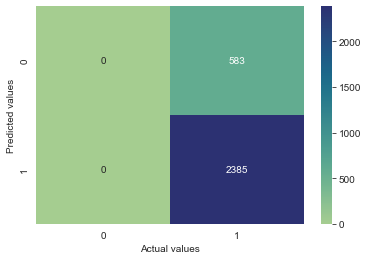

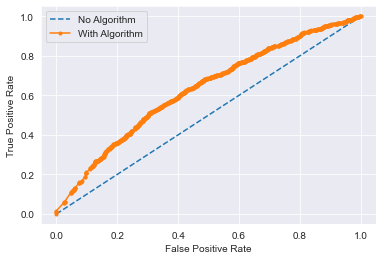

In [180]:
train = lgb.Dataset(X_train, label=y_train)
val = lgb.Dataset(X_val, label=y_val)
lgbm2 = lgb.train(best_params, train, valid_sets=val, early_stopping_rounds=100, verbose_eval=False)

evaluate_lgbm(lgbm2)

## XGBoost

In [181]:
def objective(trial):
    # Define the search space for XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 2.5),  
    }

    # Train and evaluate the XGBoost model
    model = xgb.XGBClassifier(**params, random_state=5)
    model.fit(X_train, y_train)
    pos_probs = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, pos_probs)

    return score

In [182]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=75)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:41:03,933] A new study created in memory with name: no-name-2c61a860-a482-4ff7-a006-3c20c7beb2c0
[I 2023-07-05 16:41:04,742] Trial 0 finished with value: 0.6166941756475398 and parameters: {'max_depth': 4, 'learning_rate': 0.003254356356784512, 'subsample': 0.7527081152941175, 'colsample_bytree': 0.9407097009467185, 'lambda': 0.00010615385374293511, 'alpha': 0.005772185107222336, 'scale_pos_weight': 1.422071073337925}. Best is trial 0 with value: 0.6166941756475398.
[I 2023-07-05 16:41:05,109] Trial 1 finished with value: 0.6132381127041148 and parameters: {'max_depth': 2, 'learning_rate': 0.0010045945351528842, 'subsample': 0.5434955172021464, 'colsample_bytree': 0.5041944311611444, 'lambda': 0.03697629805015268, 'alpha': 0.1975468255408901, 'scale_pos_weight': 2.239022679241227}. Best is trial 0 with value: 0.6166941756475398.
[I 2023-07-05 16:41:05,548] Trial 2 finished with value: 0.6128842716952365 and parameters: {'max_depth': 3, 'learning_rate': 0.00794905202781

[I 2023-07-05 16:41:28,255] Trial 22 finished with value: 0.6256283015271978 and parameters: {'max_depth': 6, 'learning_rate': 0.008045981922568755, 'subsample': 0.6318698973282046, 'colsample_bytree': 0.6296501662896861, 'lambda': 1.2051288809310523e-07, 'alpha': 5.792058249259608e-06, 'scale_pos_weight': 1.1489601372708562}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:29,235] Trial 23 finished with value: 0.6207557957646956 and parameters: {'max_depth': 7, 'learning_rate': 0.008276464878691518, 'subsample': 0.6397275561874975, 'colsample_bytree': 0.5694029399170818, 'lambda': 1.0489935658771904e-07, 'alpha': 1.1876275444637273e-07, 'scale_pos_weight': 1.326216342933935}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:30,131] Trial 24 finished with value: 0.6243912963742084 and parameters: {'max_depth': 6, 'learning_rate': 0.007980958824136136, 'subsample': 0.6136985878133129, 'colsample_bytree': 0.622740645168122, 'lambda': 5.46214671261

[I 2023-07-05 16:41:52,432] Trial 44 finished with value: 0.6210265704391728 and parameters: {'max_depth': 6, 'learning_rate': 0.007835696292853212, 'subsample': 0.6731489281661845, 'colsample_bytree': 0.6577966757336335, 'lambda': 2.6134451150169335e-08, 'alpha': 4.7634882542343725e-06, 'scale_pos_weight': 1.3024157835814265}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:53,493] Trial 45 finished with value: 0.620998881661039 and parameters: {'max_depth': 7, 'learning_rate': 0.008966044773148931, 'subsample': 0.6353251719038915, 'colsample_bytree': 0.528355873836991, 'lambda': 2.5723202480749966e-07, 'alpha': 1.0496931933049068e-07, 'scale_pos_weight': 1.1724226670093336}. Best is trial 14 with value: 0.6273352967194192.
[I 2023-07-05 16:41:54,381] Trial 46 finished with value: 0.618125361841987 and parameters: {'max_depth': 5, 'learning_rate': 0.006117696108631957, 'subsample': 0.655125044951816, 'colsample_bytree': 0.6344561057062329, 'lambda': 5.400372724375

[I 2023-07-05 16:42:24,561] Trial 66 finished with value: 0.6193932921238012 and parameters: {'max_depth': 9, 'learning_rate': 0.0081031345760025, 'subsample': 0.6918941495777425, 'colsample_bytree': 0.6517551219486659, 'lambda': 1.9044411915032658e-07, 'alpha': 9.547094951615759e-08, 'scale_pos_weight': 1.143055069929624}. Best is trial 52 with value: 0.6276441884131454.
[I 2023-07-05 16:42:26,425] Trial 67 finished with value: 0.6174331423886426 and parameters: {'max_depth': 10, 'learning_rate': 0.006710014115487663, 'subsample': 0.6763465402719526, 'colsample_bytree': 0.6282981473964055, 'lambda': 4.687921174156081e-07, 'alpha': 1.8973788763272876e-07, 'scale_pos_weight': 1.2277246495517988}. Best is trial 52 with value: 0.6276441884131454.
[I 2023-07-05 16:42:27,465] Trial 68 finished with value: 0.6190869175917235 and parameters: {'max_depth': 7, 'learning_rate': 0.004730604541793358, 'subsample': 0.662737886284712, 'colsample_bytree': 0.5526765021010928, 'lambda': 1.8393566053242

[I 2023-07-05 16:42:55,026] Trial 88 finished with value: 0.6258771409358808 and parameters: {'max_depth': 8, 'learning_rate': 0.0044803370796311125, 'subsample': 0.6127885985869358, 'colsample_bytree': 0.5754793545977726, 'lambda': 1.0191992752977592e-08, 'alpha': 4.112816329890419e-08, 'scale_pos_weight': 1.0799816438727838}. Best is trial 71 with value: 0.6297470971732274.
[I 2023-07-05 16:42:56,026] Trial 89 finished with value: 0.6212840401163647 and parameters: {'max_depth': 7, 'learning_rate': 0.005582557920802096, 'subsample': 0.5740570284577253, 'colsample_bytree': 0.5420257659525688, 'lambda': 6.926283061161393e-08, 'alpha': 1.4278491324847202e-08, 'scale_pos_weight': 1.0295728992041686}. Best is trial 71 with value: 0.6297470971732274.
[I 2023-07-05 16:42:57,187] Trial 90 finished with value: 0.6237069880003309 and parameters: {'max_depth': 7, 'learning_rate': 0.004832258012768027, 'subsample': 0.5908399478299476, 'colsample_bytree': 0.6200977155012153, 'lambda': 3.541431559

Train Accuracy score is: 0.8009267059814659
Test Accuracy score is: 0.8032345013477089
ROCAUC score is: 0.6297470971732274
              precision    recall  f1-score   support

           0       0.40      0.00      0.01       583
           1       0.80      1.00      0.89      2385

    accuracy                           0.80      2968
   macro avg       0.60      0.50      0.45      2968
weighted avg       0.72      0.80      0.72      2968



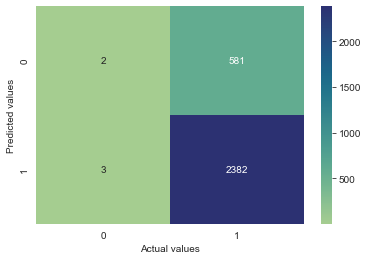

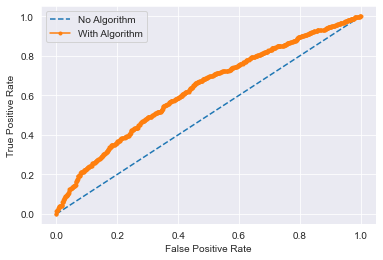

In [183]:
xgb_clf = xgb.XGBClassifier(**best_params, random_state=5)
xgb_clf.fit(X_train, y_train)

evaluate_model(xgb_clf)

# Deep Learning (Neural Network) - MLP

In [184]:
X = train_data.drop(['id','EC1','EC2', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1)
y = train_data['EC1']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=2)
cols_not = [i for i in X_train.columns if i not in high_value_cols]
scaler = StandardScaler()

train_sc=pd.DataFrame(scaler.fit_transform(X_train[high_value_cols]),index=X_train.index,columns=high_value_cols)
val_sc=pd.DataFrame(scaler.fit_transform(X_val[high_value_cols]),index=X_val.index,columns=high_value_cols)

# scaler = MinMaxScaler()

# X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_val=pd.DataFrame(scaler.fit_transform(X_val),index=X_val.index,columns=X_val.columns)

X_train = pd.concat([train_sc, X_train[cols_not]], axis=1)
X_val = pd.concat([val_sc, X_val[cols_not]], axis=1)

X_train.head()

,BertzCT,ExactMolWt,HeavyAtomMolWt,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
6788,-0.479488,-0.631739,-0.633457,4.825699,2.793756,2.793756,1.932542,1.932542,1.438134,0.895230,...,0.000000,0.00000,0.000000,12.393687,5.687386,0.000000,0.000000,30.000000,0,0
1962,-0.633683,-0.596321,-0.577001,5.947265,3.675670,3.675670,2.757262,2.757262,1.708684,0.955337,...,5.969305,0.00000,0.000000,0.000000,11.938611,25.304306,9.531400,47.000000,1,1
3551,-0.513457,-0.613643,-0.651981,5.036581,3.414884,3.414884,2.703542,2.703542,1.827002,1.029291,...,0.000000,12.15204,17.696186,0.000000,0.000000,6.103966,0.000000,36.166667,0,0
8301,-0.635423,-0.538873,-0.525580,5.092224,2.925131,2.925131,2.116586,2.116586,1.611120,0.757462,...,12.062229,0.00000,0.000000,0.000000,17.907600,12.462662,9.589074,39.500000,1,1
281,-0.795743,-0.835799,-0.821568,2.642734,1.049739,1.049739,0.504904,0.504904,0.142577,0.000000,...,5.969305,0.00000,0.000000,0.000000,11.752550,6.544756,9.589074,29.666667,1,1


In [186]:
import torch
import torch.nn as nn
import torch.optim as optim

In [187]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

In [188]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output = nn.Linear(hidden_sizes[-1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        for hidden_layer in self.hidden_layers:
            x = torch.relu(hidden_layer(x))
        x = self.sigmoid(self.output(x))
        return x

In [189]:
def model_train(params):
    # Create an instance of the MLP
    model = MLP(**params)

    # Define the loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    evaluate_MLP()

In [190]:
def evaluate_MLP():
    # Evaluation on the validation set
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_val)
        probs = torch.sigmoid(val_outputs)
        pos_probs = probs[:, 0]
#         val_predictions = torch.argmax(val_outputs, dim=1)
#         val_probs = torch.softmax(val_outputs, dim=1)[:, 1].numpy()
        score = roc_auc_score(y_val, pos_probs)
        acc = accuracy_score(y_val, val_outputs)
        train_acc = accuracy_score(y_val, model(X_train))
        print("ROC score is ",score)
        print("Train score is ",score)
        print("Val accuracy score is ",acc)

In [205]:
def objective(trial):
    # Define the hyperparameters to optimize
    input_size = 31
    num_hidden_layers = 3
    hidden_sizes = []
    for i in range(num_hidden_layers):
        hidden_sizes.append(trial.suggest_int(f"hidden_size_{i}", 4, 10))
    learning_rate = trial.suggest_loguniform("learning_rate",0.0001, 0.01)
    num_classes = 1
#     hidden_sizes.append(9)
#     hidden_sizes.append(6)

    # Create an instance of the MLP
    model = MLP(input_size, hidden_sizes, num_classes)

    # Define the loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on the validation set
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_val)
        probs = torch.sigmoid(val_outputs)
        pos_probs = probs[:, 0]
#         val_predictions = torch.argmax(val_outputs, dim=1)
#         val_probs = torch.softmax(val_outputs, dim=1)[:, 1].numpy()
#         score = roc_auc_score(y_val, pos_probs)
        pred_labels = (val_outputs >= 0.5).float()
        score = (pred_labels == y_val).sum().item() / len(y_val)
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
best_score = study.best_value

[I 2023-07-05 16:50:37,845] A new study created in memory with name: no-name-987e985b-139e-4705-9c25-3566a7ee69f1
[I 2023-07-05 16:50:38,199] Trial 0 finished with value: 0.7075471698113207 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 10, 'hidden_size_2': 6, 'learning_rate': 0.009024620765141036}. Best is trial 0 with value: 0.7075471698113207.
[I 2023-07-05 16:50:38,523] Trial 1 finished with value: 0.6721698113207547 and parameters: {'hidden_size_0': 10, 'hidden_size_1': 4, 'hidden_size_2': 9, 'learning_rate': 0.0011190273815927384}. Best is trial 0 with value: 0.7075471698113207.
[I 2023-07-05 16:50:38,869] Trial 2 finished with value: 0.6960916442048517 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 10, 'hidden_size_2': 9, 'learning_rate': 0.001607048139655296}. Best is trial 0 with value: 0.7075471698113207.
[I 2023-07-05 16:50:39,216] Trial 3 finished with value: 0.6721698113207547 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 7, 'hidden_size_2': 5, 'learn

[I 2023-07-05 16:50:50,951] Trial 34 finished with value: 0.6967654986522911 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 9, 'hidden_size_2': 9, 'learning_rate': 0.009322489566327223}. Best is trial 0 with value: 0.7075471698113207.
[I 2023-07-05 16:50:51,312] Trial 35 finished with value: 0.7024932614555256 and parameters: {'hidden_size_0': 9, 'hidden_size_1': 7, 'hidden_size_2': 9, 'learning_rate': 0.00638109822371926}. Best is trial 0 with value: 0.7075471698113207.
[I 2023-07-05 16:50:51,655] Trial 36 finished with value: 0.6933962264150944 and parameters: {'hidden_size_0': 8, 'hidden_size_1': 10, 'hidden_size_2': 8, 'learning_rate': 0.0033141171336116197}. Best is trial 0 with value: 0.7075471698113207.


In [198]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_score)

the best parameters are:  {'hidden_size_0': 8, 'hidden_size_1': 6, 'hidden_size_2': 7, 'learning_rate': 0.004896156970946585}
The best score is:  0.7099056603773585


In [352]:
params = {}
params['hidden_sizes'] = []
# params['learning_rate'] = 0
for k,v in best_params.items():
    if k=='learning_rate':
        params['learning_rate'] = v
        break
    params['hidden_sizes'].append(v)
params

{'hidden_sizes': [8, 9], 'learning_rate': 0.00972285452944221}

Past parameters:
- the best parameters are:  {'hidden_size_0': 11, 'hidden_size_1': 9, 'hidden_size_2': 6, 'learning_rate': 0.009705484202909563}|The best score is:  0.7008737156354401
- the best parameters are:  {'hidden_size_0': 10, 'hidden_size_1': 7, 'hidden_size_2': 6, 'learning_rate': 0.005500430897896138}|The best score is:  0.698981523696188

# Submission

In [95]:
test_data = pd.read_csv('test.csv')
test_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,11.938611,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,0.000000,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,7.822697,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0


In [96]:
test_data.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'],
      dtype='object')

In [97]:
train_data.columns[:-6]

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'],
      dtype='object')

In [98]:
X_test = test_data.drop('id', axis=1)

In [101]:
ec1 = rfc.predict_proba(X_test)[0][:,1]
ec2 = rfc.predict_proba(X_test)[1][:,1]

In [104]:
rfc_base = pd.DataFrame(zip(ec1, ec2) ,columns=['EC1', 'EC2'])
rfc_base['id']=test_data['id']
rfc_base = rfc_base[rfc_base.columns[::-1]]
rfc_base

,id,EC2,EC1
0,14838,0.747632,0.424838
1,14839,0.707694,0.750496
2,14840,0.658456,0.753520
3,14841,0.712387,0.696345
4,14842,0.658913,0.768397
...,...,...,...
9888,24726,0.651815,0.615984
9889,24727,0.768612,0.738692
9890,24728,0.775342,0.387256
9891,24729,0.797754,0.383882


In [105]:
rfc_base.to_csv('rfc_base.csv', index=False)

In [419]:
ec1 = model1.predict(X_test)
ec2 = model2.predict(X_test)

In [420]:
lgbm_binary = pd.DataFrame(zip(ec1, ec2), columns=['EC1', 'EC2'])
lgbm_binary['id'] = test_data['id']
lgbm_binary = lgbm_binary[lgbm_binary.columns[-1:].to_list()+lgbm_binary.columns[:2].to_list()]
lgbm_binary

,id,EC1,EC2
0,14838,0.436758,0.768616
1,14839,0.811926,0.806311
2,14840,0.781455,0.745568
3,14841,0.712642,0.817455
4,14842,0.771032,0.795308
...,...,...,...
9888,24726,0.623808,0.745568
9889,24727,0.747591,0.821561
9890,24728,0.368690,0.840144
9891,24729,0.430987,0.845336


In [421]:
lgbm_binary.to_csv('lgbm_binary2.csv', index=False)

### Using EC1 as predictor

In [422]:
y_hatEC1 = (model1.predict(X_test)>=0.5).astype(int)

In [423]:
test = test_data.copy()

In [424]:
test['EC1'] = y_hatEC1
test

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1,0
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0,1
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0,1
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2,1
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0,1
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0,0


In [425]:
X_test = test.drop('id', axis=1)

In [426]:
y_hatEC2 = lgbm2.predict(X_test)

In [428]:
test['EC2'] = y_hatEC2
test['EC1'] = model1.predict(X_test.drop('EC1',axis=1))
test

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1,0.436758,0.835999
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0,0.811926,0.780156
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1,0.781455,0.710728
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0,0.712642,0.780374
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0,0.771032,0.772533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2,0.623808,0.732661
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0,0.747591,0.819741
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0,0.368690,0.864607
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0,0.430987,0.879144


In [429]:
use_ec1 = test[test.columns[:1].to_list()+test.columns[-2:].to_list()]
use_ec1

,id,EC1,EC2
0,14838,0.436758,0.835999
1,14839,0.811926,0.780156
2,14840,0.781455,0.710728
3,14841,0.712642,0.780374
4,14842,0.771032,0.772533
...,...,...,...
9888,24726,0.623808,0.732661
9889,24727,0.747591,0.819741
9890,24728,0.368690,0.864607
9891,24729,0.430987,0.879144


In [430]:
use_ec1.to_csv('use_ec1(2).csv', index=False)